# Convert numpy files to R-readable format

In [36]:
import sys
sys.path.insert(0, '../')

import pandas as pd
from theory import build_S_with_tuples
from load_results import load_results

extension = 'results_2024-05-03'#'../../lung-smoking-no-treatment/output/M1_no_treatment_cesR/'
mu_method = "variant"

fluxes_mles = load_results('fluxes', 'mles',extension)
fluxes_cis = load_results('fluxes','cis',extension)

selection_mles = load_results('selections', 'mles',extension)
selection_cis = load_results('selections', 'cis',extension)

if mu_method == 'cesR': cesR_mu_dict = load_results('mutations', 'cesR', extension)
elif mu_method == 'variant': variant_mu_dict = load_results('mutations', 'variant', extension)

all_samples = load_results('samples', extension=extension)

In [42]:
selection_cis['smoking_plus'][('KRAS','EGFR')]

{((0, 0), (0, 1)): [68943.16842504582, 105641.79867506538],
 ((0, 0), (1, 0)): [1146004.9447194757, 1401277.9188348157],
 ((0, 1), (1, 1)): [3.763530924603995e-30, 297350.2008297834],
 ((1, 0), (1, 1)): [4822.307345122074, 36188.427135239726]}

In [43]:
selection_cis['nonsmoking_plus'][('KRAS','EGFR')]

{((0, 0), (0, 1)): [563434.7946997376, 2253739.1787989503],
 ((0, 0), (1, 0)): [461029.69987213425, 1844118.799488537],
 ((0, 1), (1, 1)): [3.5185275690381705e-35, 7.037055138076341e-35],
 ((1, 0), (1, 1)): [1.6163388993027152e-35, 3.2326777986054304e-35]}

In [4]:
if mu_method == 'cesR': mu_df = pd.json_normalize({"cesR":cesR_mu_dict},sep='|').T.reset_index()
elif mu_method == 'variant': mu_df = pd.json_normalize({"variant":variant_mu_dict},sep='|').T.reset_index()
# mu_df = pd.json_normalize({"cesR":cesR_mu_dict,"variant":variant_mu_dict},sep='|').T.reset_index()
mu_df.columns = ['index','mu']
mu_df[['method','key','gene']] = mu_df['index'].str.split('|', expand=True)
mu_df = mu_df[['method','key','gene','mu']]

mu_df.to_csv('mutation_rates.csv', index=False)

In [4]:
flux_df

key     gene_set      mutation  flux_mle  flux_ci_low  \
0           pan_data    ('TP53',)  ((0,), (1,))  0.480054     0.432126   
1           pan_data    ('KRAS',)  ((0,), (1,))  0.276632     0.242451   
2           pan_data    ('EGFR',)  ((0,), (1,))  0.107678     0.087735   
3           pan_data    ('BRAF',)  ((0,), (1,))  0.058998     0.044747   
4           pan_data  ('CTNNB1',)  ((0,), (1,))  0.029600     0.019946   
..               ...          ...           ...       ...          ...   
100  nonsmoking_plus     ('RB1',)  ((0,), (1,))  0.020271     0.008057   
101  nonsmoking_plus   ('SETD2',)  ((0,), (1,))  0.030563     0.014685   
102  nonsmoking_plus   ('BRCA2',)  ((0,), (1,))  0.013468     0.004181   
103  nonsmoking_plus     ('MGA',)  ((0,), (1,))  0.034017     0.017045   
104  nonsmoking_plus    ('GNAS',)  ((0,), (1,))  0.013468     0.004181   

     flux_ci_high  
0        0.531471  
1        0.313906  
2        0.130440  
3        0.075996  
4        0.041959  
..            ...  
100      0.041077  
101      0.055097  
102      0.031288  
103      0.059666  
104      0.031288  

[105 rows x 6 columns]

In [5]:
flux_df = pd.json_normalize(fluxes_mles,sep='|').T.reset_index()
flux_df.columns = ['index','flux_mle']

tmp = pd.json_normalize(fluxes_cis,sep='|').T.reset_index()
tmp.columns = ['index','flux_cis']
tmp['flux_ci_low'] = tmp['flux_cis'].apply(lambda x: x[0])
tmp['flux_ci_high'] = tmp['flux_cis'].apply(lambda x: x[1])
# tmp2[['flux_ci_low','flux_ci_high']] = tmp2['flux_cis'].apply(pd.Series)
tmp = tmp.drop('flux_cis',axis=1)

flux_df = pd.merge(flux_df,tmp,on='index')

flux_df[['key','gene_set','mutation']] = flux_df['index'].str.split('|', expand=True)
flux_df = flux_df[['key','gene_set','mutation','flux_mle','flux_ci_low','flux_ci_high']]

flux_df[['first_gene','second_gene','third_gene']] = flux_df['gene_set'].str.strip(',()').str.replace("'","").str.split(', ',expand=True)
flux_df = flux_df.drop('gene_set', axis=1)

flux_df

key                mutation      flux_mle   flux_ci_low  \
0             pan_data            ((0,), (1,))  5.054993e-01  4.885071e-01   
1             pan_data            ((0,), (1,))  4.430788e-01  4.275371e-01   
2             pan_data            ((0,), (1,))  1.532845e-01  1.448692e-01   
3             pan_data            ((0,), (1,))  5.877048e-02  5.373847e-02   
4             pan_data            ((0,), (1,))  3.540089e-02  3.155061e-02   
...                ...                     ...           ...           ...   
47728  nonsmoking_plus  ((0, 1, 0), (1, 1, 0))  9.566657e-36  9.566657e-36   
47729  nonsmoking_plus  ((1, 0, 0), (1, 1, 0))  1.449315e-01  8.172696e-03   
47730  nonsmoking_plus  ((0, 1, 1), (1, 1, 1))  5.797064e-42  5.797064e-42   
47731  nonsmoking_plus  ((1, 0, 1), (1, 1, 1))  6.583241e-42  6.583241e-42   
47732  nonsmoking_plus  ((1, 1, 0), (1, 1, 1))  6.583241e-42  6.583241e-42   

       flux_ci_high first_gene second_gene third_gene  
0          0.522890       TP53        None       None  
1          0.458999       KRAS        None       None  
2          0.162020       EGFR        None       None  
3          0.064107       BRAF        None       None  
4          0.039552     CTNNB1        None       None  
...             ...        ...         ...        ...  
47728      0.390773     ARID1A         MET      BRCA2  
47729      0.668191     ARID1A         MET      BRCA2  
47730     12.240560     ARID1A         MET      BRCA2  
47731     11.943685     ARID1A         MET      BRCA2  
47732     11.943685     ARID1A         MET      BRCA2  

[47733 rows x 8 columns]

In [6]:
M1_flux_df = flux_df[flux_df['second_gene'].isnull()]
M1_flux_df = M1_flux_df.drop(['second_gene','third_gene'],axis=1).rename(columns={'first_gene':'gene'})
M1_flux_df = M1_flux_df[['key','gene','flux_mle','flux_ci_low','flux_ci_high']]

M2_flux_df = flux_df[(flux_df['second_gene'].notnull()) & (flux_df['third_gene'].isnull())]
M2_flux_df = M2_flux_df.drop('third_gene',axis=1)
M2_flux_df = M2_flux_df[['key','first_gene','second_gene','mutation','flux_mle','flux_ci_low','flux_ci_high']]

M3_flux_df = flux_df[flux_df['third_gene'].notnull()]
M3_flux_df = M3_flux_df[['key','first_gene','second_gene','third_gene','mutation','flux_mle','flux_ci_low','flux_ci_high']]

M1_flux_df.to_csv('M1_gene_fluxes.csv', index=False)
M2_flux_df.to_csv('M2_gene_fluxes.csv', index=False)
M3_flux_df.to_csv('M3_gene_fluxes.csv', index=False)

In [7]:
gamma_df = pd.json_normalize(selection_mles,sep='|').T.reset_index()
gamma_df.columns = ['index','gamma_mle']

tmp = pd.json_normalize(selection_cis,sep='|').T.reset_index()
tmp.columns = ['index','gamma_cis']
tmp['gamma_ci_low'] = tmp['gamma_cis'].apply(lambda x: x[0])
tmp['gamma_ci_high'] = tmp['gamma_cis'].apply(lambda x: x[1])
tmp = tmp.drop('gamma_cis',axis=1)

gamma_df = pd.merge(gamma_df,tmp,on='index')

gamma_df[['key','gene_set','mutation']] = gamma_df['index'].str.split('|', expand=True)
gamma_df = gamma_df[['key','gene_set','mutation','gamma_mle','gamma_ci_low','gamma_ci_high']]

gamma_df[['first_gene','second_gene','third_gene']] = gamma_df['gene_set'].str.strip(',()').str.replace("'","").str.split(', ',expand=True)
gamma_df = gamma_df.drop('gene_set', axis=1)
gamma_df['method'] = mu_method

gamma_df

key                mutation     gamma_mle  gamma_ci_low  \
0             pan_data            ((0,), (1,))  6.775368e+05  6.547615e+05   
1             pan_data            ((0,), (1,))  1.864356e+06  1.798961e+06   
2             pan_data            ((0,), (1,))  1.862735e+05  1.760471e+05   
3             pan_data            ((0,), (1,))  2.227914e+05  2.037157e+05   
4             pan_data            ((0,), (1,))  3.035000e+05  2.704907e+05   
...                ...                     ...           ...           ...   
47728  nonsmoking_plus  ((0, 1, 0), (1, 1, 0))  4.396497e-29  4.396497e-29   
47729  nonsmoking_plus  ((1, 0, 0), (1, 1, 0))  5.765755e+05  3.251313e+04   
47730  nonsmoking_plus  ((0, 1, 1), (1, 1, 1))  2.664126e-35  2.664126e-35   
47731  nonsmoking_plus  ((1, 0, 1), (1, 1, 1))  2.618986e-35  2.618986e-35   
47732  nonsmoking_plus  ((1, 1, 0), (1, 1, 1))  4.762926e-35  4.762926e-35   

       gamma_ci_high first_gene second_gene third_gene   method  
0       7.008456e+05       TP53        None       None  variant  
1       1.931343e+06       KRAS        None       None  variant  
2       1.968892e+05       EGFR        None       None  variant  
3       2.430227e+05       BRAF        None       None  variant  
4       3.390917e+05     CTNNB1        None       None  variant  
...              ...        ...         ...        ...      ...  
47728   1.795853e+06     ARID1A         MET      BRCA2  variant  
47729   2.658238e+06     ARID1A         MET      BRCA2  variant  
47730   5.625329e+07     ARID1A         MET      BRCA2  variant  
47731   4.751511e+07     ARID1A         MET      BRCA2  variant  
47732   8.641166e+07     ARID1A         MET      BRCA2  variant  

[47733 rows x 9 columns]

In [8]:
M1_gamma_df = gamma_df[gamma_df['second_gene'].isnull()]
M1_gamma_df = M1_gamma_df.drop(['second_gene','third_gene'],axis=1).rename(columns={'first_gene':'gene'})
M1_gamma_df = M1_gamma_df[['method','key','gene','gamma_mle','gamma_ci_low','gamma_ci_high']]

M2_gamma_df = gamma_df[(gamma_df['second_gene'].notnull()) & (gamma_df['third_gene'].isnull())]
M2_gamma_df = M2_gamma_df.drop('third_gene',axis=1)
M2_gamma_df = M2_gamma_df[['method','key','first_gene','second_gene','mutation','gamma_mle','gamma_ci_low','gamma_ci_high']]

M3_gamma_df = gamma_df[gamma_df['third_gene'].notnull()]
M3_gamma_df = M3_gamma_df[['method','key','first_gene','second_gene','third_gene','mutation','gamma_mle','gamma_ci_low','gamma_ci_high']]

M1_gamma_df.to_csv('M1_gene_gammas.csv', index=False)
M2_gamma_df.to_csv('M2_gene_gammas.csv', index=False)
M3_gamma_df.to_csv('M3_gene_gammas.csv', index=False)

In [9]:
sample_df = pd.json_normalize(all_samples,sep='|').T.reset_index().rename(columns={0:'counts'})
sample_df[['key','gene_set']] = sample_df['index'].str.split('|', expand=True)
sample_df = sample_df.drop('index',axis=1)
sample_df['gene_set'] = sample_df['gene_set'].str.strip(',()')

sample_dict = dict()
for i in range(1,4): 
    sample_dict[i] = sample_df[sample_df['counts'].apply(len)==2**i]
    sample_dict[i][[str(x) for x in build_S_with_tuples(i)]] = sample_dict[i]['counts'].apply(pd.Series)
    
    if i == 1: 
        sample_dict[i]['gene'] = sample_dict[i]['gene_set'].str.replace("'","")
        sample_dict[i] = sample_dict[i][['key','gene'] + [str(x) for x in build_S_with_tuples(i)]]
    elif i == 2: 
        sample_dict[i][['first_gene','second_gene']] = sample_dict[i]['gene_set'].str.replace("'","").str.split(', ',expand=True)
        sample_dict[i] = sample_dict[i][['key','first_gene','second_gene'] + [str(x) for x in build_S_with_tuples(i)]]
    elif i == 3:
        sample_dict[i][['first_gene','second_gene','third_gene']] = sample_dict[i]['gene_set'].str.replace("'","").str.split(', ',expand=True)
        sample_dict[i] = sample_dict[i][['key','first_gene','second_gene','third_gene'] + [str(x) for x in build_S_with_tuples(i)]]

    sample_dict[i].to_csv(f'M{i}_samples_per_combination.csv',index=False)

/var/folders/6c/jgrxdckx13g4fc3tvbx12h040000gp/T/ipykernel_4395/1577326848.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_dict[i][[str(x) for x in build_S_with_tuples(i)]] = sample_dict[i]['counts'].apply(pd.Series)
/var/folders/6c/jgrxdckx13g4fc3tvbx12h040000gp/T/ipykernel_4395/1577326848.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_dict[i][[str(x) for x in build_S_with_tuples(i)]] = sample_dict[i]['counts'].apply(pd.Series)
/var/folders/6c/jgrxdckx13g4fc3tvbx12h040000gp/T/ipykern

Load all genes, M=1 results

In [2]:
import sys
sys.path.insert(0, '../')

import pandas as pd
from theory import build_S_with_tuples
from load_results import load_results

extension = 'genes_v4.0.1'

fluxes_mles = load_results('fluxes', 'mles',extension)
fluxes_cis = load_results('fluxes','cis',extension)

selection_mles = load_results('selections', 'mles',extension)
selection_cis = load_results('selections', 'cis',extension)

all_samples = load_results('samples', extension=extension)

In [3]:
flux_df = pd.json_normalize(fluxes_mles,sep='|').T.reset_index()
flux_df.columns = ['index','flux_mle']

tmp = pd.json_normalize(fluxes_cis,sep='|').T.reset_index()
tmp.columns = ['index','flux_cis']
tmp['flux_ci_low'] = tmp['flux_cis'].apply(lambda x: x[0])
tmp['flux_ci_high'] = tmp['flux_cis'].apply(lambda x: x[1])
# tmp2[['flux_ci_low','flux_ci_high']] = tmp2['flux_cis'].apply(pd.Series)
tmp = tmp.drop('flux_cis',axis=1)

flux_df = pd.merge(flux_df,tmp,on='index')

flux_df[['key','gene','mutation']] = flux_df['index'].str.split('|', expand=True)
flux_df['gene'] = flux_df['gene'].str.strip(",()'")
flux_df = flux_df[['key','gene','flux_mle','flux_ci_low','flux_ci_high']]


gamma_df = pd.json_normalize(selection_mles,sep='|').T.reset_index()
gamma_df.columns = ['index','gamma_mle']

tmp = pd.json_normalize(selection_cis,sep='|').T.reset_index()
tmp.columns = ['index','gamma_cis']
tmp['gamma_ci_low'] = tmp['gamma_cis'].apply(lambda x: x[0])
tmp['gamma_ci_high'] = tmp['gamma_cis'].apply(lambda x: x[1])
tmp = tmp.drop('gamma_cis',axis=1)

gamma_df = pd.merge(gamma_df,tmp,on='index')

gamma_df[['key','gene','mutation']] = gamma_df['index'].str.split('|', expand=True)
gamma_df['gene'] = gamma_df['gene'].str.strip(",()'")
gamma_df['method'] = mu_method
gamma_df = gamma_df[['method','key','gene','gamma_mle','gamma_ci_low','gamma_ci_high']]

flux_df.to_csv('M1_all_gene_fluxes.csv', index=False)
gamma_df.to_csv('M1_all_gene_gammas.csv', index=False)

NameError: name 'mu_method' is not defined

In [ ]:
sample_df = pd.json_normalize(all_samples,sep='|').T.reset_index().rename(columns={0:'counts'})
sample_df[['key','gene_set']] = sample_df['index'].str.split('|', expand=True)
sample_df = sample_df.drop('index',axis=1)
sample_df['gene_set'] = sample_df['gene_set'].str.strip(",()'")

sample_df[[str(x) for x in build_S_with_tuples(1)]] = sample_df['counts'].apply(pd.Series)
sample_df['gene'] = sample_df['gene_set'].str.replace("'","")
sample_df = sample_df[['key','gene'] + [str(x) for x in build_S_with_tuples(1)]]

sample_df.to_csv(f'M1_all_samples_per_combination.csv',index=False)

# Likelihood ratio test for difference in selection between ever-smokers and never-smokers

In [9]:
import sys
sys.path.insert(0, '../')
from load_results import load_results
import numpy as np
import scipy.stats as stats
from scipy.optimize import minimize

# load in results
extension='results_2024-05-03'
fluxes_mles = load_results('fluxes', 'mles',extension)
fluxes_cis = load_results('fluxes','cis',extension)
selection_mles = load_results('selections', 'mles',extension)
selection_cis = load_results('selections', 'cis',extension)
all_samples = load_results('samples', extension=extension)
mus = load_results('mutations', 'variant')

smoking_M1_fluxes = {k[0]:list(v.values())[0] for k,v in fluxes_mles['smoking_plus'].items() if len(k)==1}
nonsmoking_M1_fluxes = {k[0]:list(v.values())[0] for k,v in fluxes_mles['nonsmoking_plus'].items() if len(k)==1}

smoking_M1_gammas = {k[0]:list(v.values())[0] for k,v in selection_mles['smoking_plus'].items() if len(k)==1}
nonsmoking_M1_gammas = {k[0]:list(v.values())[0] for k,v in selection_mles['nonsmoking_plus'].items() if len(k)==1}

smoking_M1_samples = {k[0]:v for k,v in all_samples['smoking_plus'].items() if len(k)==1}
nonsmoking_M1_samples = {k[0]:v for k,v in all_samples['nonsmoking_plus'].items() if len(k)==1}

# FULL MODEL
# separately calculate log likelihood corresponding to flux MLE for smokers and never-smokers
smoking_M1_log_liks = {gene: samples[1]*np.log(1-np.exp(-smoking_M1_fluxes[gene])) - samples[0]*smoking_M1_fluxes[gene]
                            for gene, samples  in smoking_M1_samples.items()}
nonsmoking_M1_log_liks = {gene: samples[1]*np.log(1-np.exp(-nonsmoking_M1_fluxes[gene])) - samples[0]*nonsmoking_M1_fluxes[gene]
                            for gene, samples  in nonsmoking_M1_samples.items()}
# then add them together to get the joint likelihood
full_model_log_liks = {gene: smoking_M1_log_liks[gene] + nonsmoking_M1_log_liks[gene] for gene in smoking_M1_log_liks.keys()}

# # REDUCED MODEL
# Get MLE for M=1 gamma for combined group 
def loglikelihood(gamma, n_s, n_ns, mu_s, mu_ns):
    return(n_s[1]*np.log(1-np.exp(-mu_s*gamma)) + n_ns[1]*np.log(1-np.exp(-mu_ns*gamma)) - gamma*(mu_s*n_s[0] + mu_ns*n_ns[0]))
def negloglikelihood(gamma, n_s, n_ns, mu_s, mu_ns):
    return(-1 * loglikelihood(gamma, n_s, n_ns, mu_s, mu_ns))

combined_gammas = {gene:minimize(negloglikelihood, 
                                 x0=np.mean([smoking_M1_gammas[gene], nonsmoking_M1_gammas[gene]]),
                                 args=(smoking_M1_samples[gene], nonsmoking_M1_samples[gene], mus['smoking'][gene], mus['nonsmoking'][gene]))['x'][0] 
                        for gene in smoking_M1_samples} 
# then calculate log likelihood for each gene under the reduced model
reduced_model_log_liks = {gene:loglikelihood(combined_gammas[gene], smoking_M1_samples[gene], nonsmoking_M1_samples[gene], mus['smoking'][gene], mus['nonsmoking'][gene]) 
                          for gene in smoking_M1_samples}

# calculate likelihood ratios for the two models
lik_rat_stats = {gene: -2*(reduced_model_log_liks[gene] - log_lik) for gene,log_lik in full_model_log_liks.items()}
# obtains p-values for comparison
p_vals = {gene: stats.chi2.sf(lik_rat,1) for gene,lik_rat in lik_rat_stats.items()}

In [8]:
{gene:p_val for gene,p_val in p_vals.items() if p_val<.05}

{'TP53': 0.00046582514251175853,
 'KRAS': 0.004317282191665895,
 'EGFR': 7.659276639965846e-83,
 'KEAP1': 2.1974512898592163e-07,
 'STK11': 0.00038971873458719776,
 'PIK3CA': 6.698591840138536e-09,
 'RBM10': 0.00028440705779310096,
 'SMARCA4': 0.010502997814281633,
 'SMAD4': 2.567362550568061e-07,
 'APC': 0.04913103795145125,
 'MET': 0.0001497741601974273,
 'SETD2': 0.0006059245924662681,
 'GNAS': 0.0014817270445171926}

# Plotting trajectories

In [5]:
import sys
sys.path.insert(0, '../')

import pandas as pd
from load_results import load_results

from landscape_plotting import plot_landscape

extension = 'results_2024-05-03'
mu_method = "variant"

fluxes_mles = load_results('fluxes', 'mles',extension)
fluxes_cis = load_results('fluxes','cis',extension)

selection_mles = load_results('selections', 'mles',extension)
selection_cis = load_results('selections', 'cis',extension)

cesR_mu_dict = load_results('mutations', 'cesR')
variant_mu_dict = load_results('mutations', 'variant')

all_samples = load_results('samples', extension=extension)

In [3]:
import numpy as np

from theory import order_pos_lambdas
from theory import build_S_as_array

def convert_samples_to_dict(samples):
    M = int(np.log2(len(samples))) # 2^M is the number mutation combinations
    S = build_S_as_array(M)
    results_as_dict = {tuple(x):value
                       for x, value in zip(S, samples)}
    return results_as_dict

def plot_trajectory(gene_list, dataset_key, param="selection", scale_circle_areas=0.01,multiplier_font_size=1.5,scale_arrows=None,mu_method=None):
    if not isinstance(gene_list,list):
        raise TypeError("`gene_list` must be a list of genes")
    if param not in ["fixation","mutation","selection"]: 
        raise ValueError("`param` must be one of 'fixation','mutation','selection'")
    if scale_arrows is None:
        if param == "fixation": scale_arrows = 1
        elif param == "mutation": scale_arrows = 1*10**5
        elif param == "selection": scale_arrows = 0.5*10**(-6)
    
    gene_tuple = tuple(gene_list)

    if param == "fixation": values = fluxes_mles[dataset_key][gene_tuple]
    elif param == "mutation": 
        if mu_method is None or mu_method not in ["cesR","variant"]:
            raise ValueError("`mu_method` must be 'cesR' or 'variant'")
        elif mu_method == "cesR": mu_dict = cesR_mu_dict
        elif mu_method == "variant": mu_dict = variant_mu_dict

        T = order_pos_lambdas(build_S_as_array(len(gene_list))) # list of transitions
        T_ = np.array(T)
        mutated_indices = np.where(T_[:,1] - T_[:,0])[1] # mutated gene for each transition
        values = {T[i]: mu_dict[dataset_key][gene_tuple[mutated_indices[i]]] for i in range(len(T))} # create dictionary with mutation rates
    elif param == "selection": values = selection_mles[dataset_key][gene_tuple]

    p = plot_landscape(
        arrows = values,
        circle_areas = convert_samples_to_dict(all_samples[dataset_key][gene_tuple]),
        mutation_names = gene_tuple,
        scale_arrows=scale_arrows,
        positions="left_to_right",
        include_n_circles=True,
        scale_circle_areas=scale_circle_areas,
        multiplier_font_size=multiplier_font_size,
        plot_name='trajectory' + '_' + dataset_key + '_' + '_'.join(gene_tuple) + '_' + param
    )
    return p

In [23]:
selection_cis['smoking_plus'][('EGFR','GNAS')]

{((0, 0), (0, 1)): [5097.0704935703125, 20388.28197428125],
 ((0, 0), (1, 0)): [36055.35256936616, 144221.41027746463],
 ((0, 1), (1, 1)): [1.0835788854278318e-37, 2.1671577708556636e-37],
 ((1, 0), (1, 1)): [5.680547495119354e-38, 1.1361094990238707e-37]}

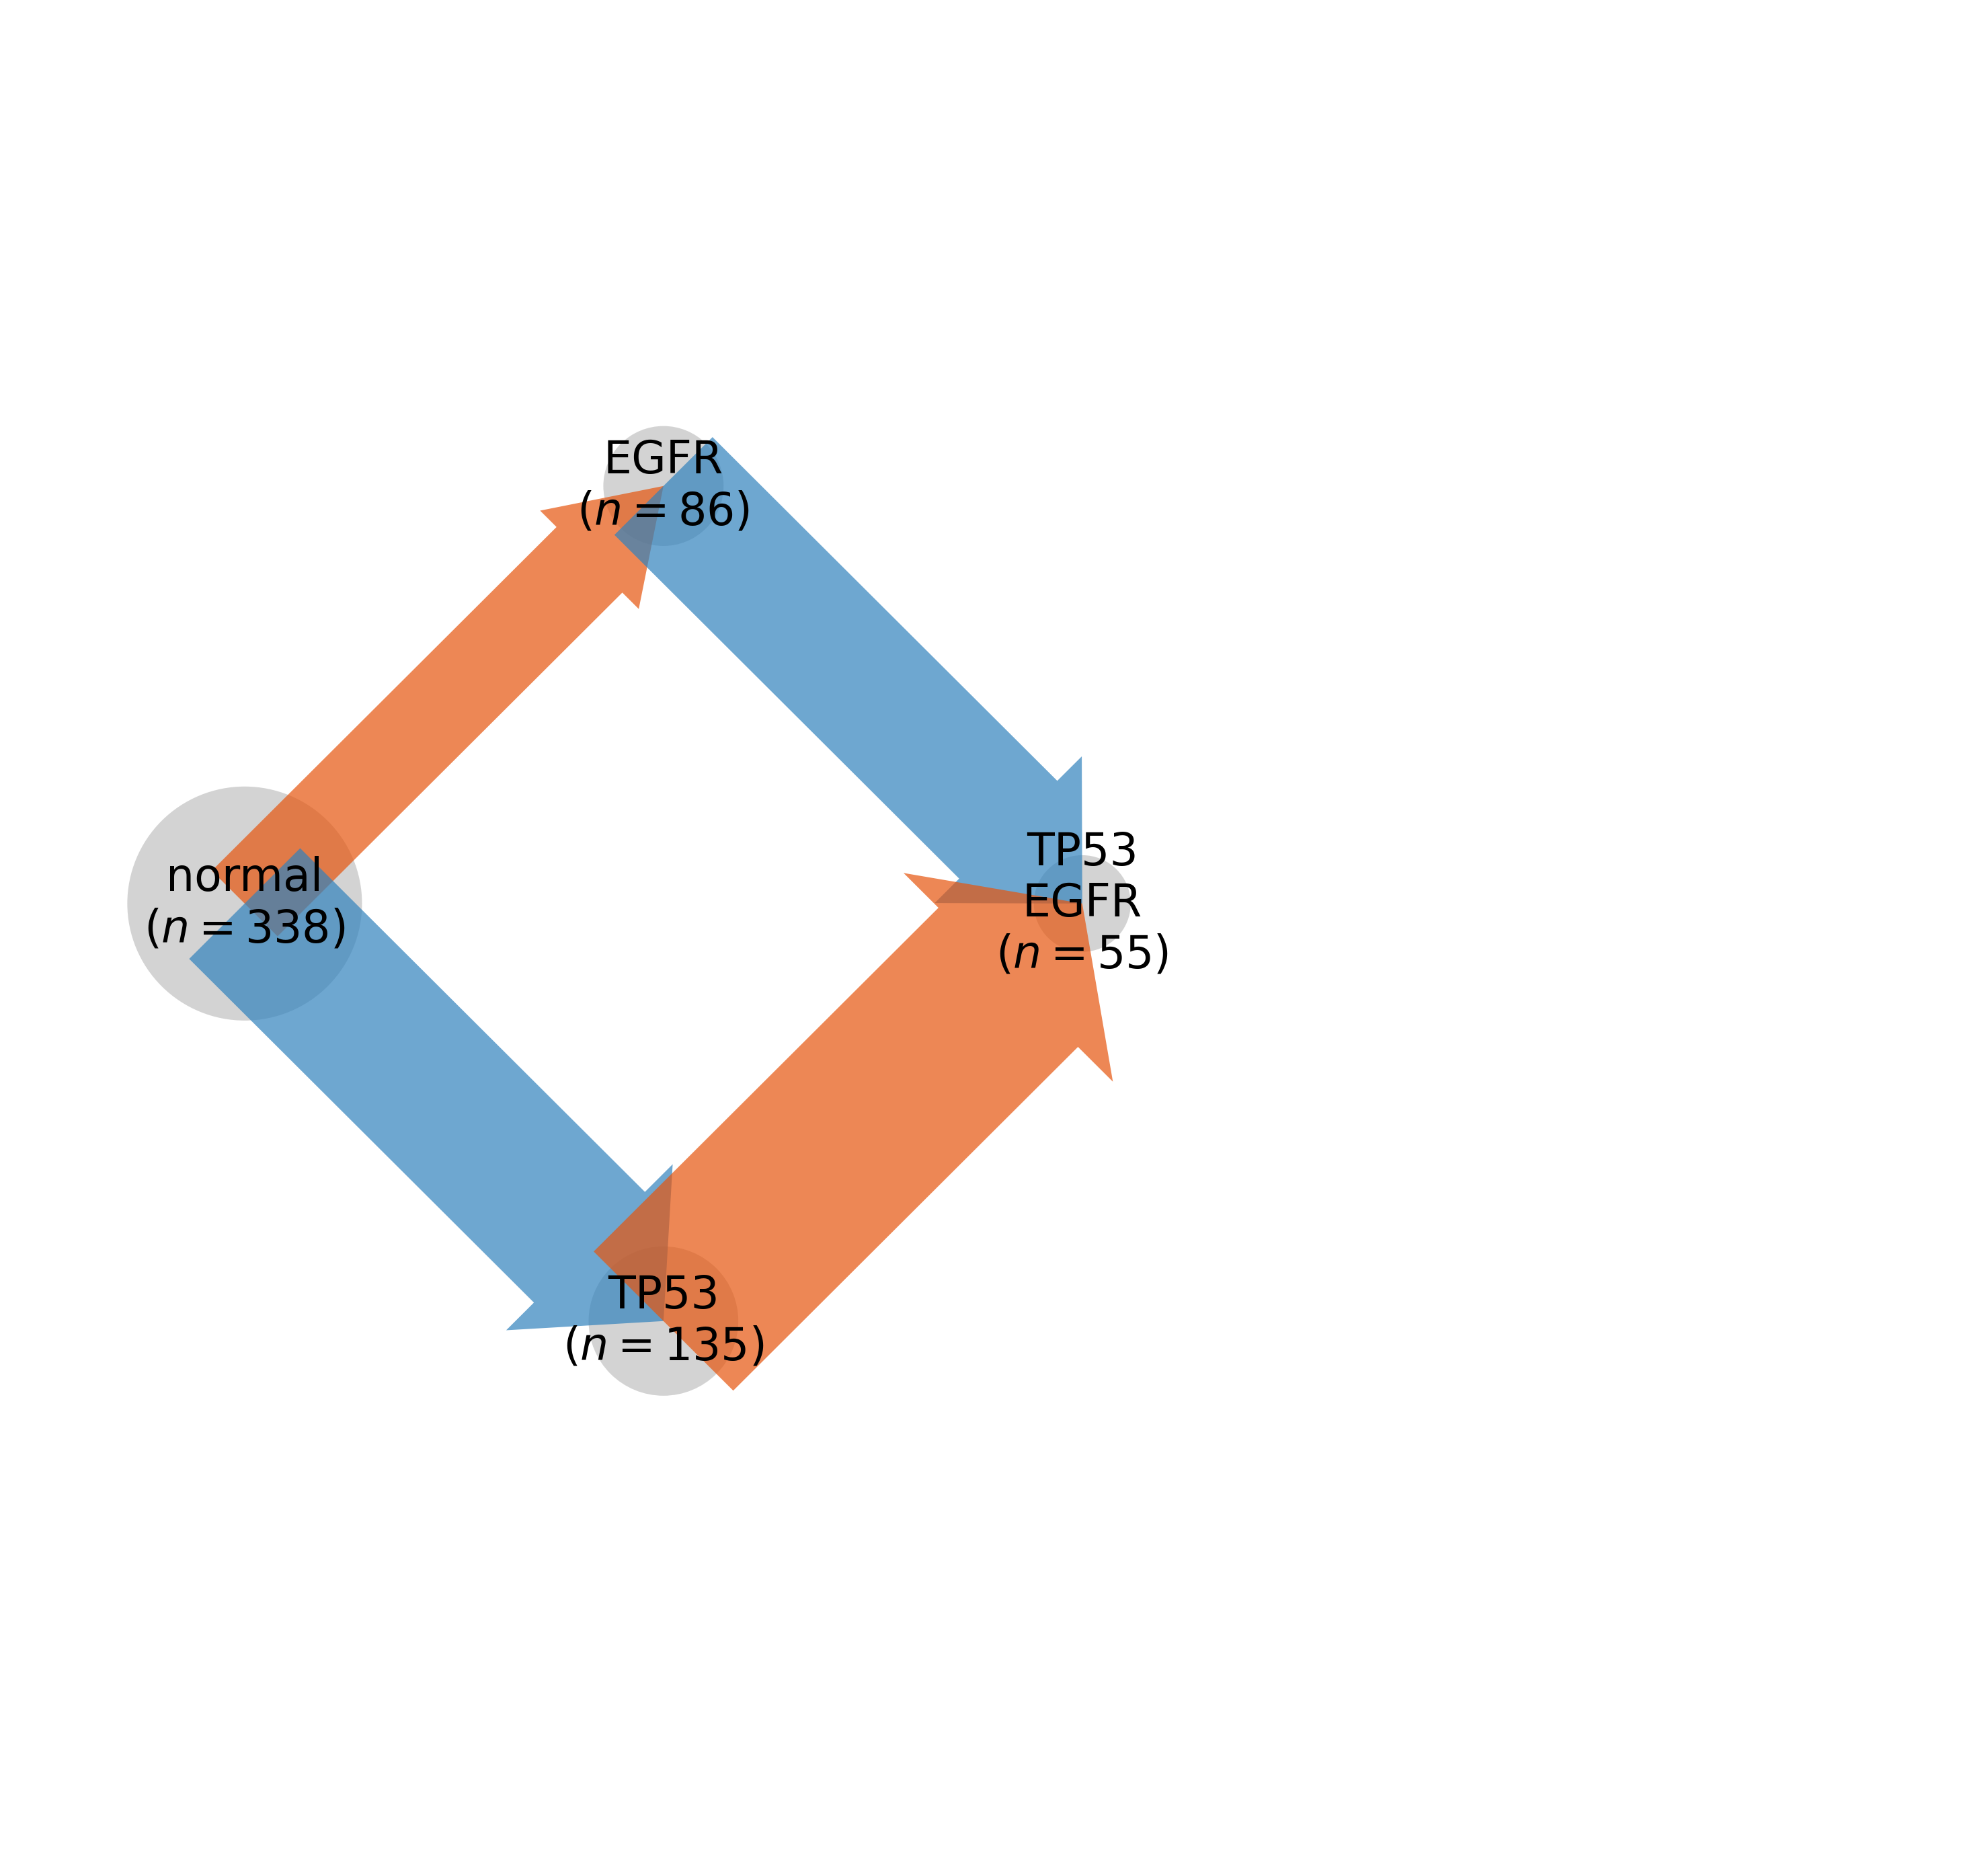

In [20]:
plot_trajectory(['TP53', 'EGFR'],'nonsmoking_plus','fixation', scale_circle_areas=0.015, multiplier_font_size=2)

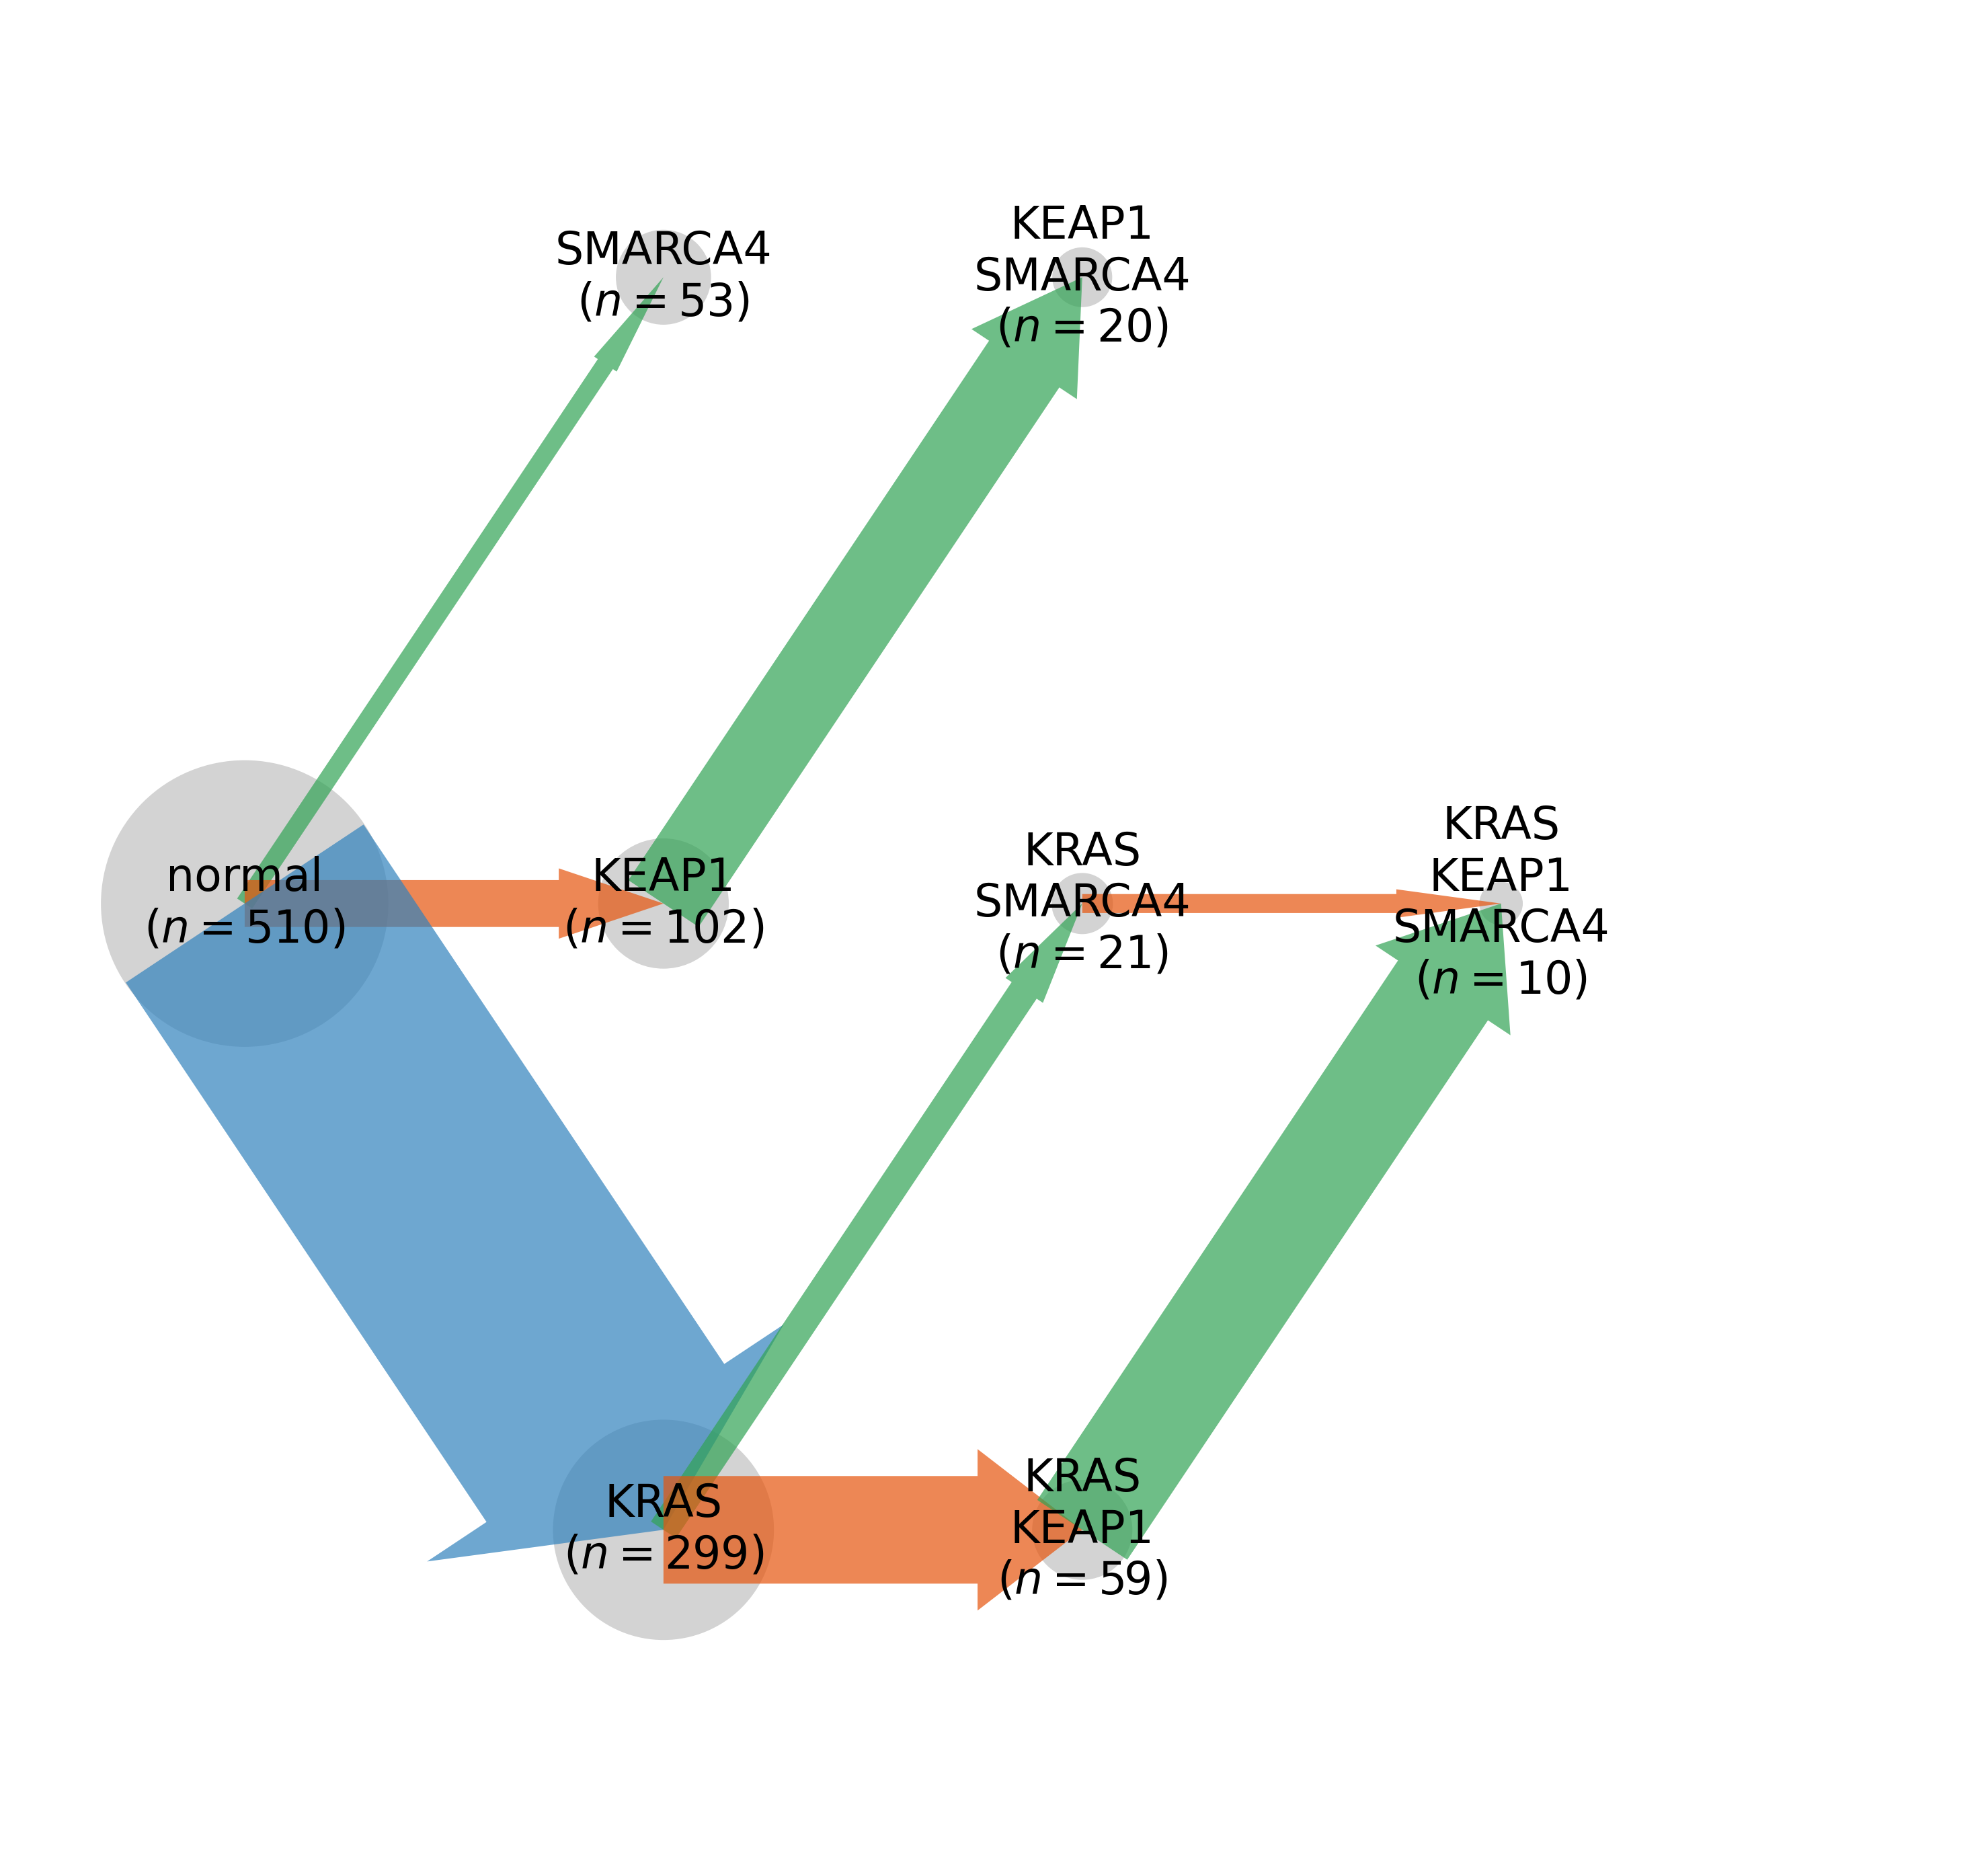

In [17]:
plot_trajectory(['KRAS', 'KEAP1', 'SMARCA4'],'smoking_plus','selection', scale_circle_areas=0.015, multiplier_font_size=2)

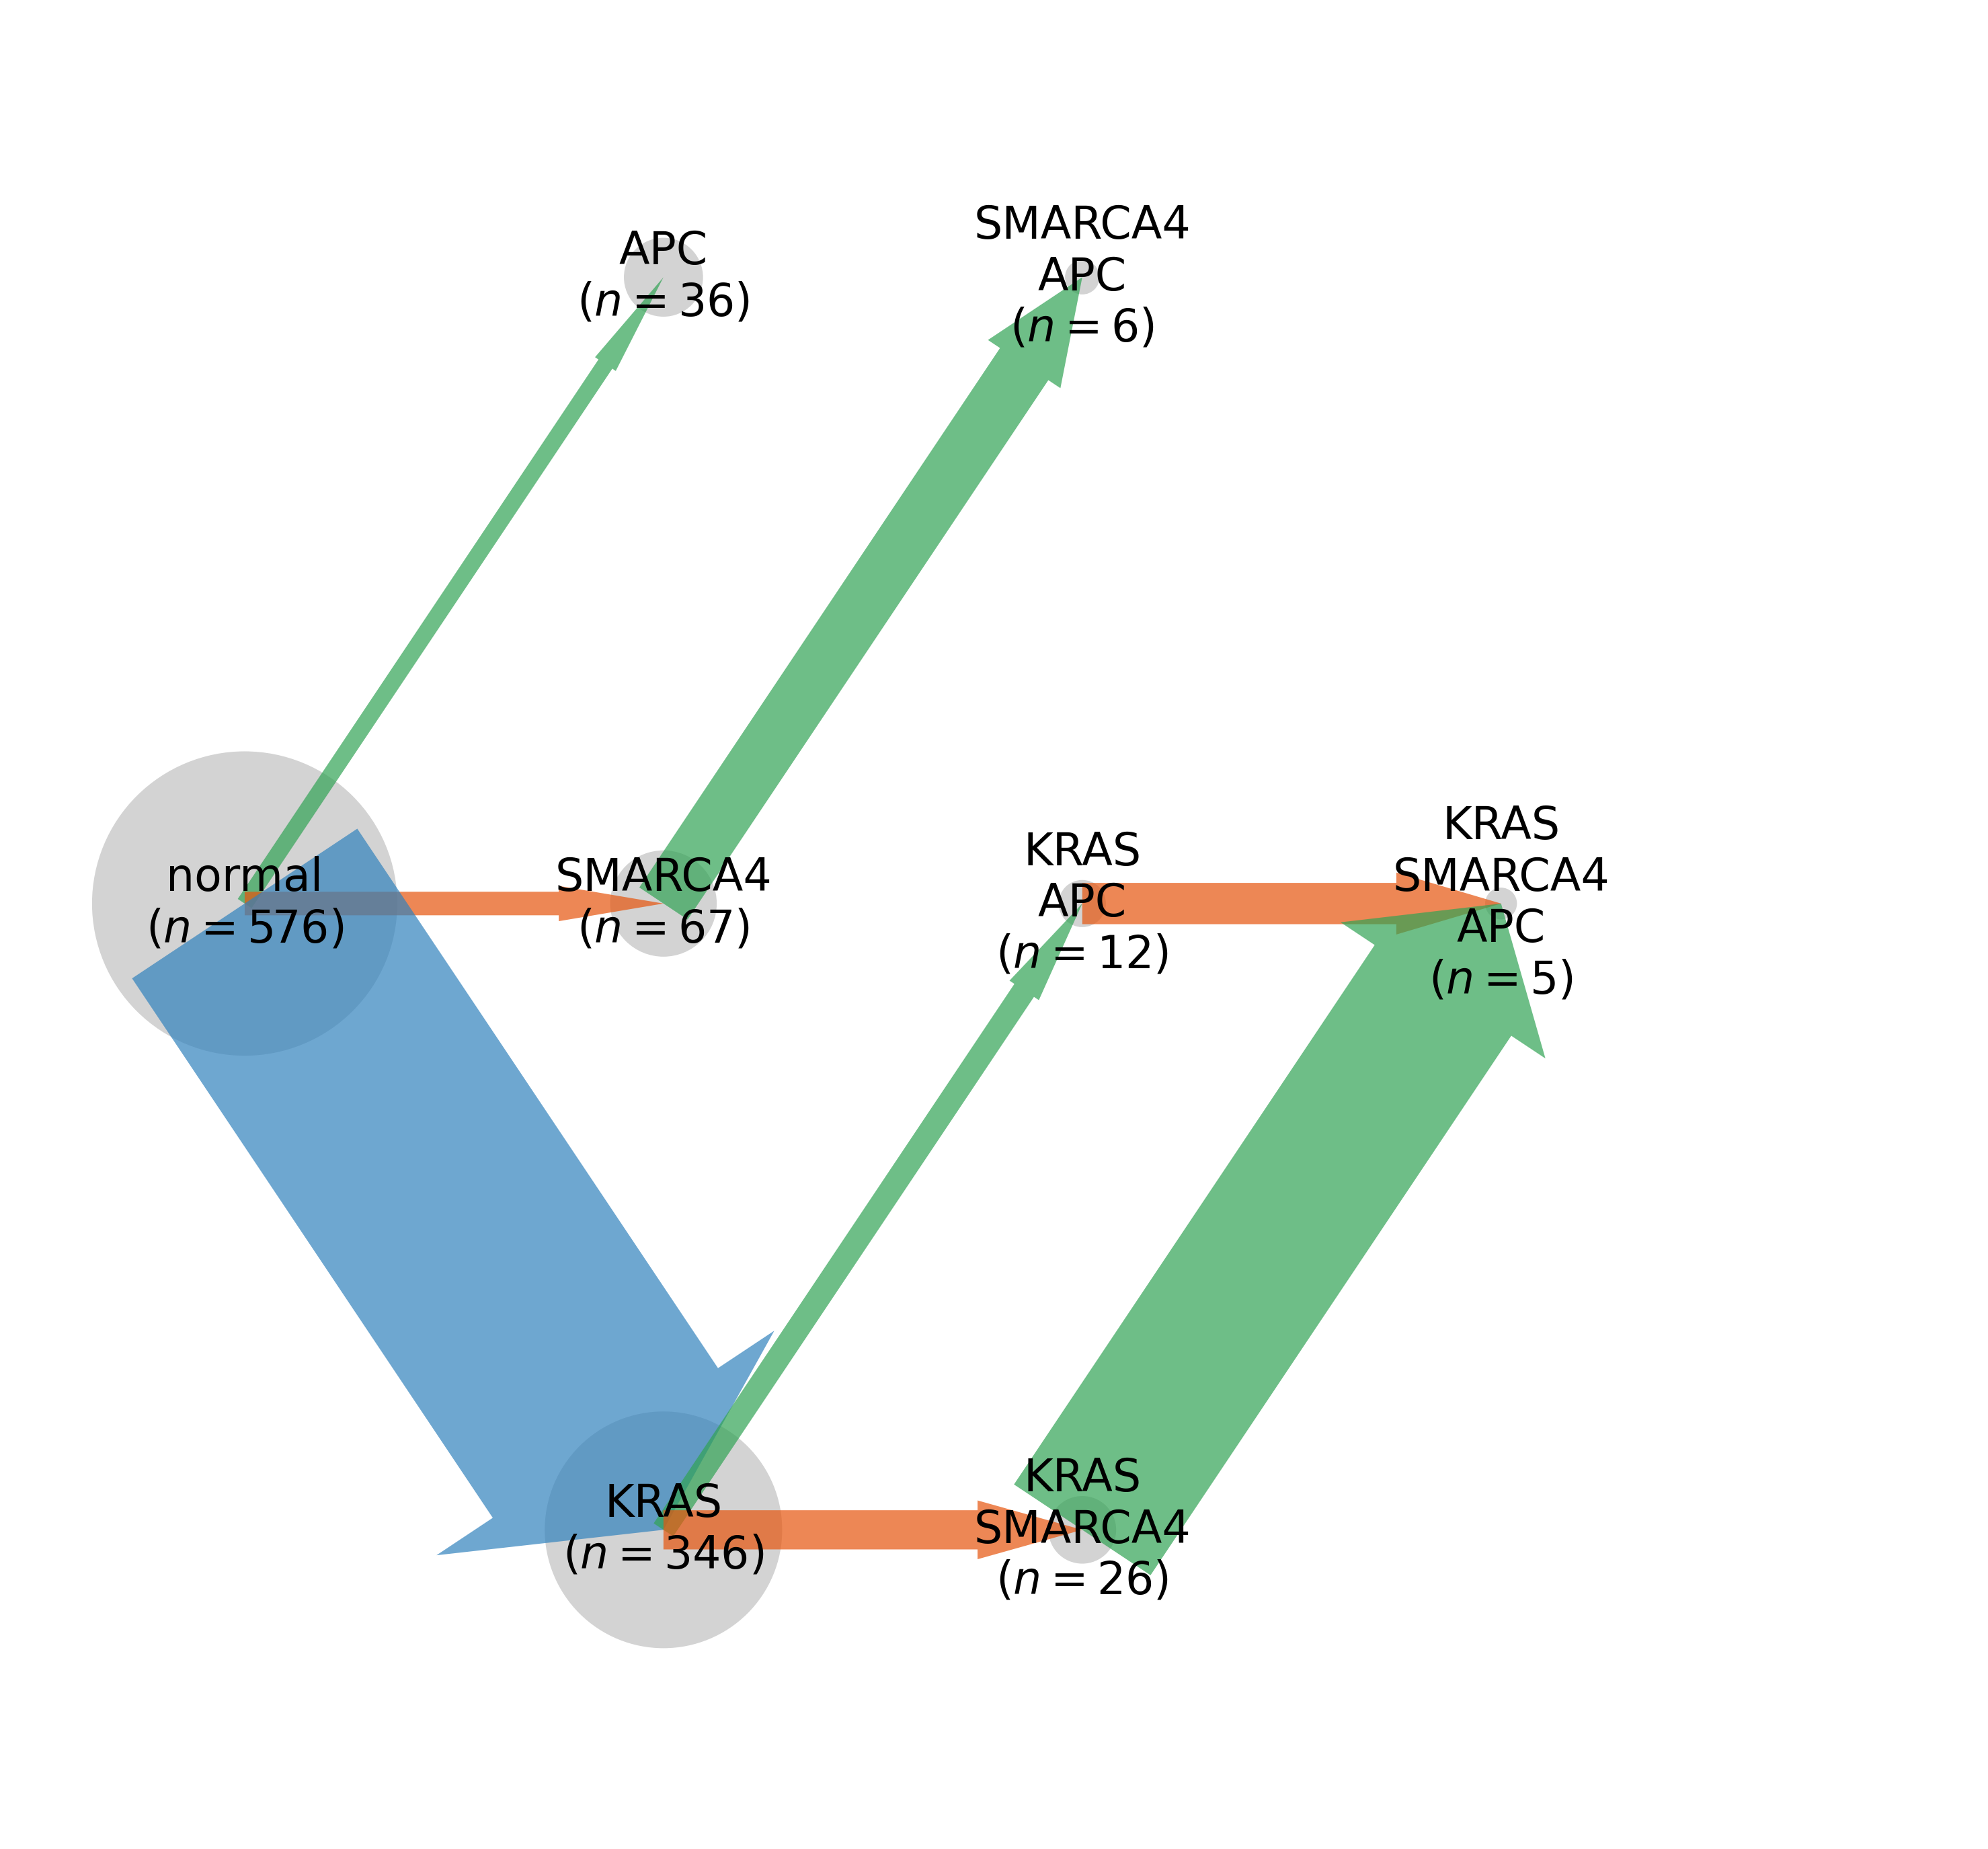

In [16]:
plot_trajectory(['KRAS', 'SMARCA4', 'APC'],'smoking_plus','selection', scale_circle_areas=0.015, multiplier_font_size=2)

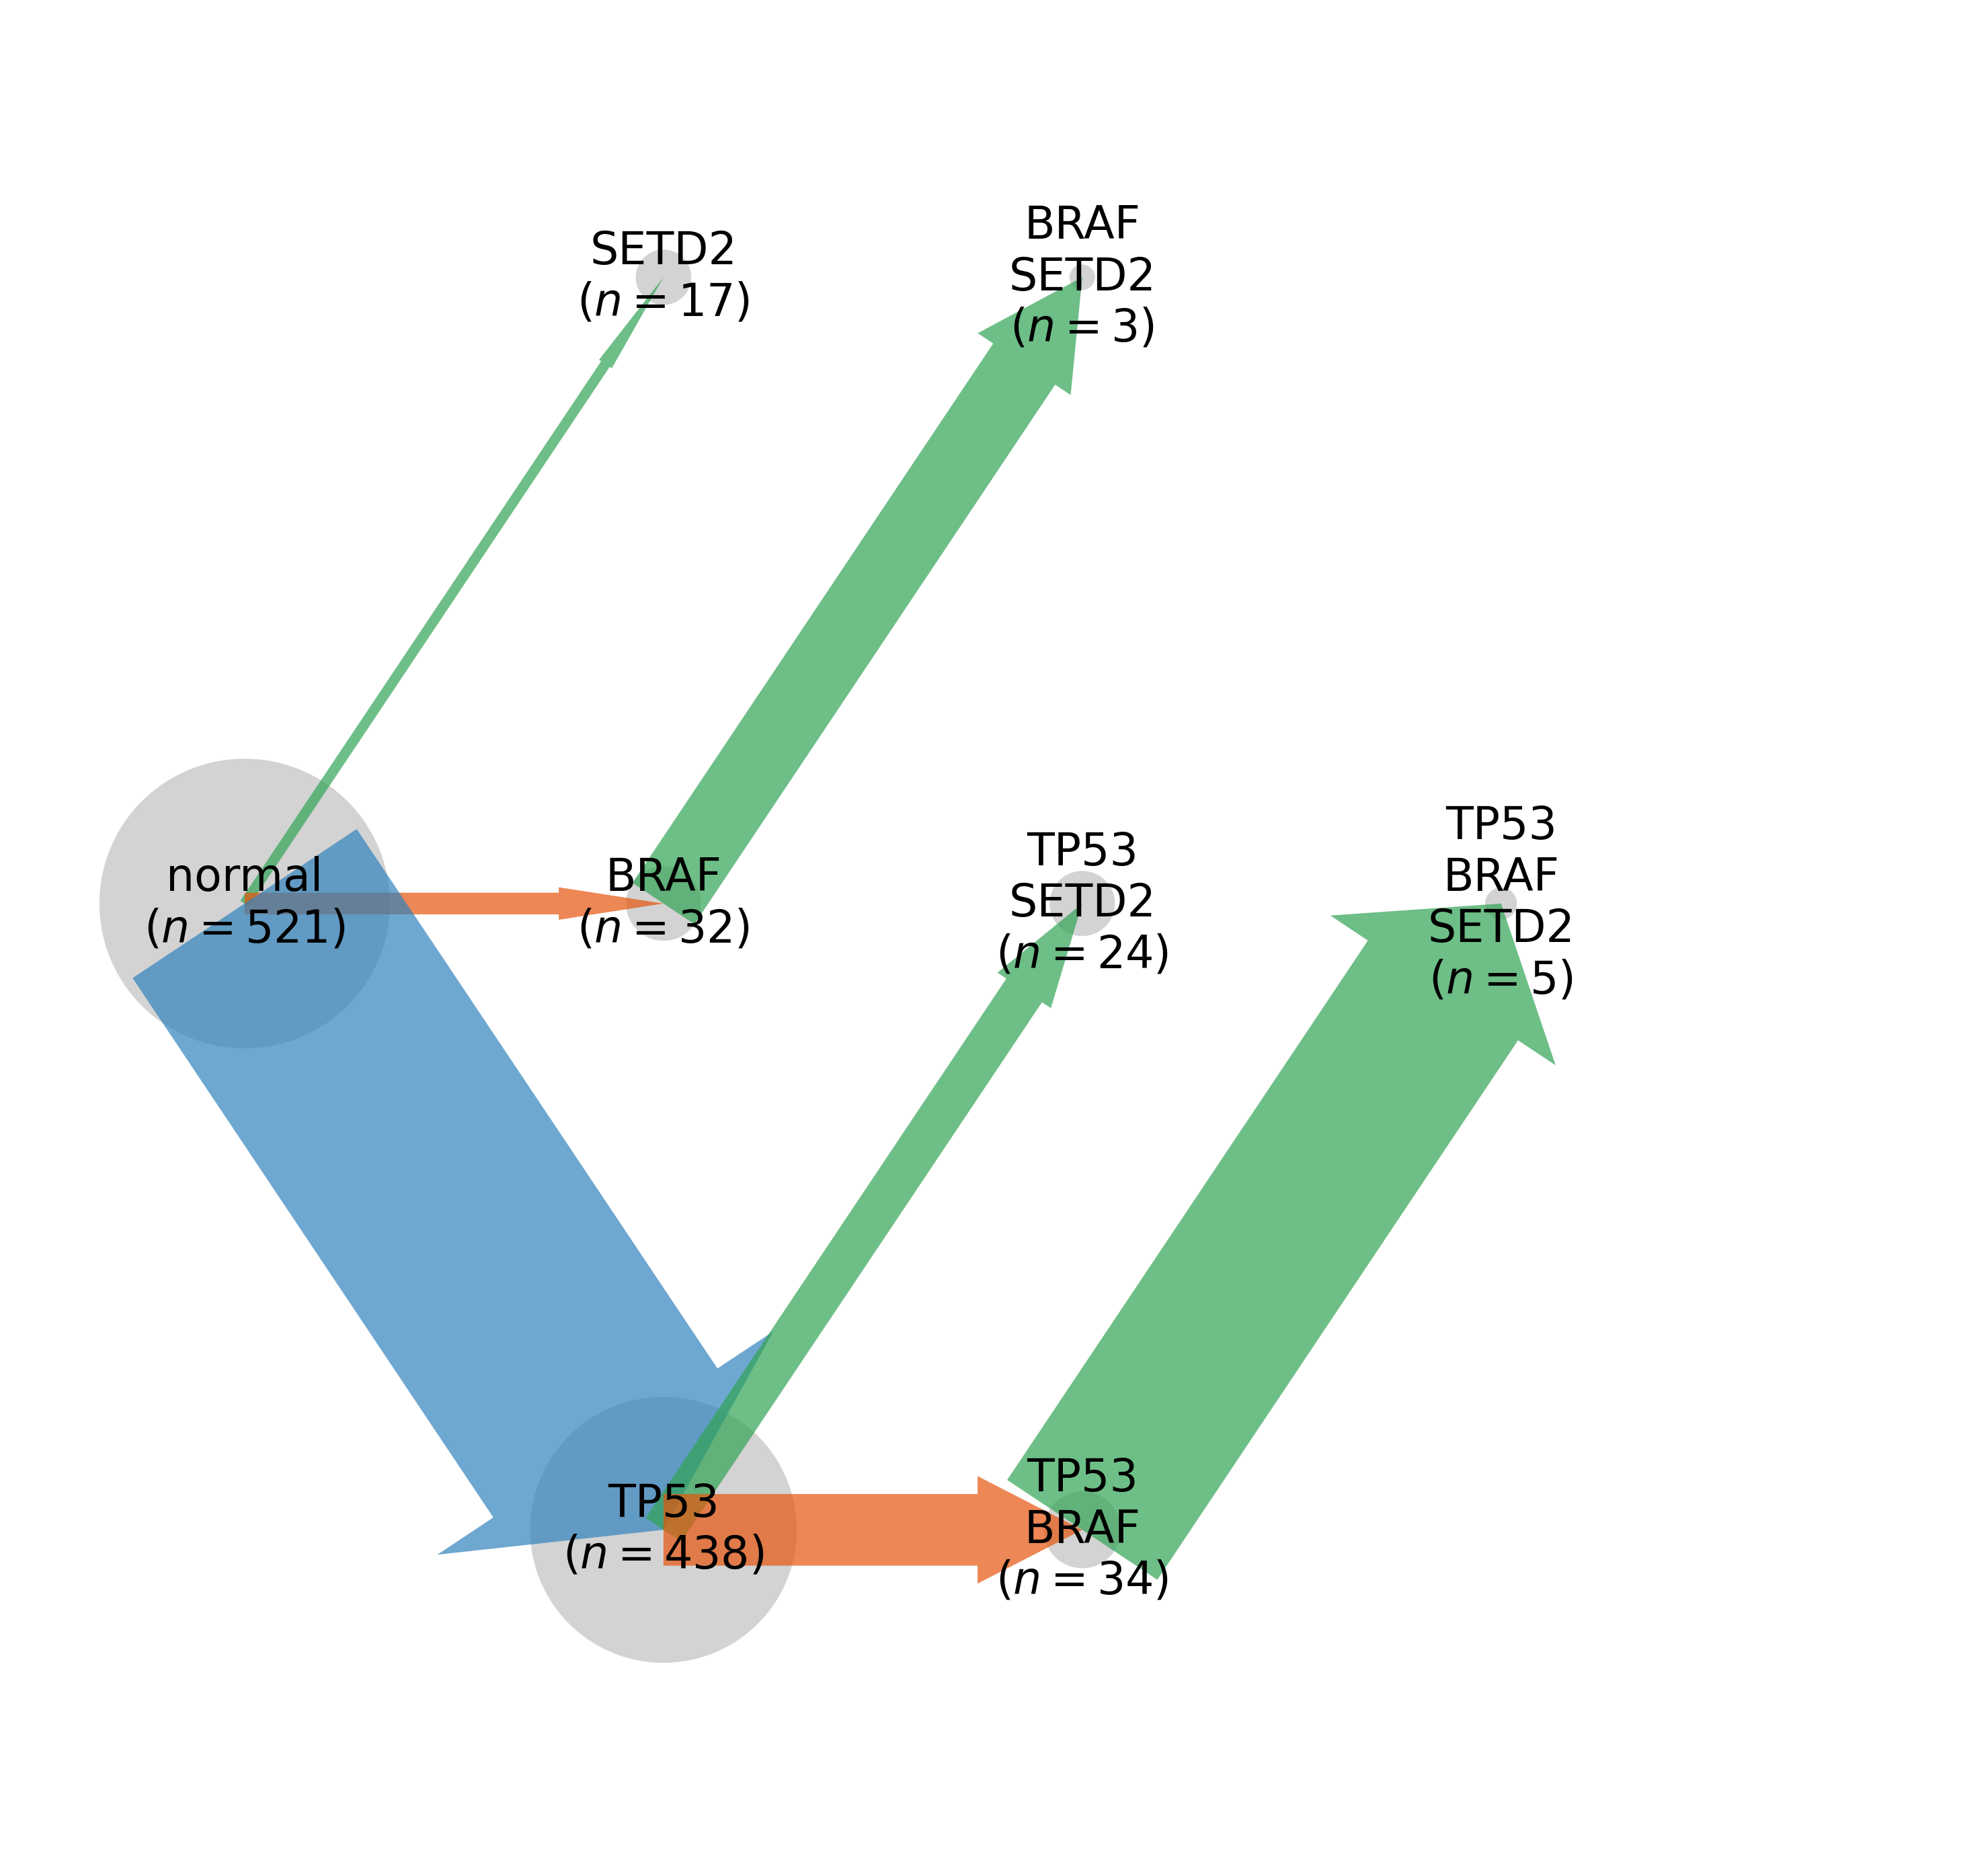

In [13]:
plot_trajectory(['TP53', 'BRAF', 'SETD2'],'smoking_plus','selection', scale_circle_areas=0.015, multiplier_font_size=2)

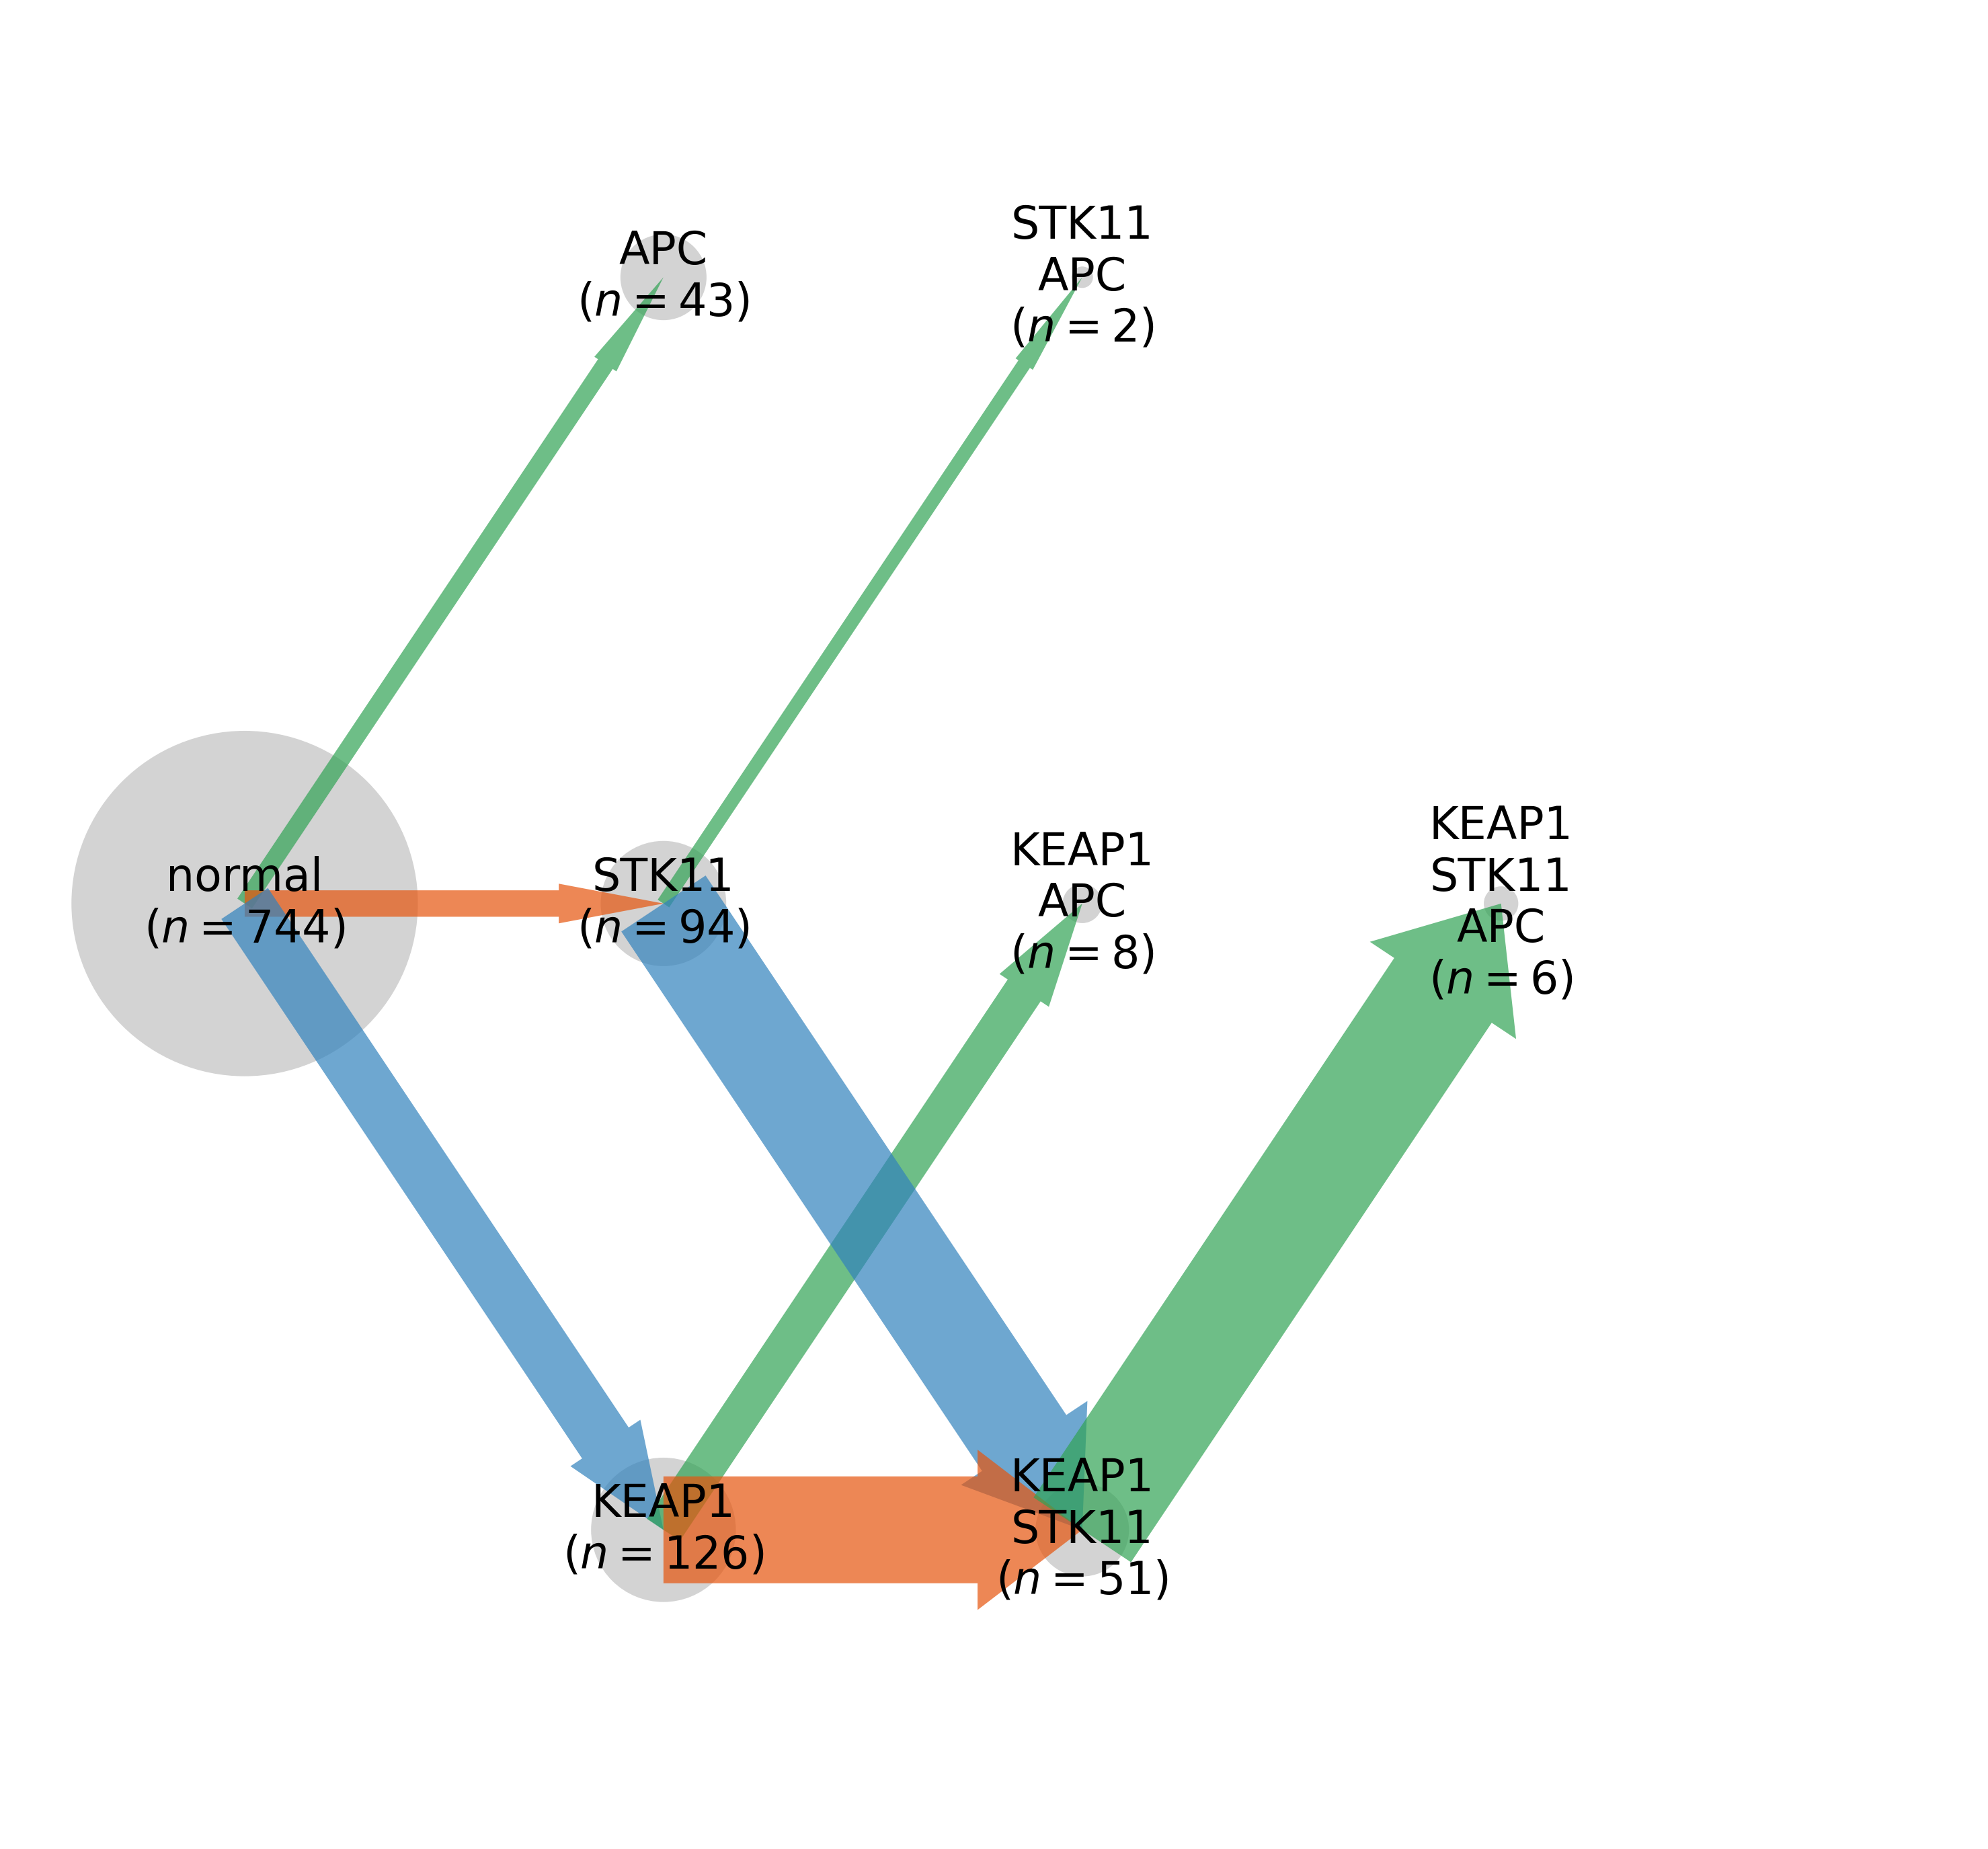

In [12]:
plot_trajectory(['KEAP1', 'STK11', 'APC'],'smoking_plus','selection', scale_circle_areas=0.015, multiplier_font_size=2)

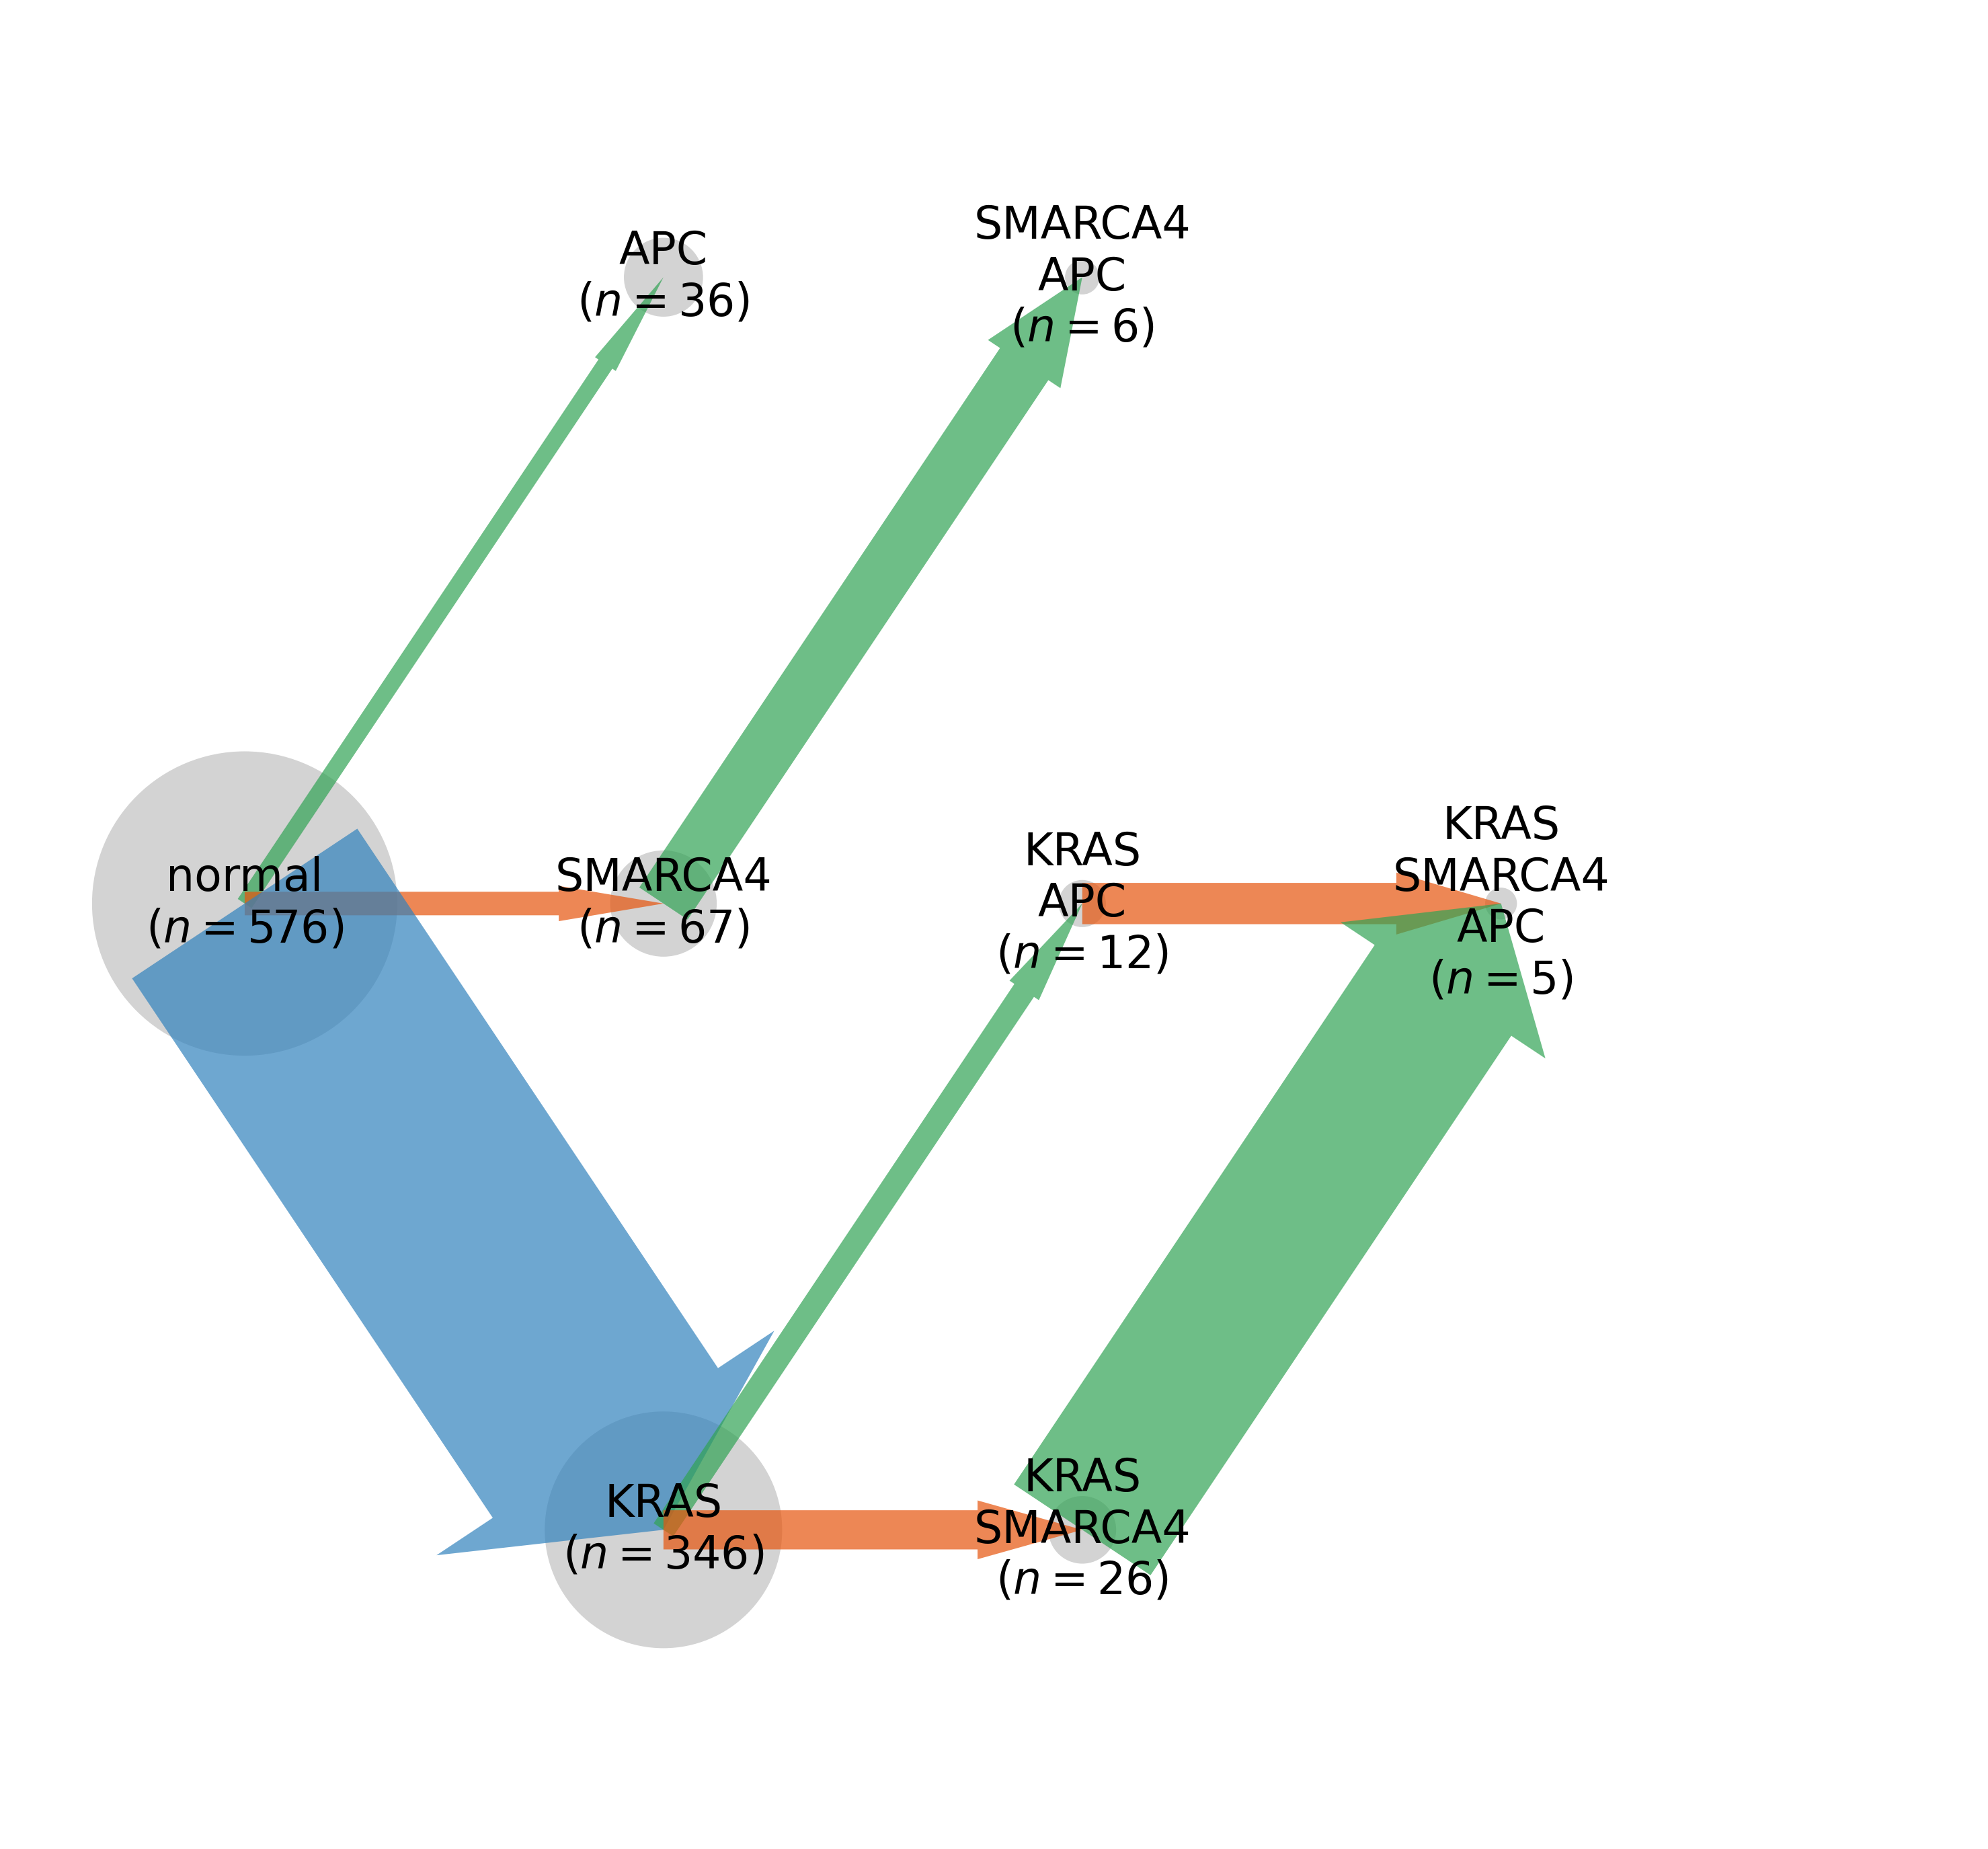

In [11]:
plot_trajectory(['KRAS', 'SMARCA4', 'APC'],'smoking_plus','selection', scale_circle_areas=0.015, multiplier_font_size=2)

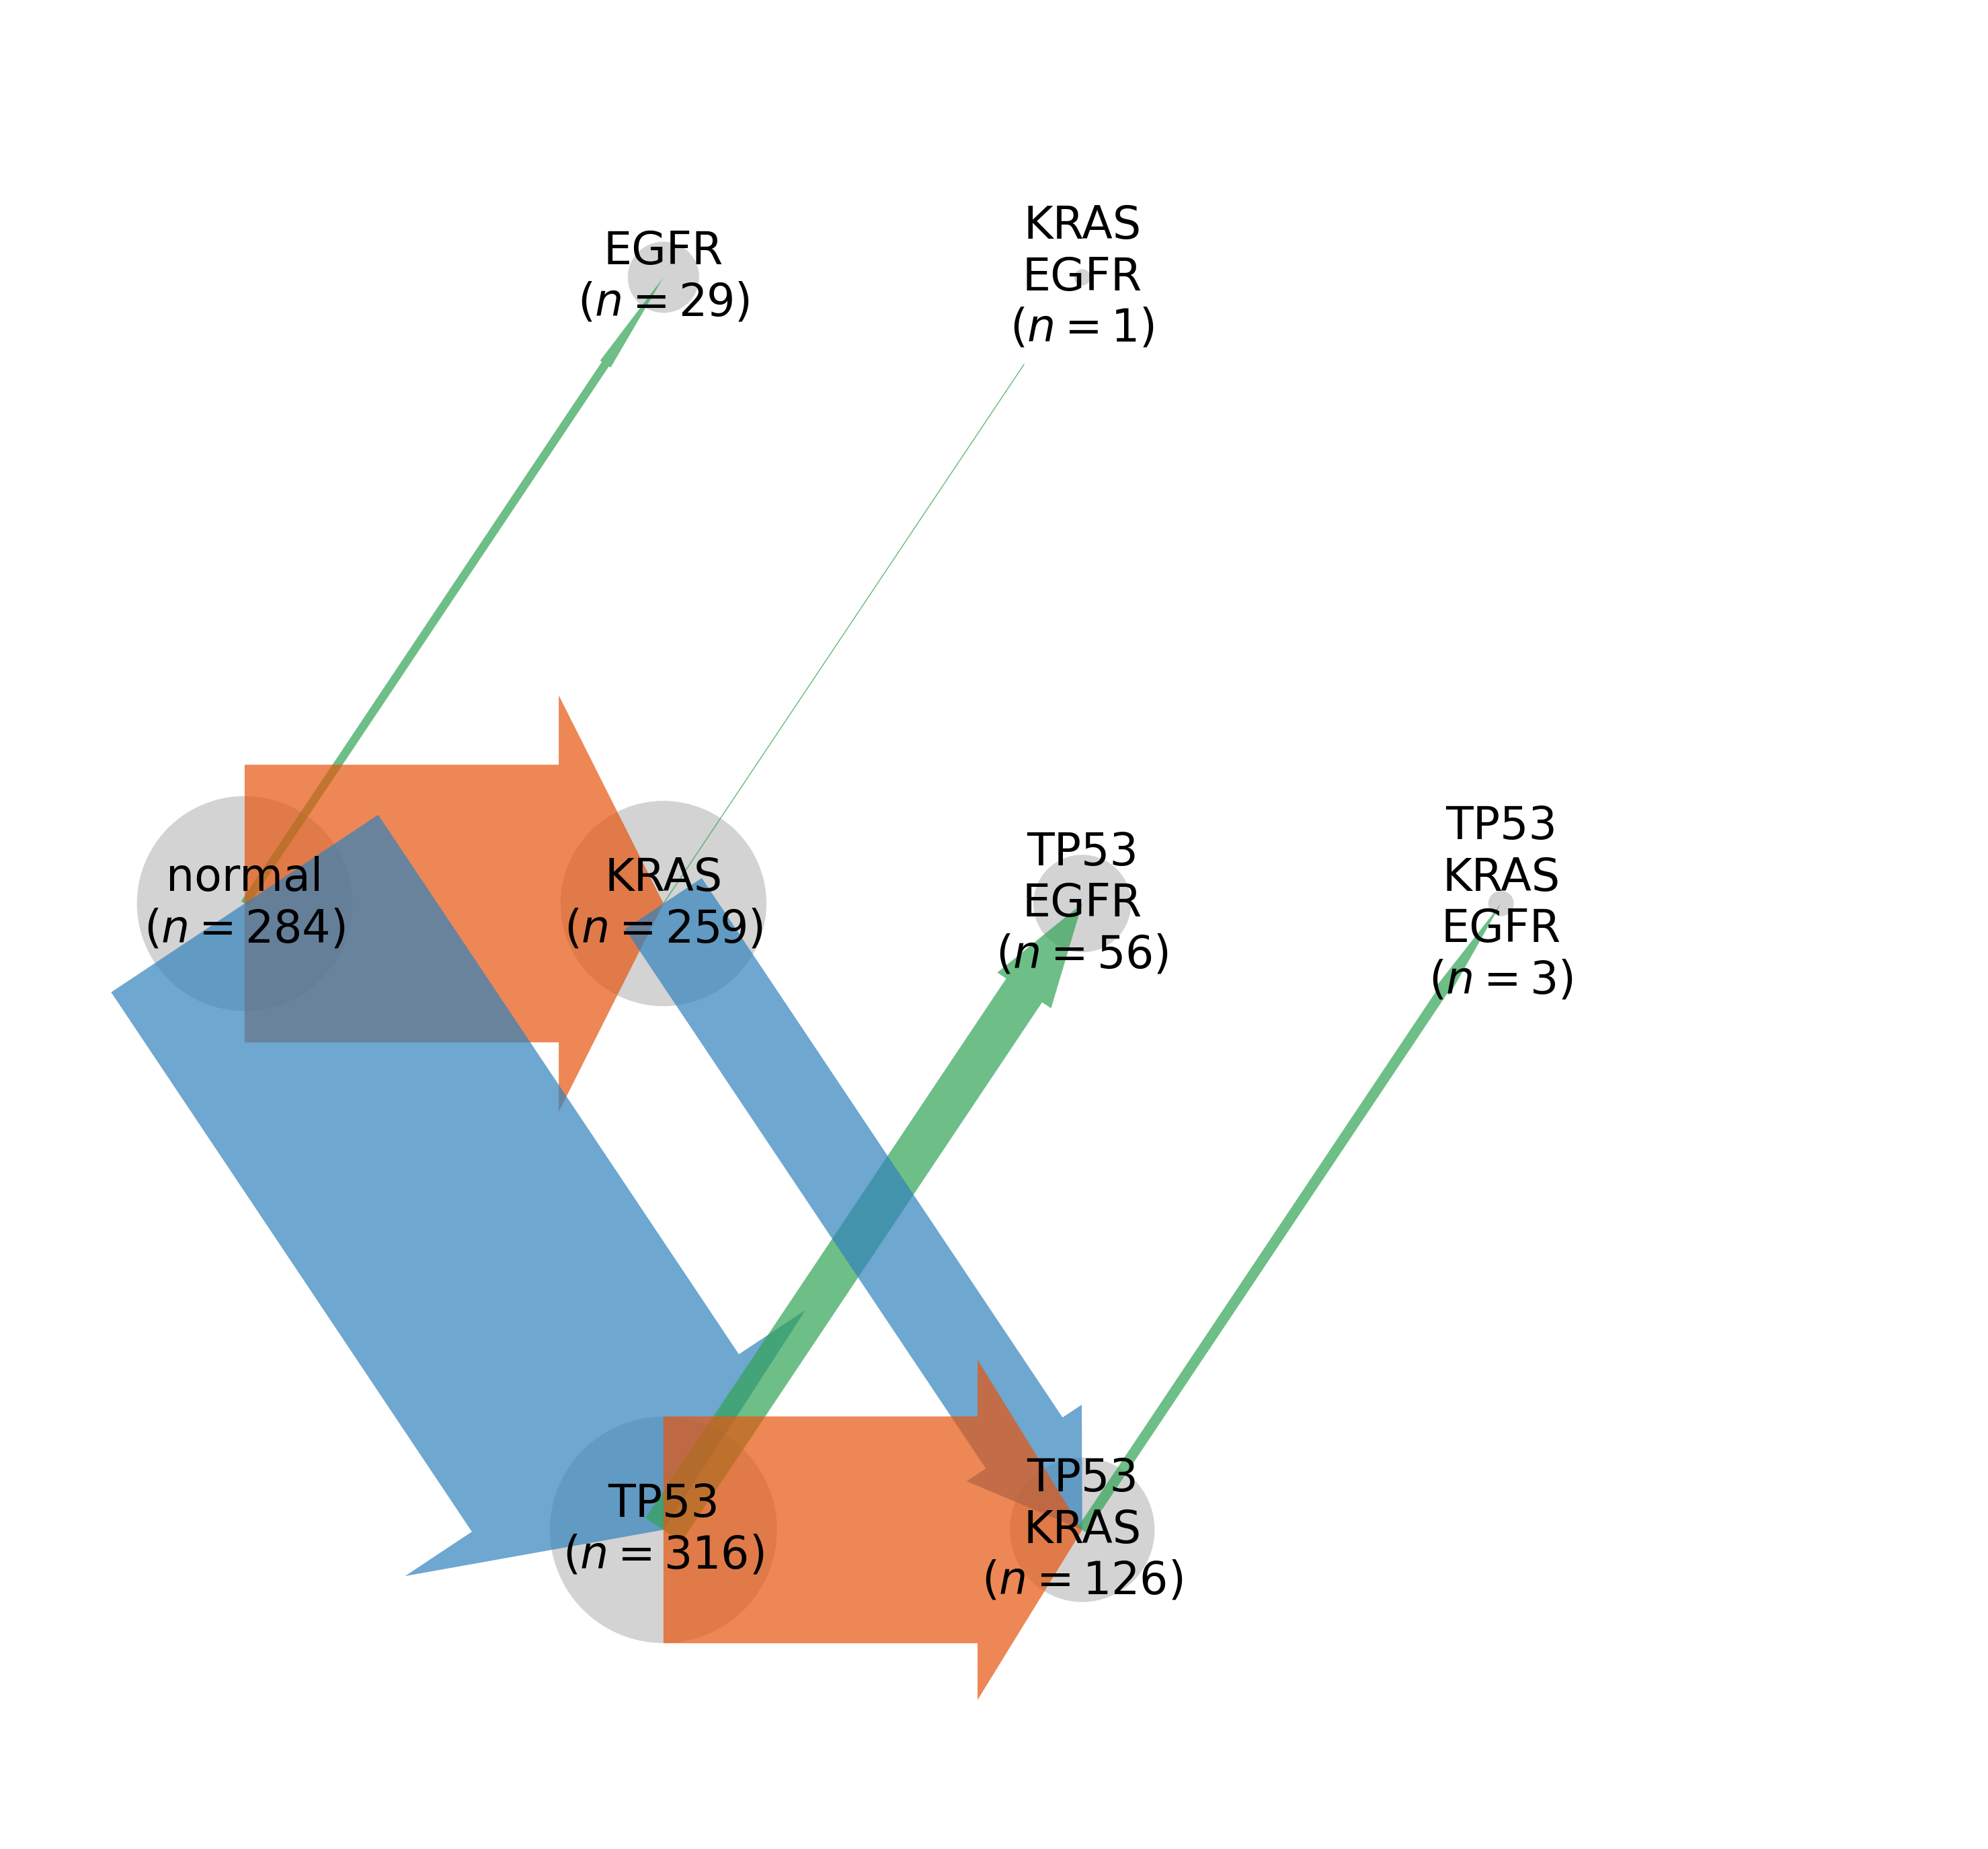

In [8]:
plot_trajectory(['TP53', 'KRAS', 'EGFR'],'smoking_plus','selection', scale_circle_areas=0.015, multiplier_font_size=2)

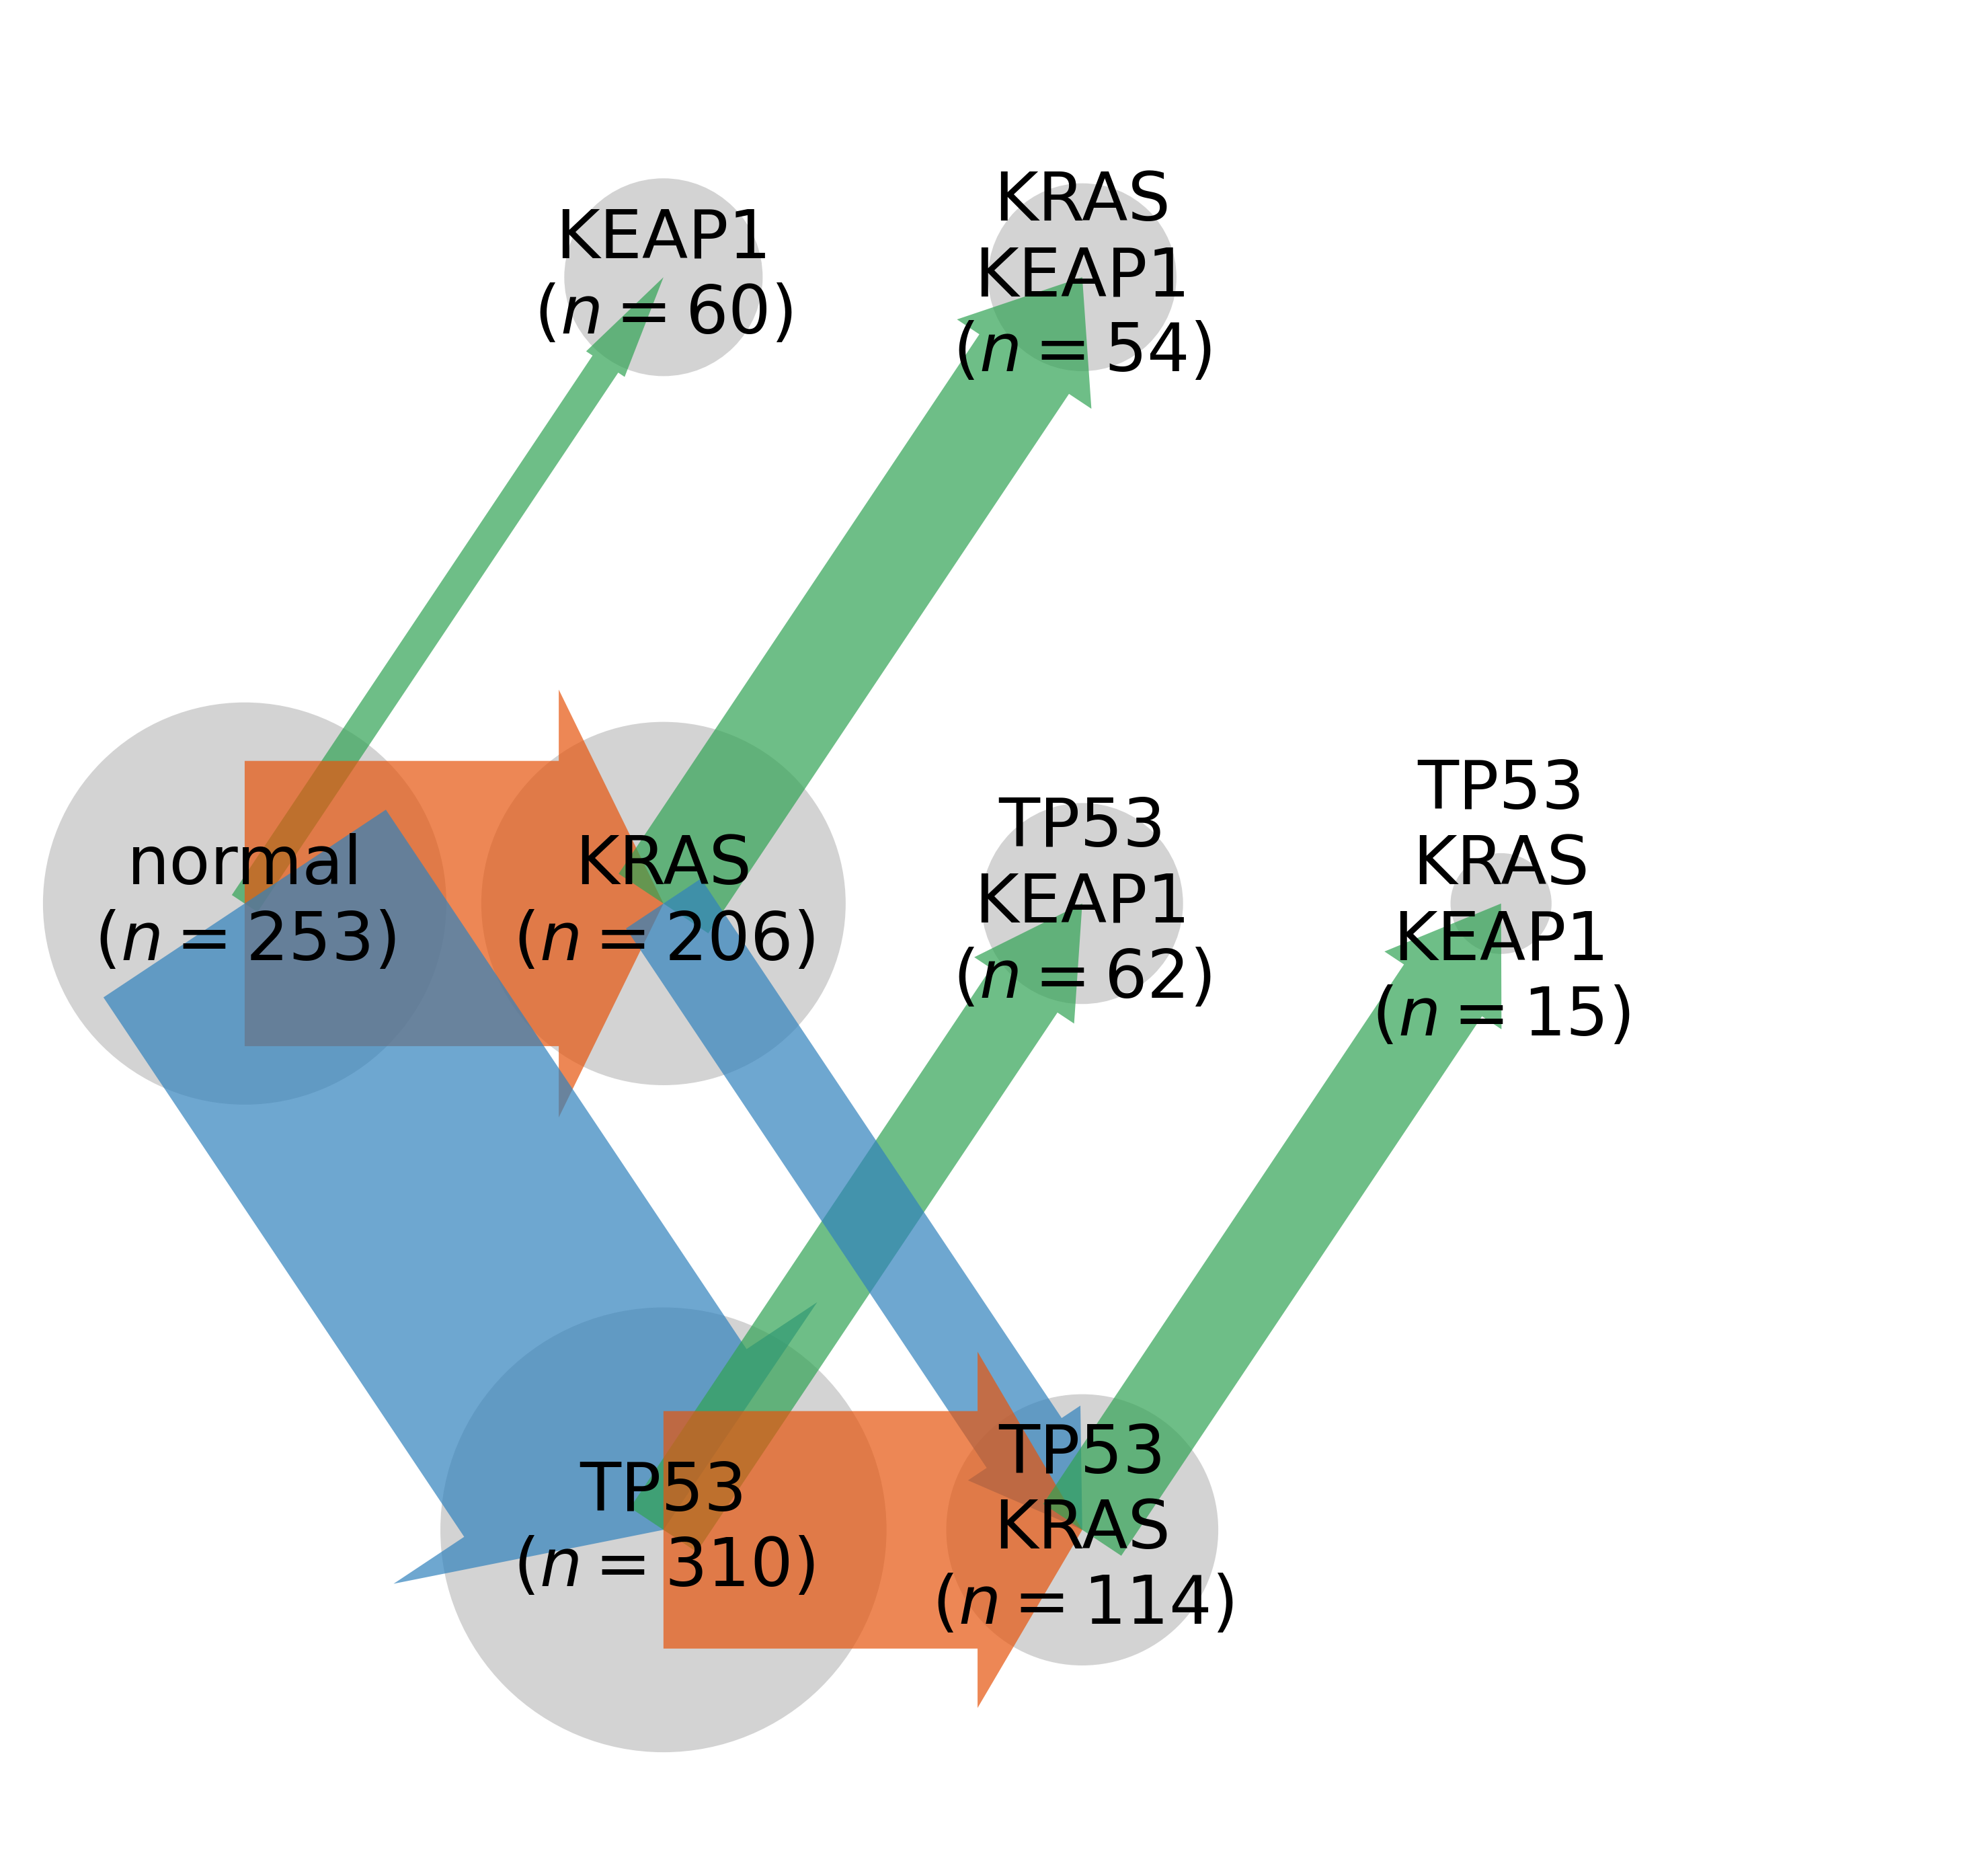

In [6]:
plot_trajectory(['TP53', 'EGFR', 'KEAP1'],'smoking_plus','selection', scale_circle_areas=0.03, multiplier_font_size=3)

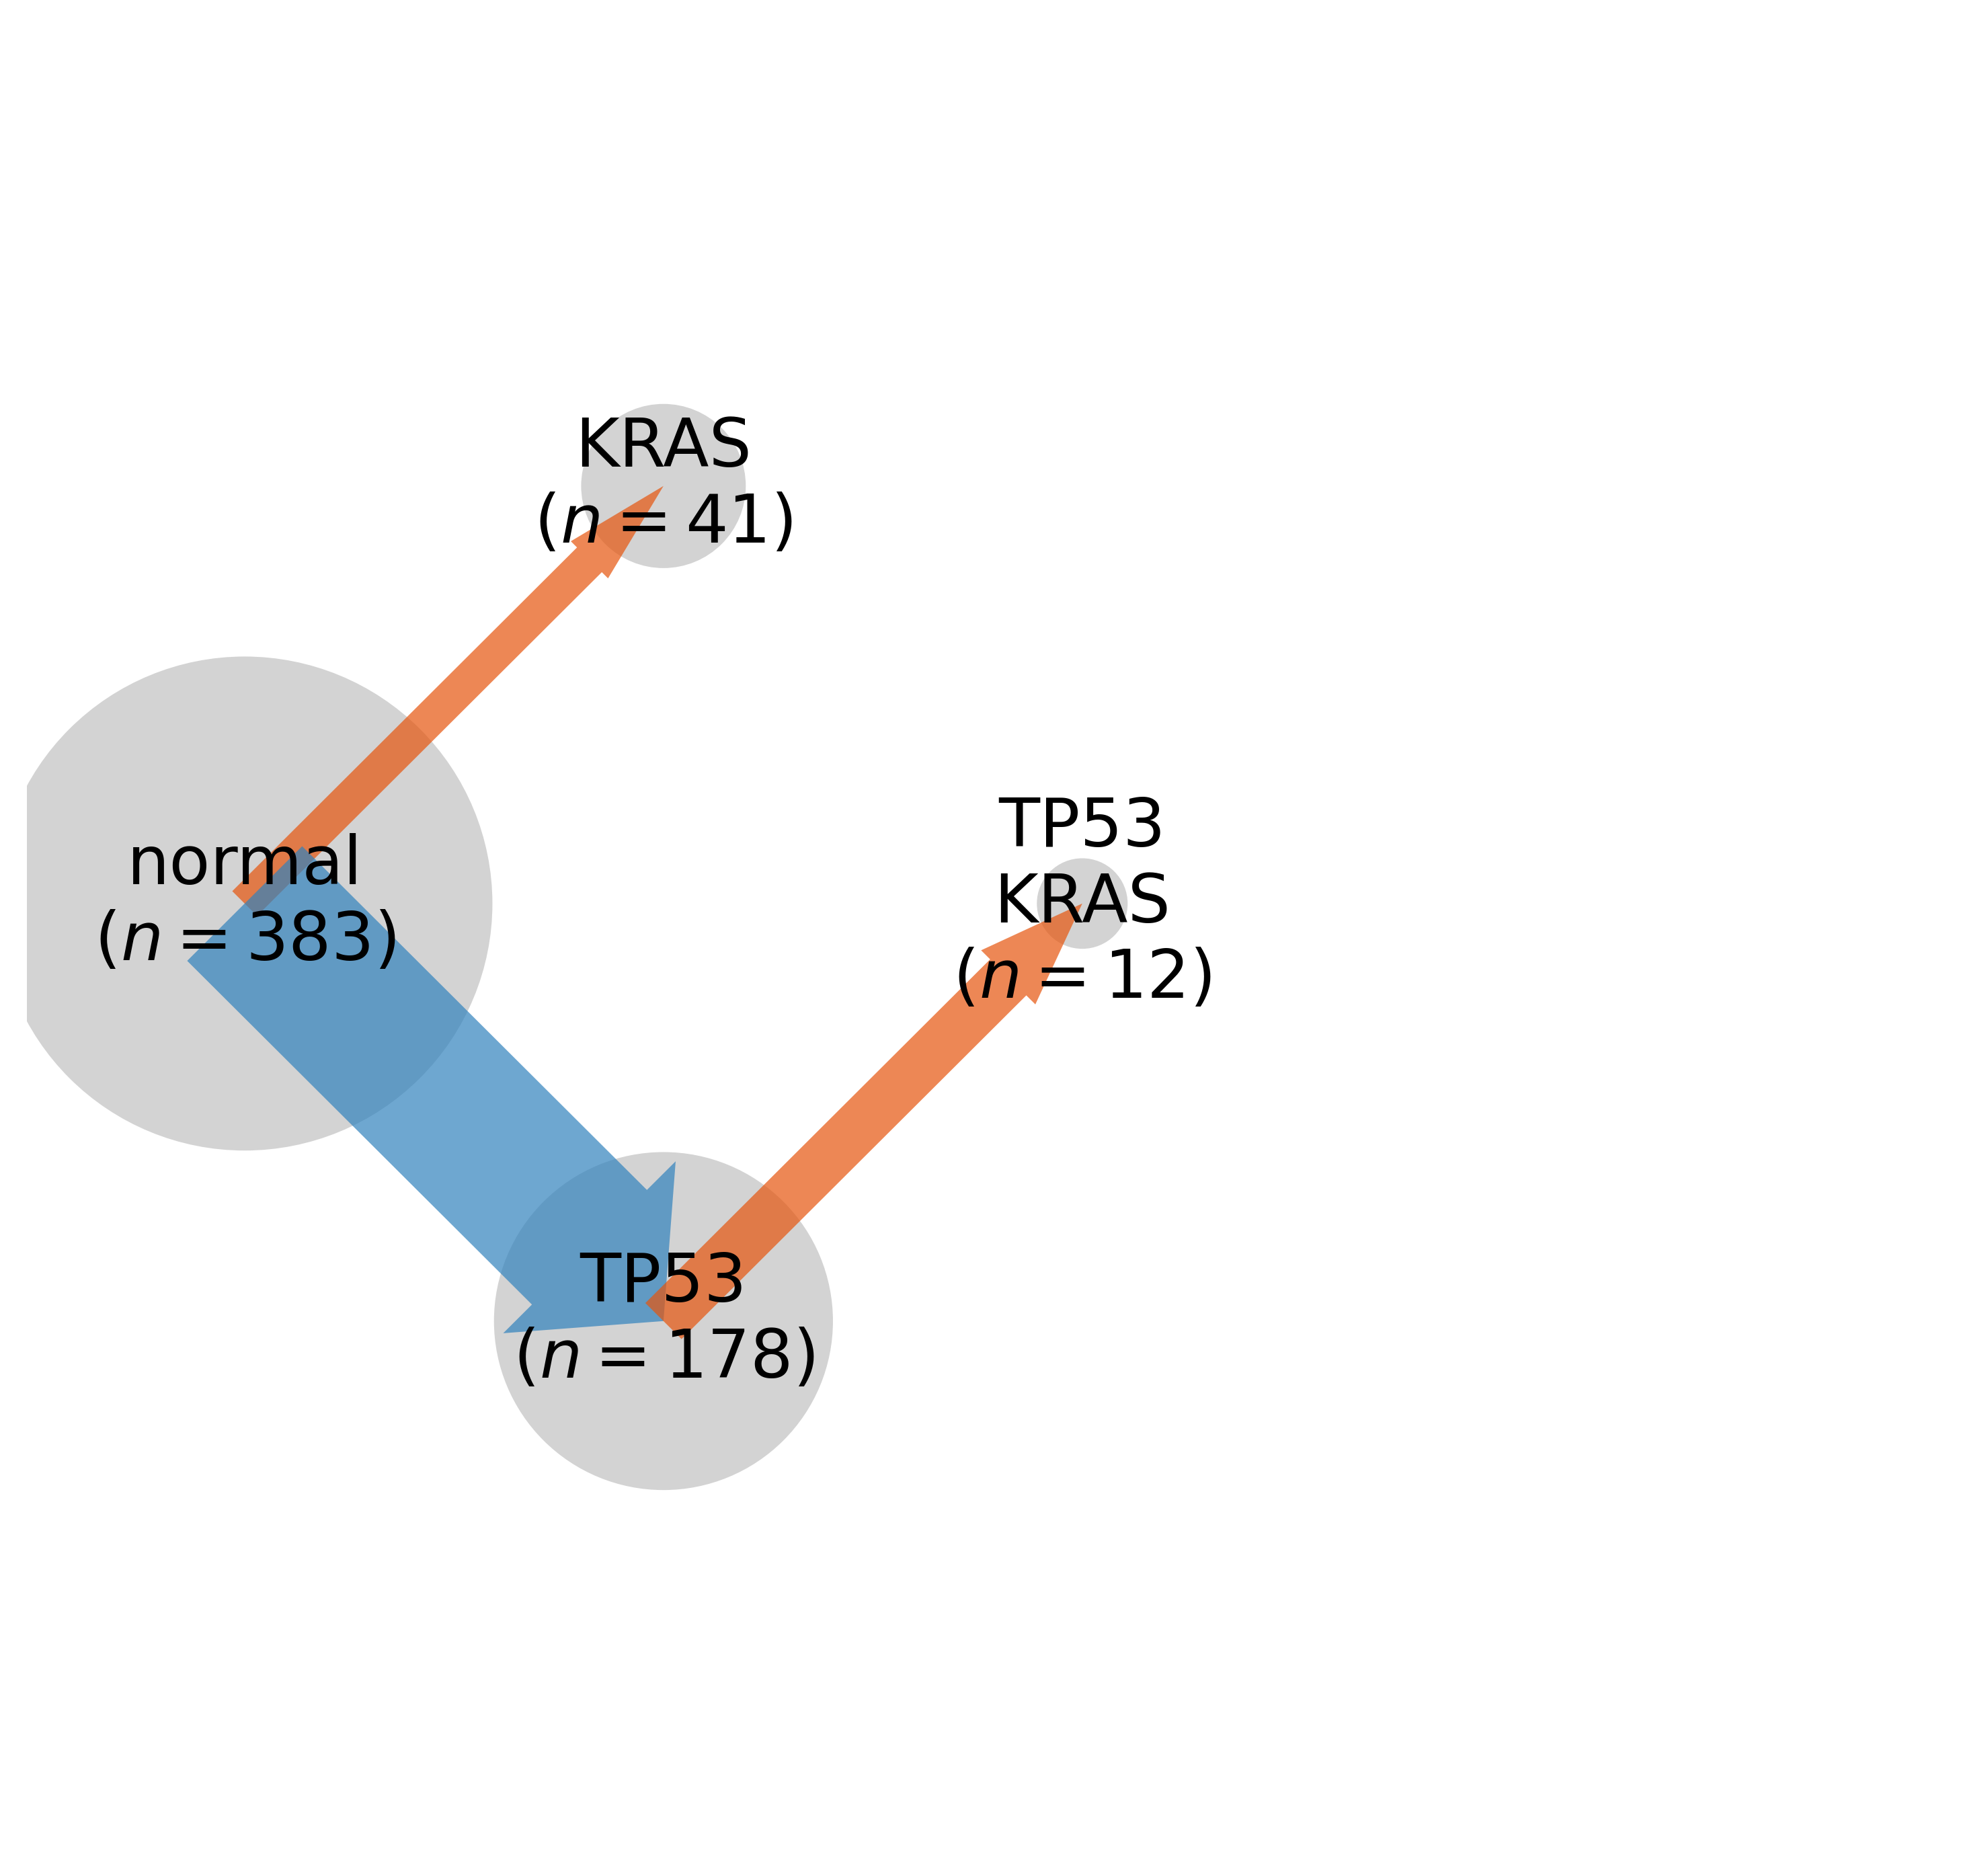

In [15]:
plot_trajectory(['TP53', 'KRAS'],'nonsmoking_plus','fixation', scale_circle_areas=0.03, multiplier_font_size=3)

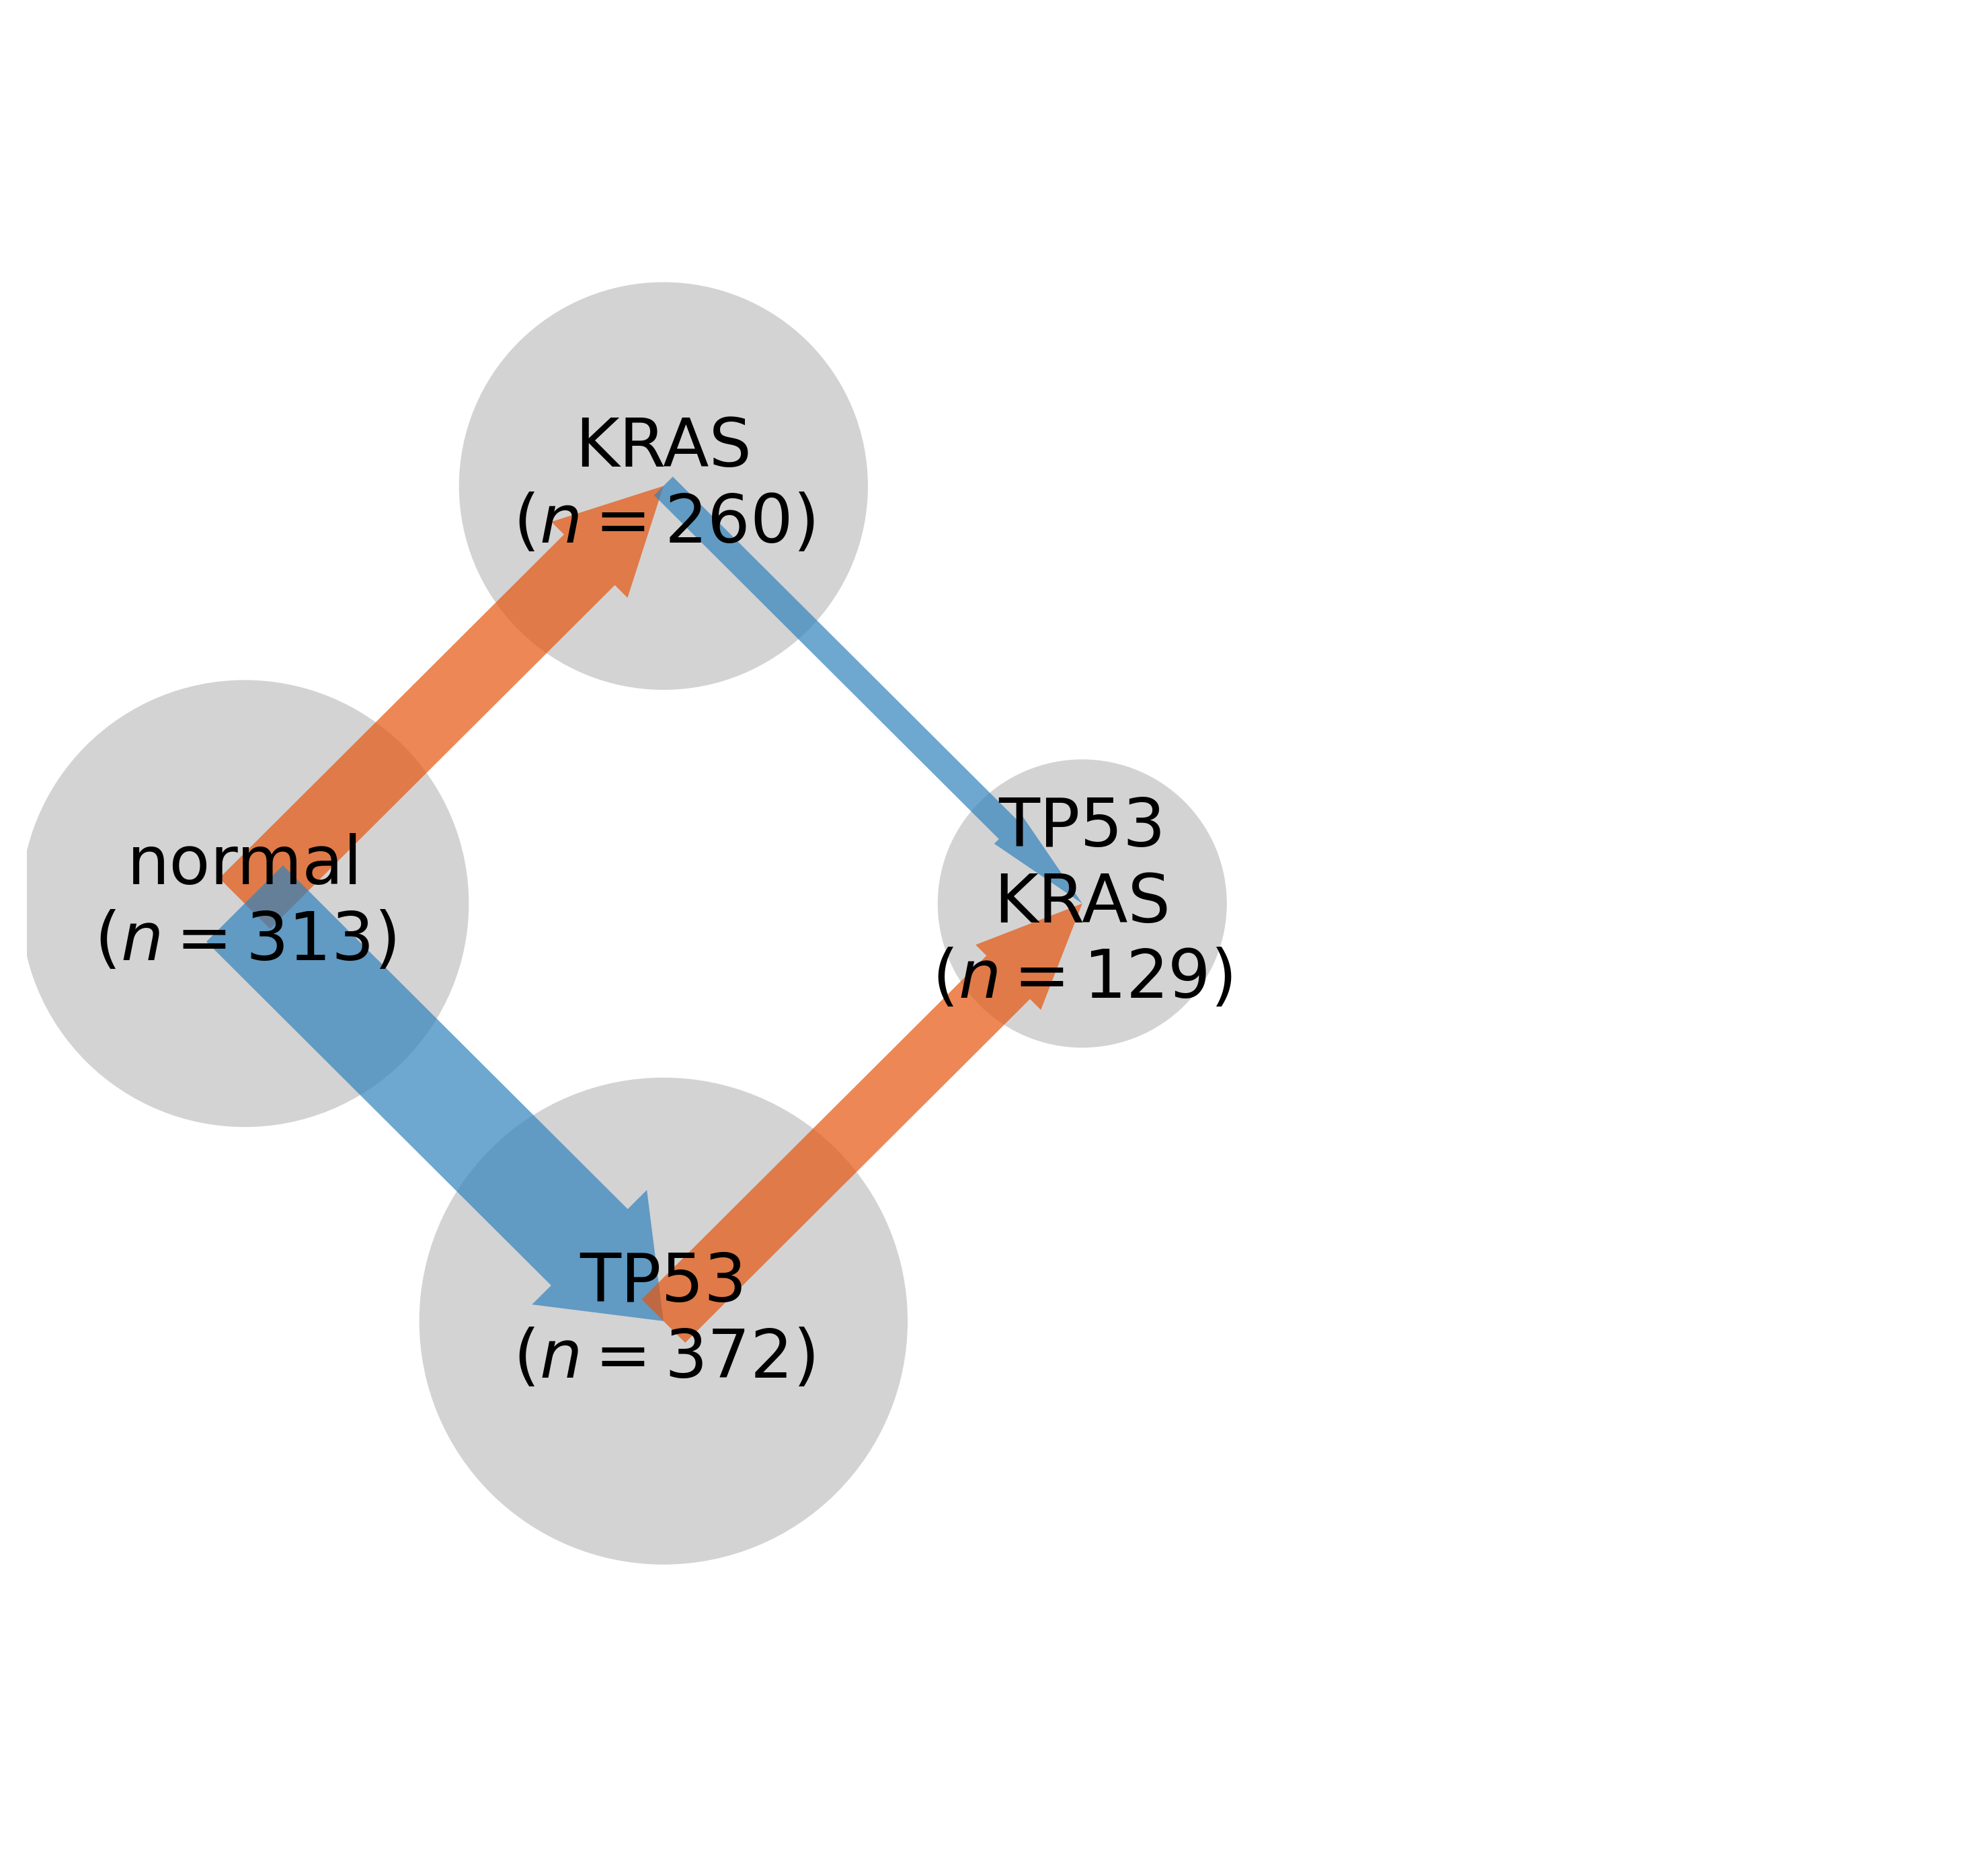

In [23]:
plot_trajectory(['TP53', 'KRAS'],'smoking_plus','selection', scale_circle_areas=0.03, multiplier_font_size=3)

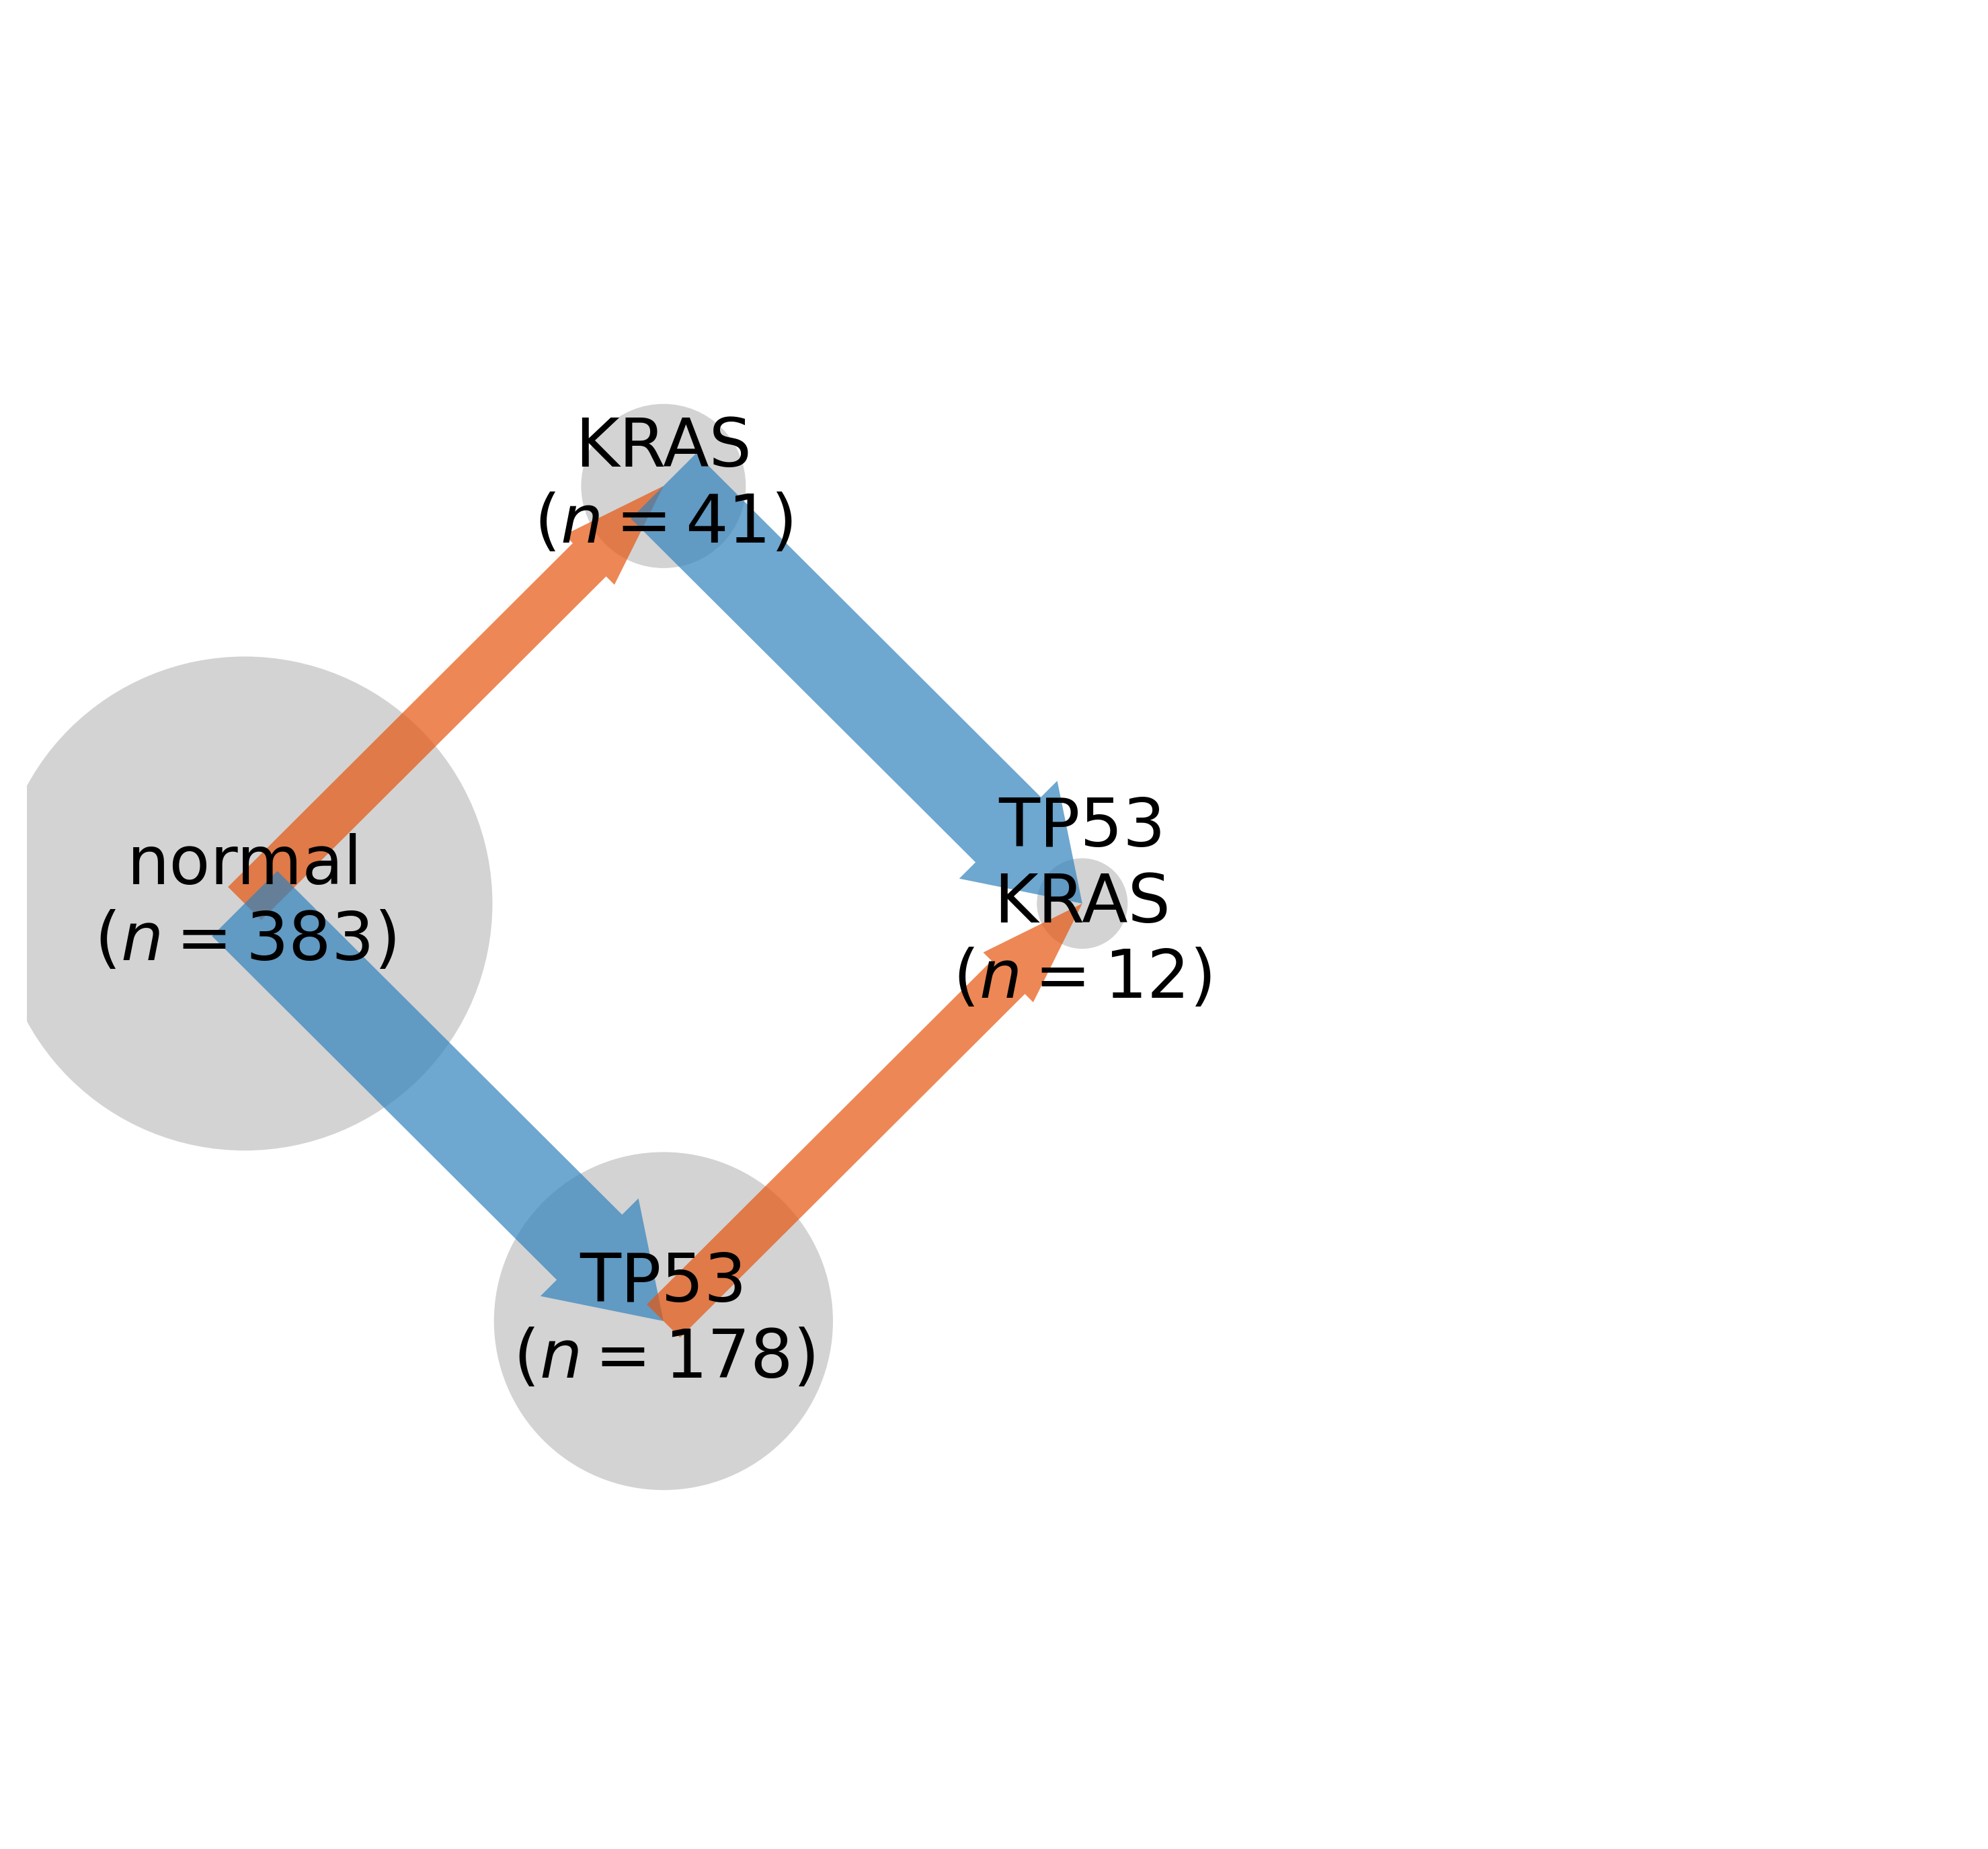

In [18]:
plot_trajectory(['TP53', 'KRAS'],'nonsmoking_plus','mutation', mu_method="variant", scale_circle_areas=0.03, multiplier_font_size=3, scale_arrows=10**(6))#,

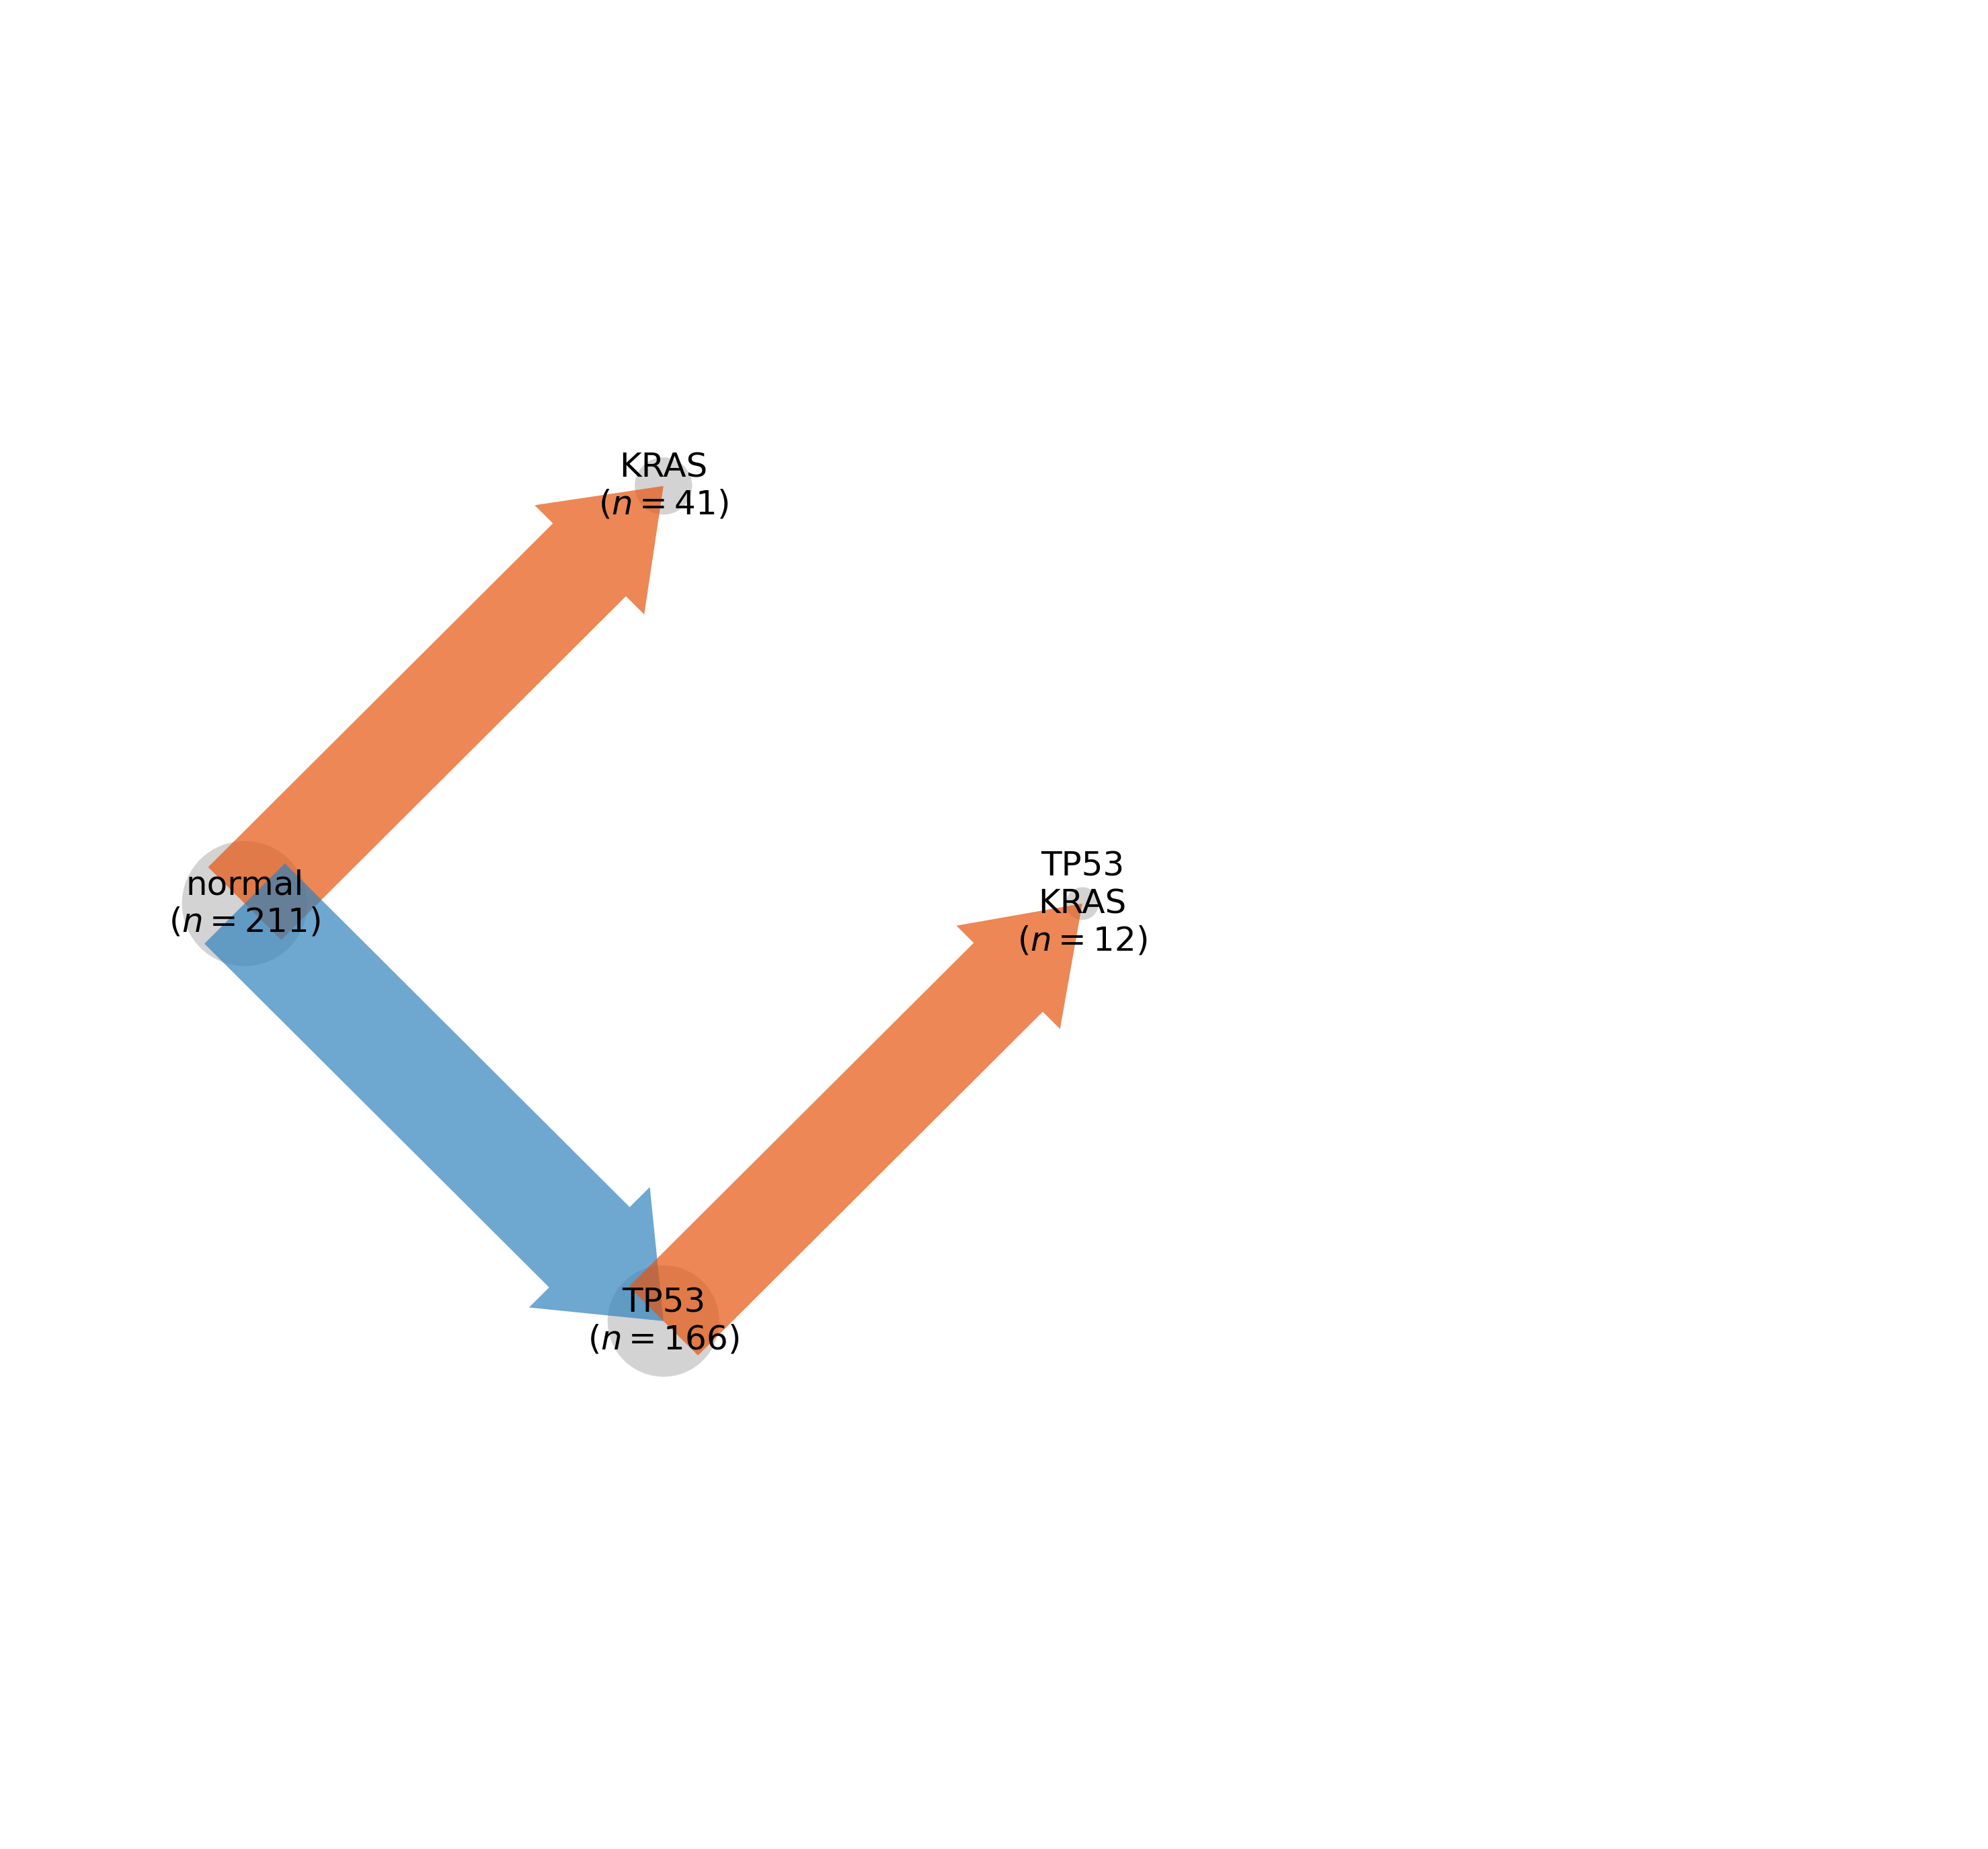

In [45]:
plot_trajectory(['TP53', 'KRAS'],'nonsmoking_plus','selection', scale_arrows=1*10**(-7))

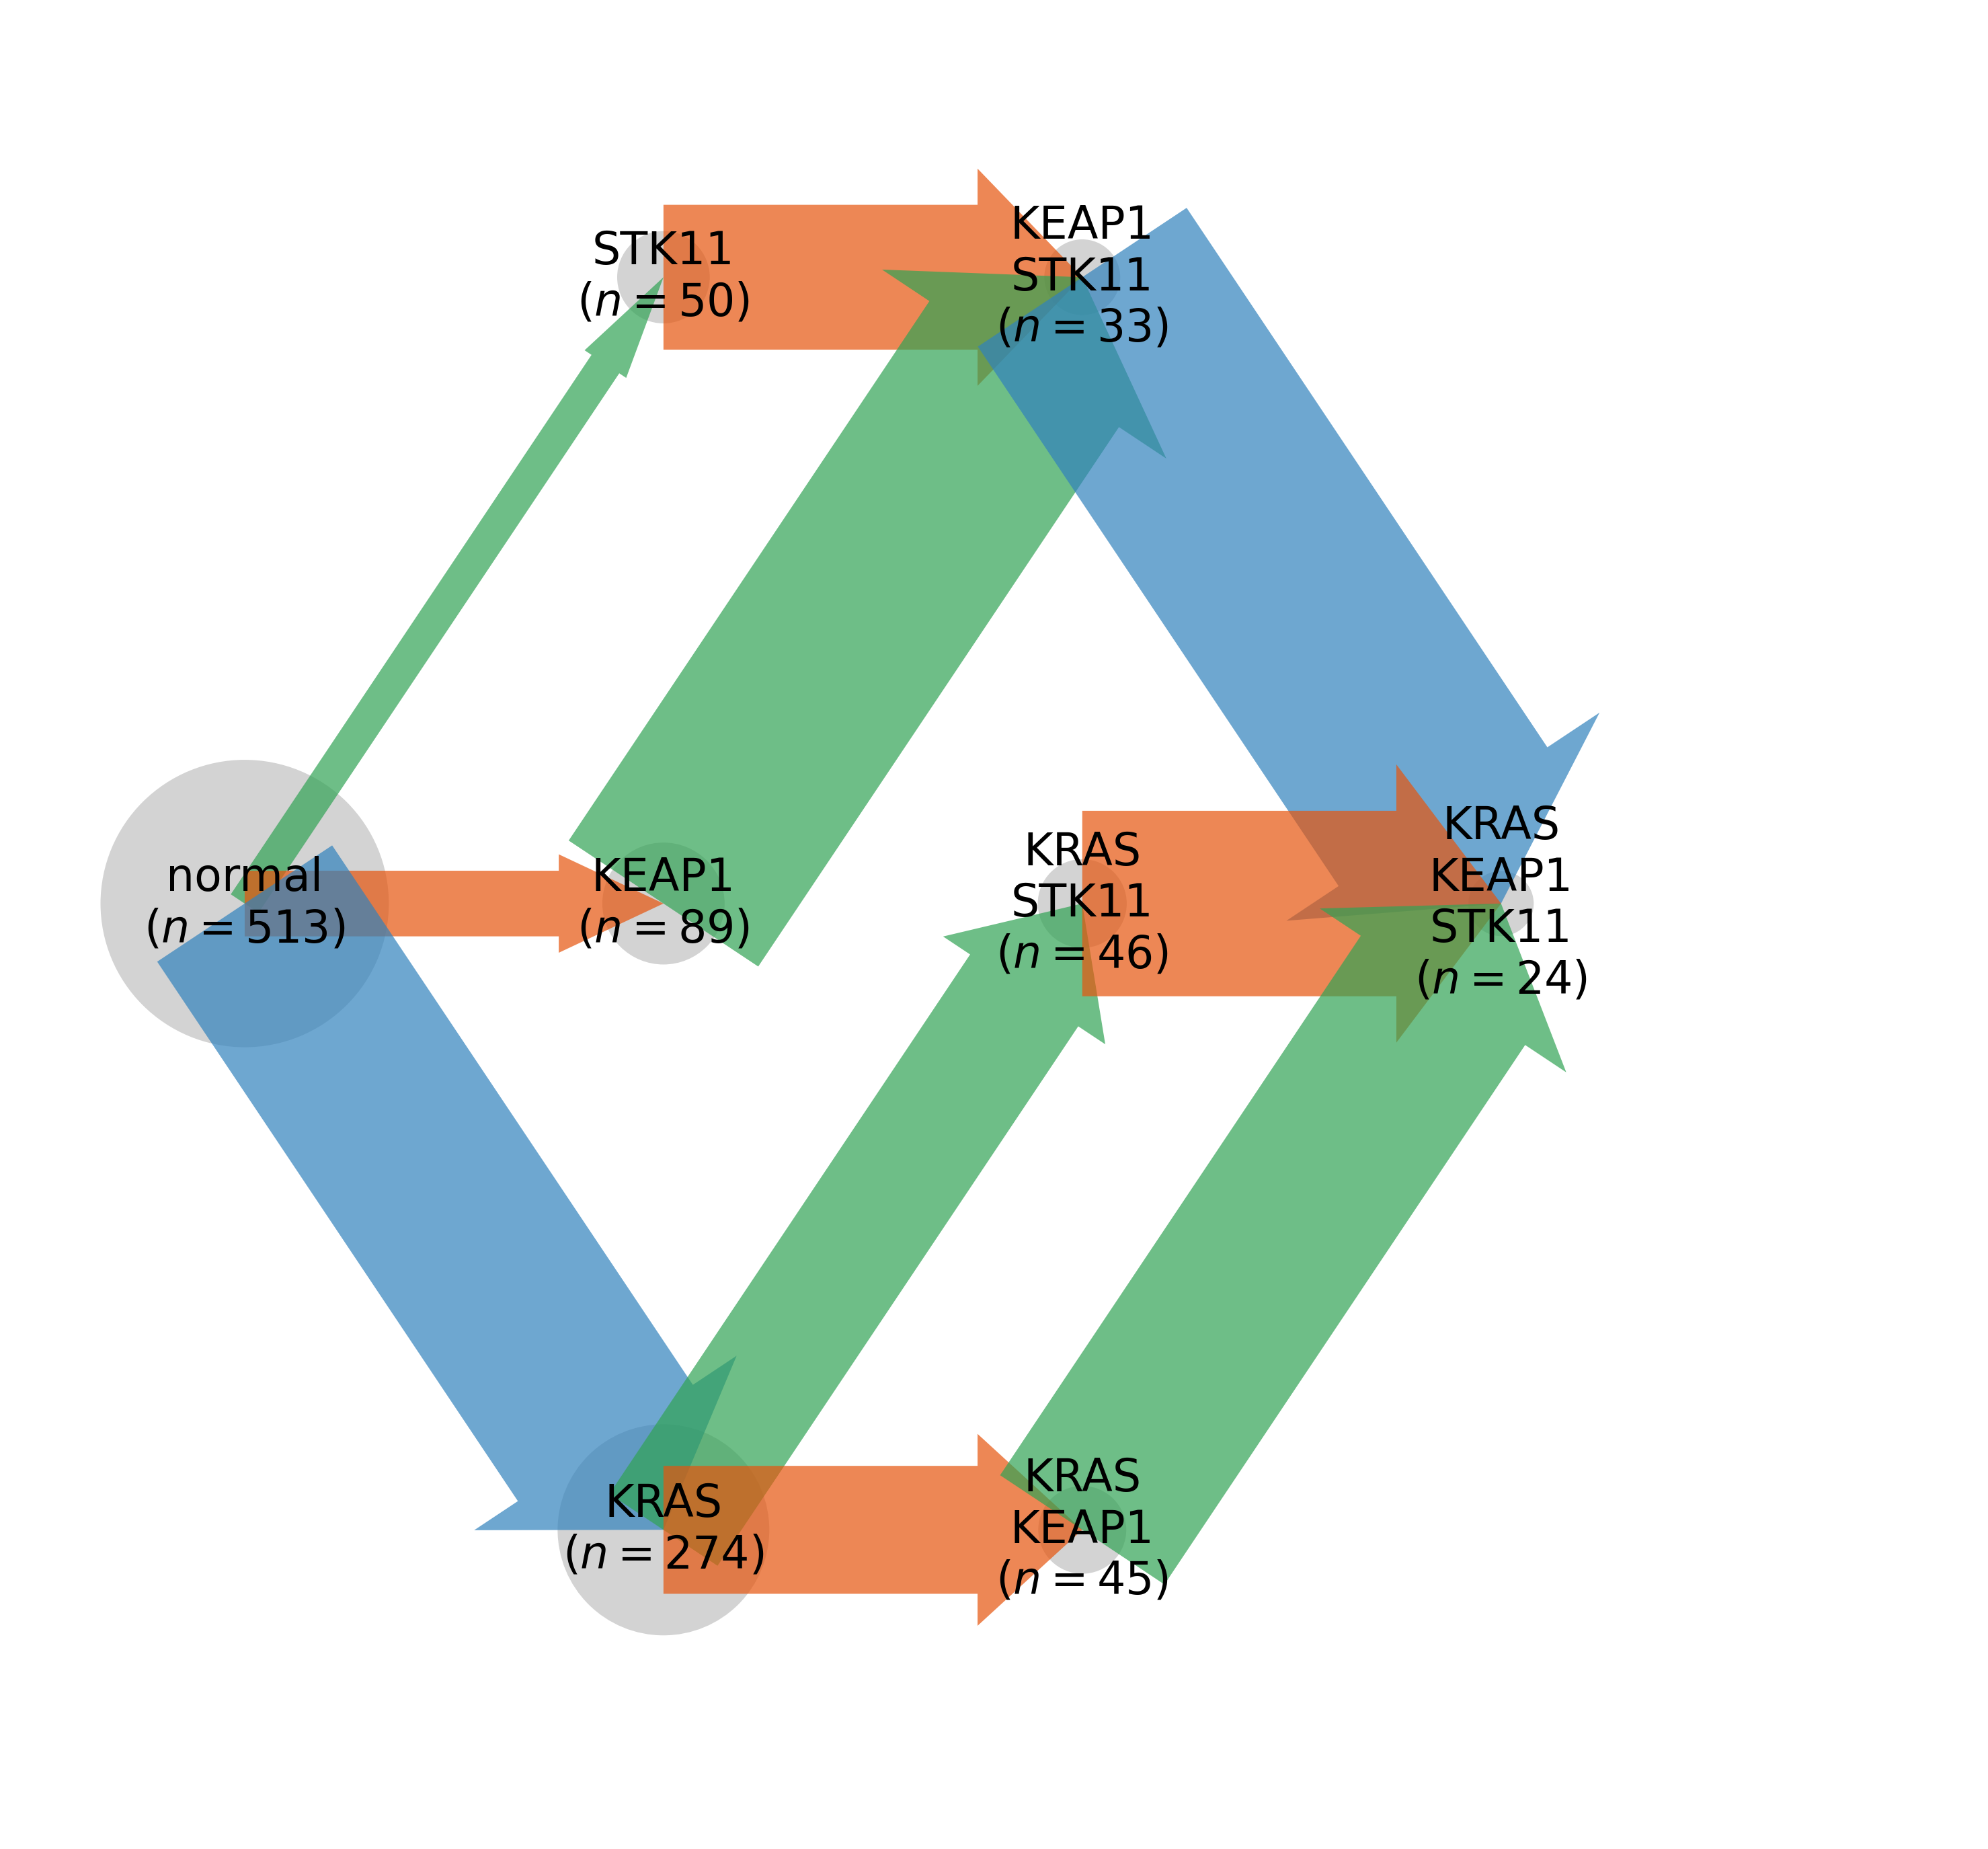

In [54]:
plot_trajectory(['KRAS','KEAP1','STK11'],'smoking_plus','fixation', scale_circle_areas=0.015, multiplier_font_size=2)#, mu_method="variant", scale_arrows=0.5*10**(6))#,)

In [46]:
selection_cis['smoking_plus'][('KRAS','KEAP1','STK11')]

{((0, 0, 0), (0, 0, 1)): [59498.22619099917, 102558.23223860472],
 ((0, 0, 0), (0, 1, 0)): [180143.70575485894, 263008.19182553235],
 ((0, 0, 1), (0, 1, 1)): [40682.878844675826, 1061691.4047915787],
 ((0, 1, 0), (0, 1, 1)): [332119.20992611063, 807442.6397403999],
 ((0, 0, 0), (1, 0, 0)): [1201872.2818853746, 1475494.0514682694],
 ((0, 0, 1), (1, 0, 1)): [4.971211497606794e-23, 1089886.8345608595],
 ((1, 0, 0), (1, 0, 1)): [228002.59900653517, 406330.8574072481],
 ((0, 1, 0), (1, 1, 0)): [3.4112140318186685e-26, 663370.6473470835],
 ((1, 0, 0), (1, 1, 0)): [314995.8123739336, 563865.3133016303],
 ((0, 1, 1), (1, 1, 1)): [134072.29357301944, 3747267.2919977396],
 ((1, 0, 1), (1, 1, 1)): [47374.64510946184, 1435276.2872888576],
 ((1, 1, 0), (1, 1, 1)): [51893.42979305432, 1064638.5971160592]}

In [47]:
selection_mles['smoking_plus'][('KRAS','KEAP1','STK11')]

{((0, 0, 0), (0, 0, 1)): 79114.49837165297,
 ((0, 0, 0), (0, 1, 0)): 219133.96789464942,
 ((0, 0, 1), (0, 1, 1)): 483621.8708895401,
 ((0, 1, 0), (0, 1, 1)): 540783.2283987687,
 ((0, 0, 0), (1, 0, 0)): 1333896.5229970252,
 ((0, 0, 1), (1, 0, 1)): 4.971211497606794e-23,
 ((1, 0, 0), (1, 0, 1)): 308478.4894292787,
 ((0, 1, 0), (1, 1, 0)): 3.4112140318186685e-26,
 ((1, 0, 0), (1, 1, 0)): 427201.2490024185,
 ((0, 1, 1), (1, 1, 1)): 1591371.1683236088,
 ((1, 0, 1), (1, 1, 1)): 619355.309247015,
 ((1, 1, 0), (1, 1, 1)): 468848.32523633534}

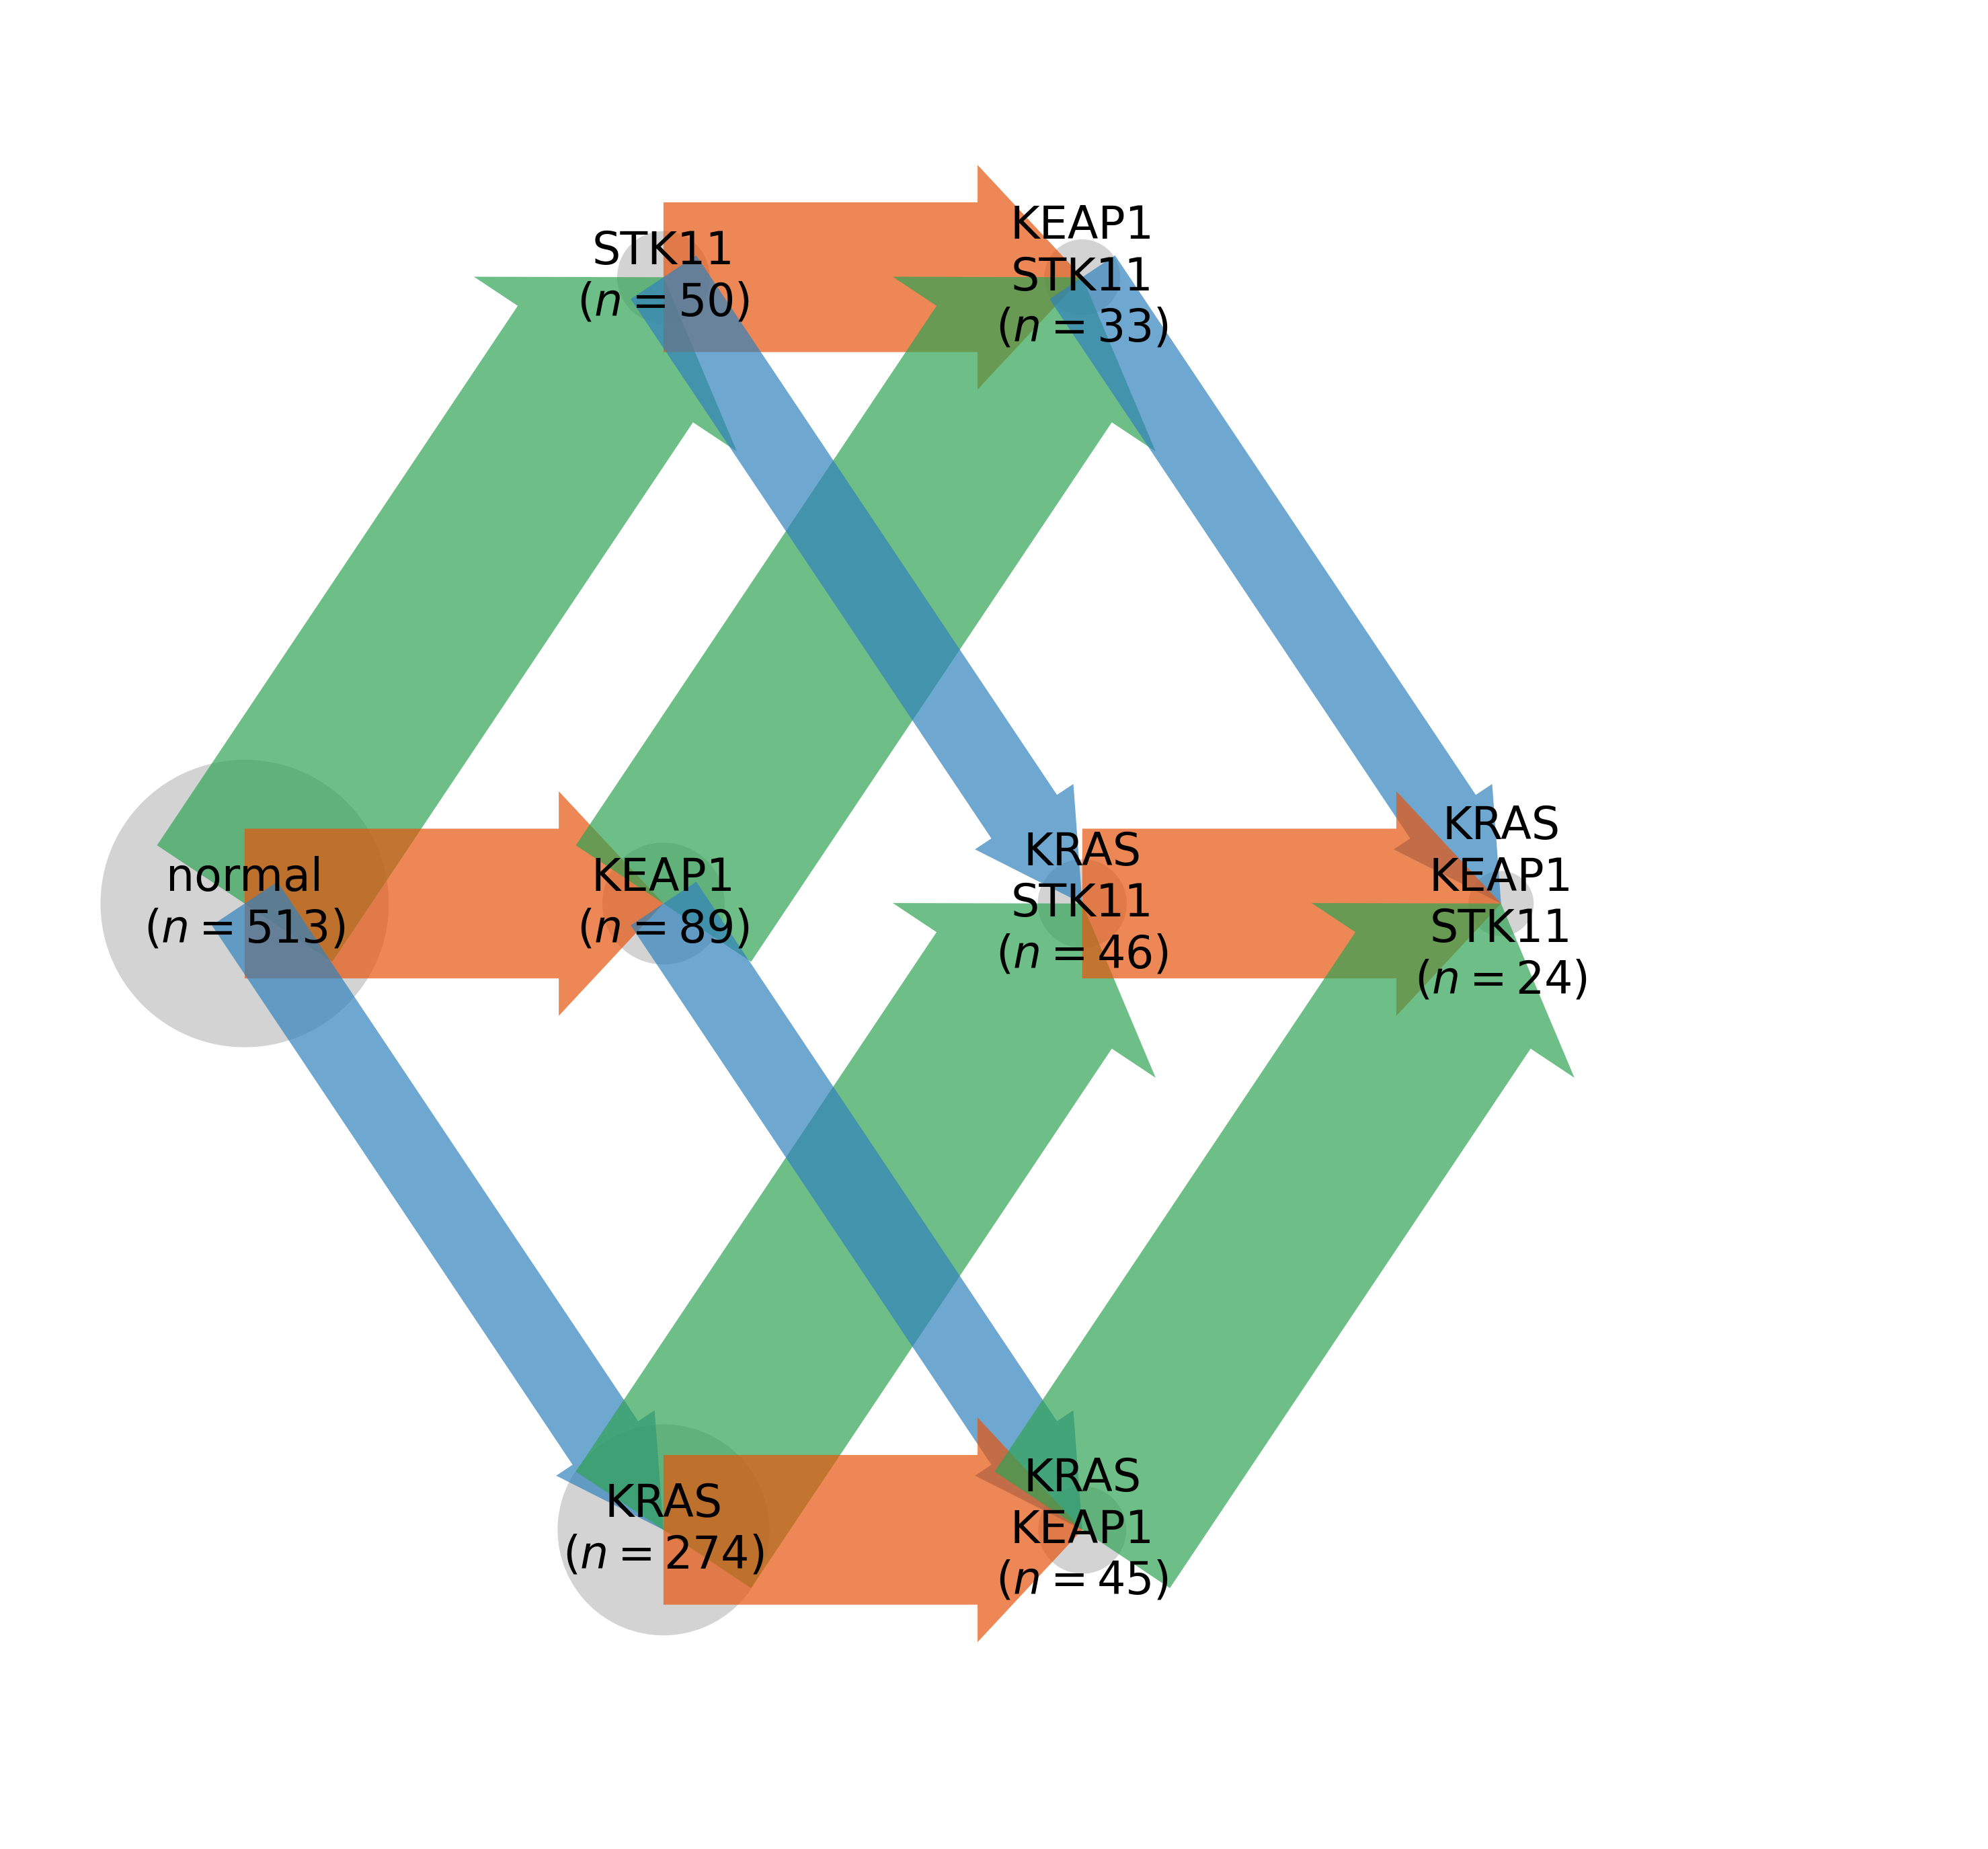

In [55]:
plot_trajectory(['KRAS','KEAP1','STK11'],'smoking_plus','mutation', mu_method="variant", scale_circle_areas=0.015, multiplier_font_size=2, scale_arrows=0.5*10**(6))

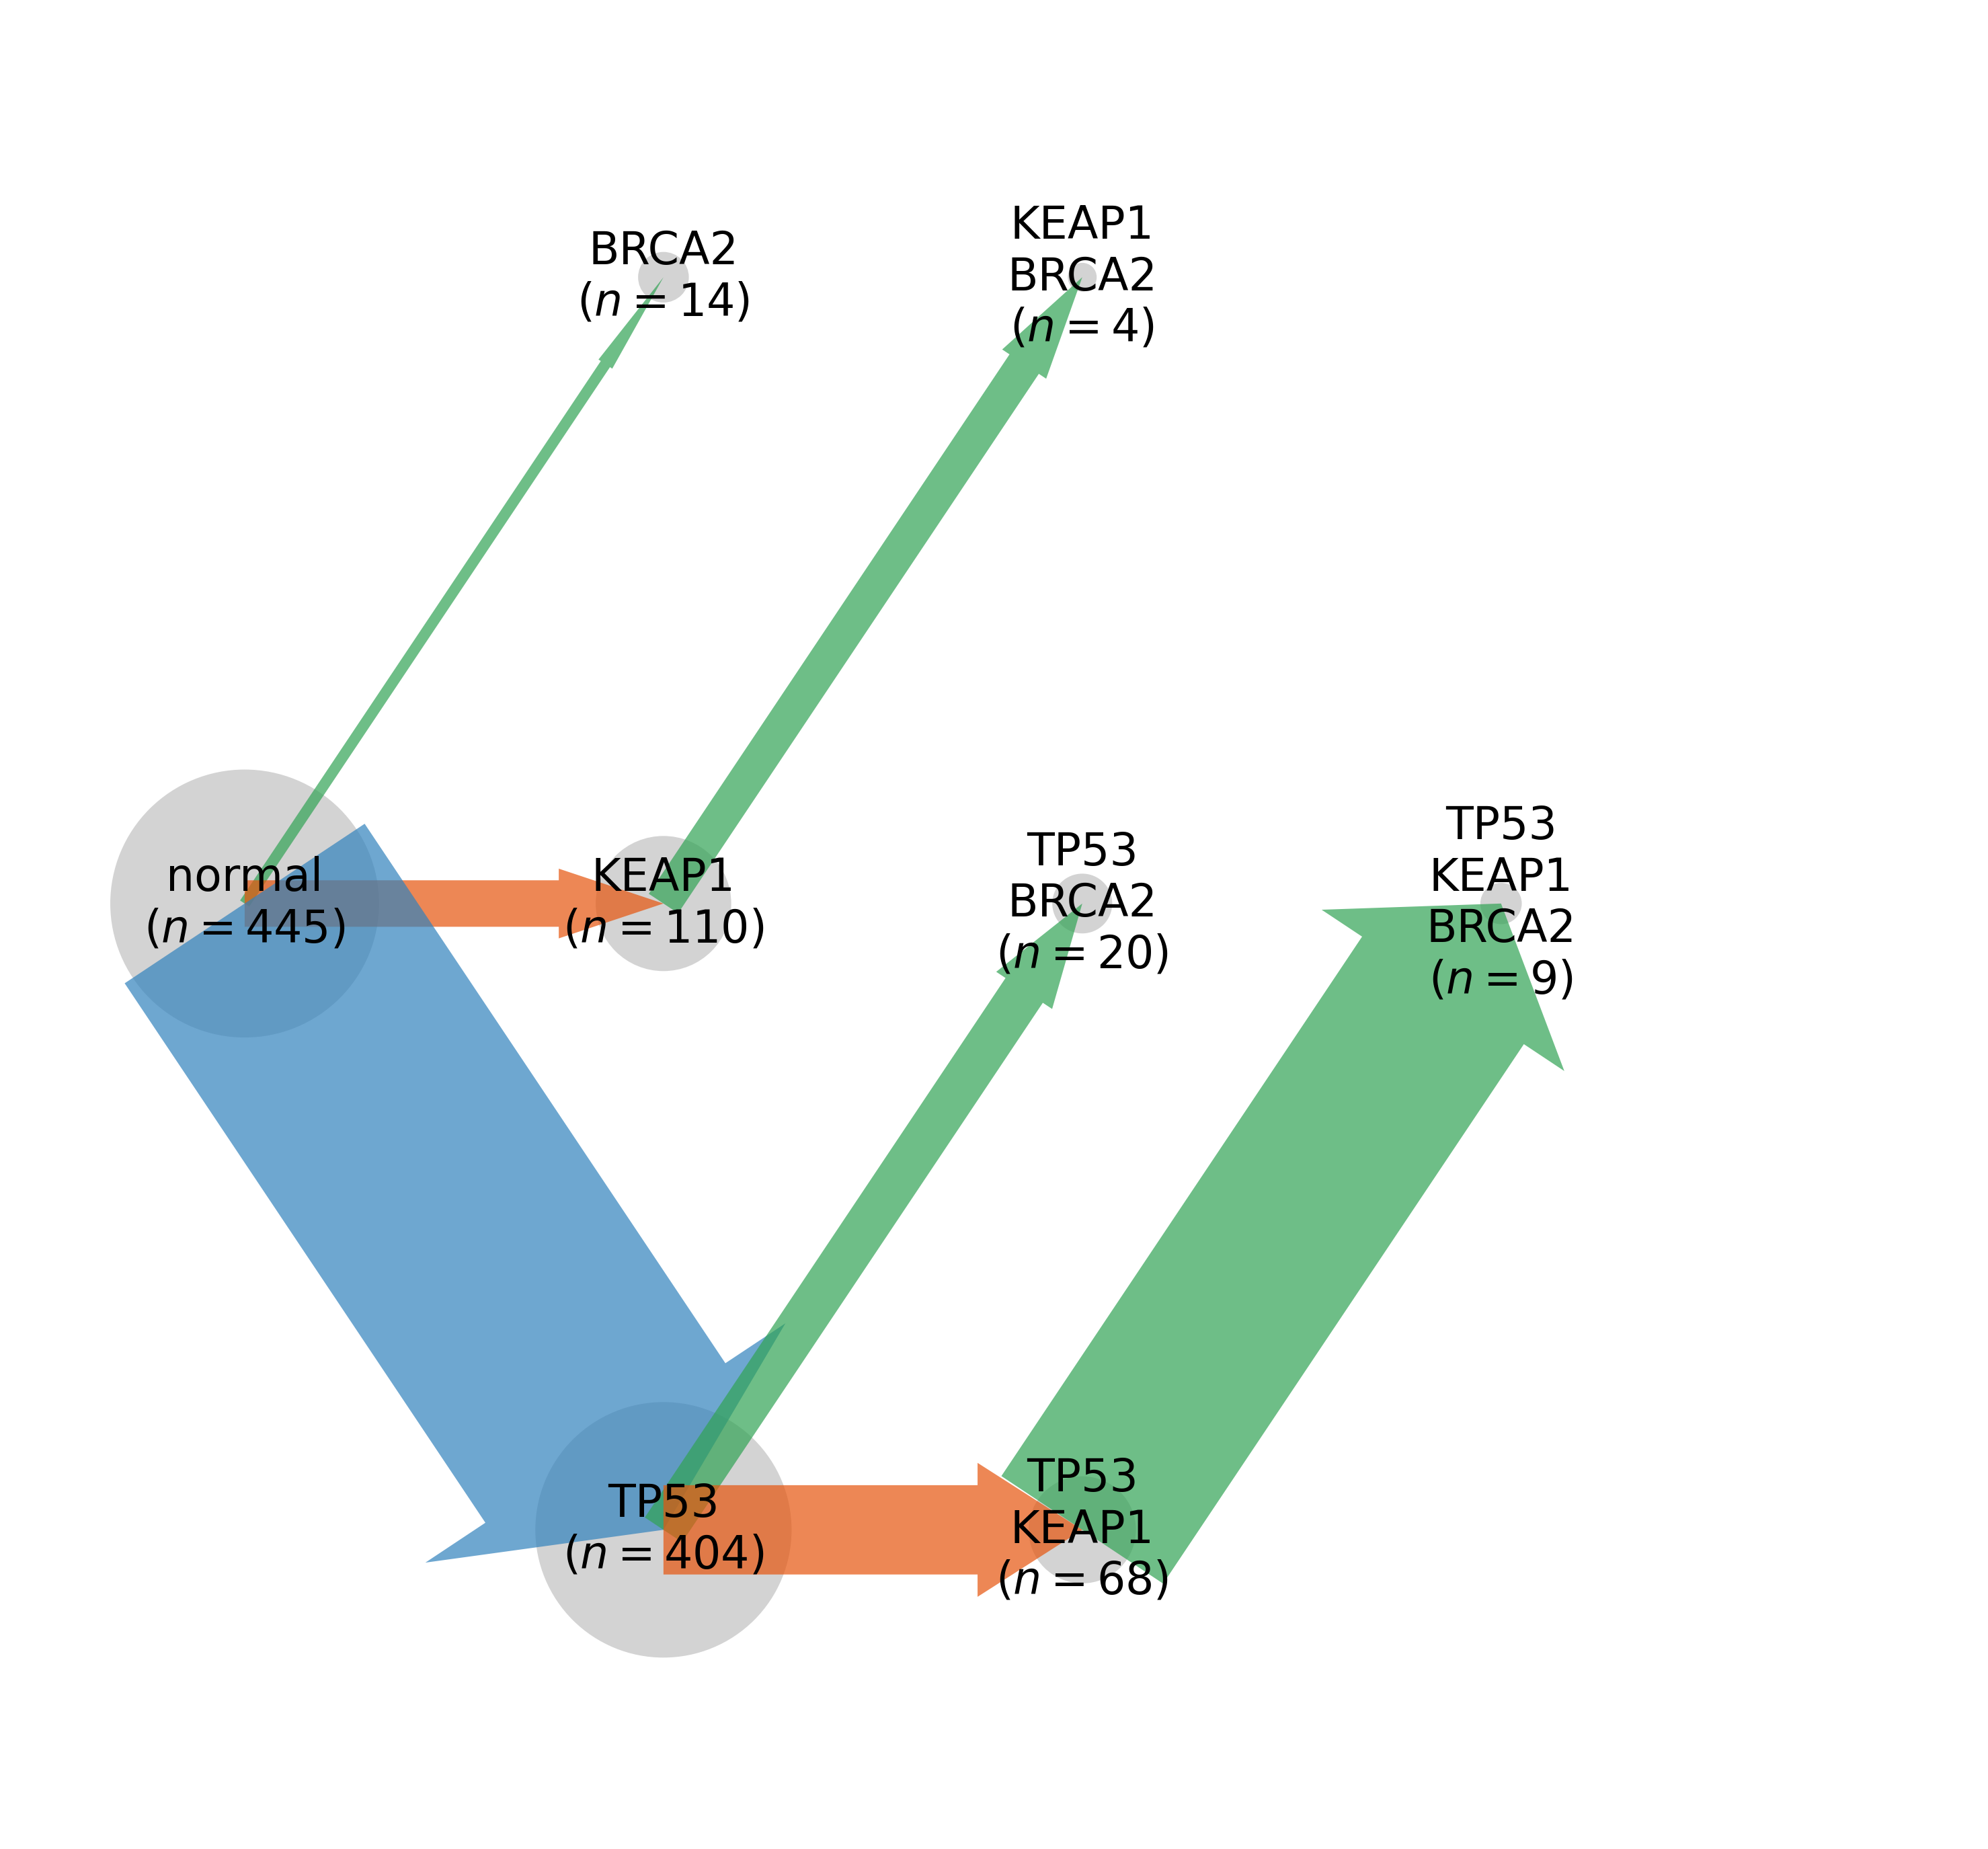

In [57]:
plot_trajectory(['TP53','KEAP1','BRCA2'],'smoking_plus','selection', scale_circle_areas=0.015, multiplier_font_size=2)#, mu_method="variant", scale_arrows=0.5*10**(6))#,)

In [49]:
selection_mles['smoking_plus'][('TP53','KEAP1','BRCA2')]

{((0, 0, 0), (0, 0, 1)): 52644.40776108071,
 ((0, 0, 0), (0, 1, 0)): 222658.43604760713,
 ((0, 0, 1), (0, 1, 1)): 1.8941202518798577e-24,
 ((0, 1, 0), (0, 1, 1)): 168250.90692027746,
 ((0, 0, 0), (1, 0, 0)): 1377477.1711258553,
 ((0, 0, 1), (1, 0, 1)): 4.83256438131501e-36,
 ((1, 0, 0), (1, 0, 1)): 213937.4096954753,
 ((0, 1, 0), (1, 1, 0)): 4.089172717427881e-26,
 ((1, 0, 0), (1, 1, 0)): 427735.21987364604,
 ((0, 1, 1), (1, 1, 1)): 1.0519258446675761e-23,
 ((1, 0, 1), (1, 1, 1)): 7.891243020317319e-22,
 ((1, 1, 0), (1, 1, 1)): 928476.912526242}

In [50]:
selection_cis['smoking_plus'][('TP53','KEAP1','BRCA2')]

{((0, 0, 0), (0, 0, 1)): [29650.710933958522, 85270.96534498536],
 ((0, 0, 0), (0, 1, 0)): [184075.61758224215, 266353.5990356876],
 ((0, 0, 1), (0, 1, 1)): [1.8941202518798577e-24, 851851.8156588193],
 ((0, 1, 0), (0, 1, 1)): [52073.29333430457, 393221.381564428],
 ((0, 0, 0), (1, 0, 0)): [1257719.3389612453, 1504973.7927021128],
 ((0, 0, 1), (1, 0, 1)): [4.83256438131501e-36, 1720251.8376915788],
 ((1, 0, 0), (1, 0, 1)): [133033.262131753, 322873.91321461106],
 ((0, 1, 0), (1, 1, 0)): [4.089172717427881e-26, 447619.5886383885],
 ((1, 0, 0), (1, 1, 0)): [337471.85457229824, 533675.8140274789],
 ((0, 1, 1), (1, 1, 1)): [1.0519258446675761e-23, 7902350.849114185],
 ((1, 0, 1), (1, 1, 1)): [7.891243020317319e-22, 1222017.4622584595],
 ((1, 1, 0), (1, 1, 1)): [438940.84383803036, 1715826.6203679754]}

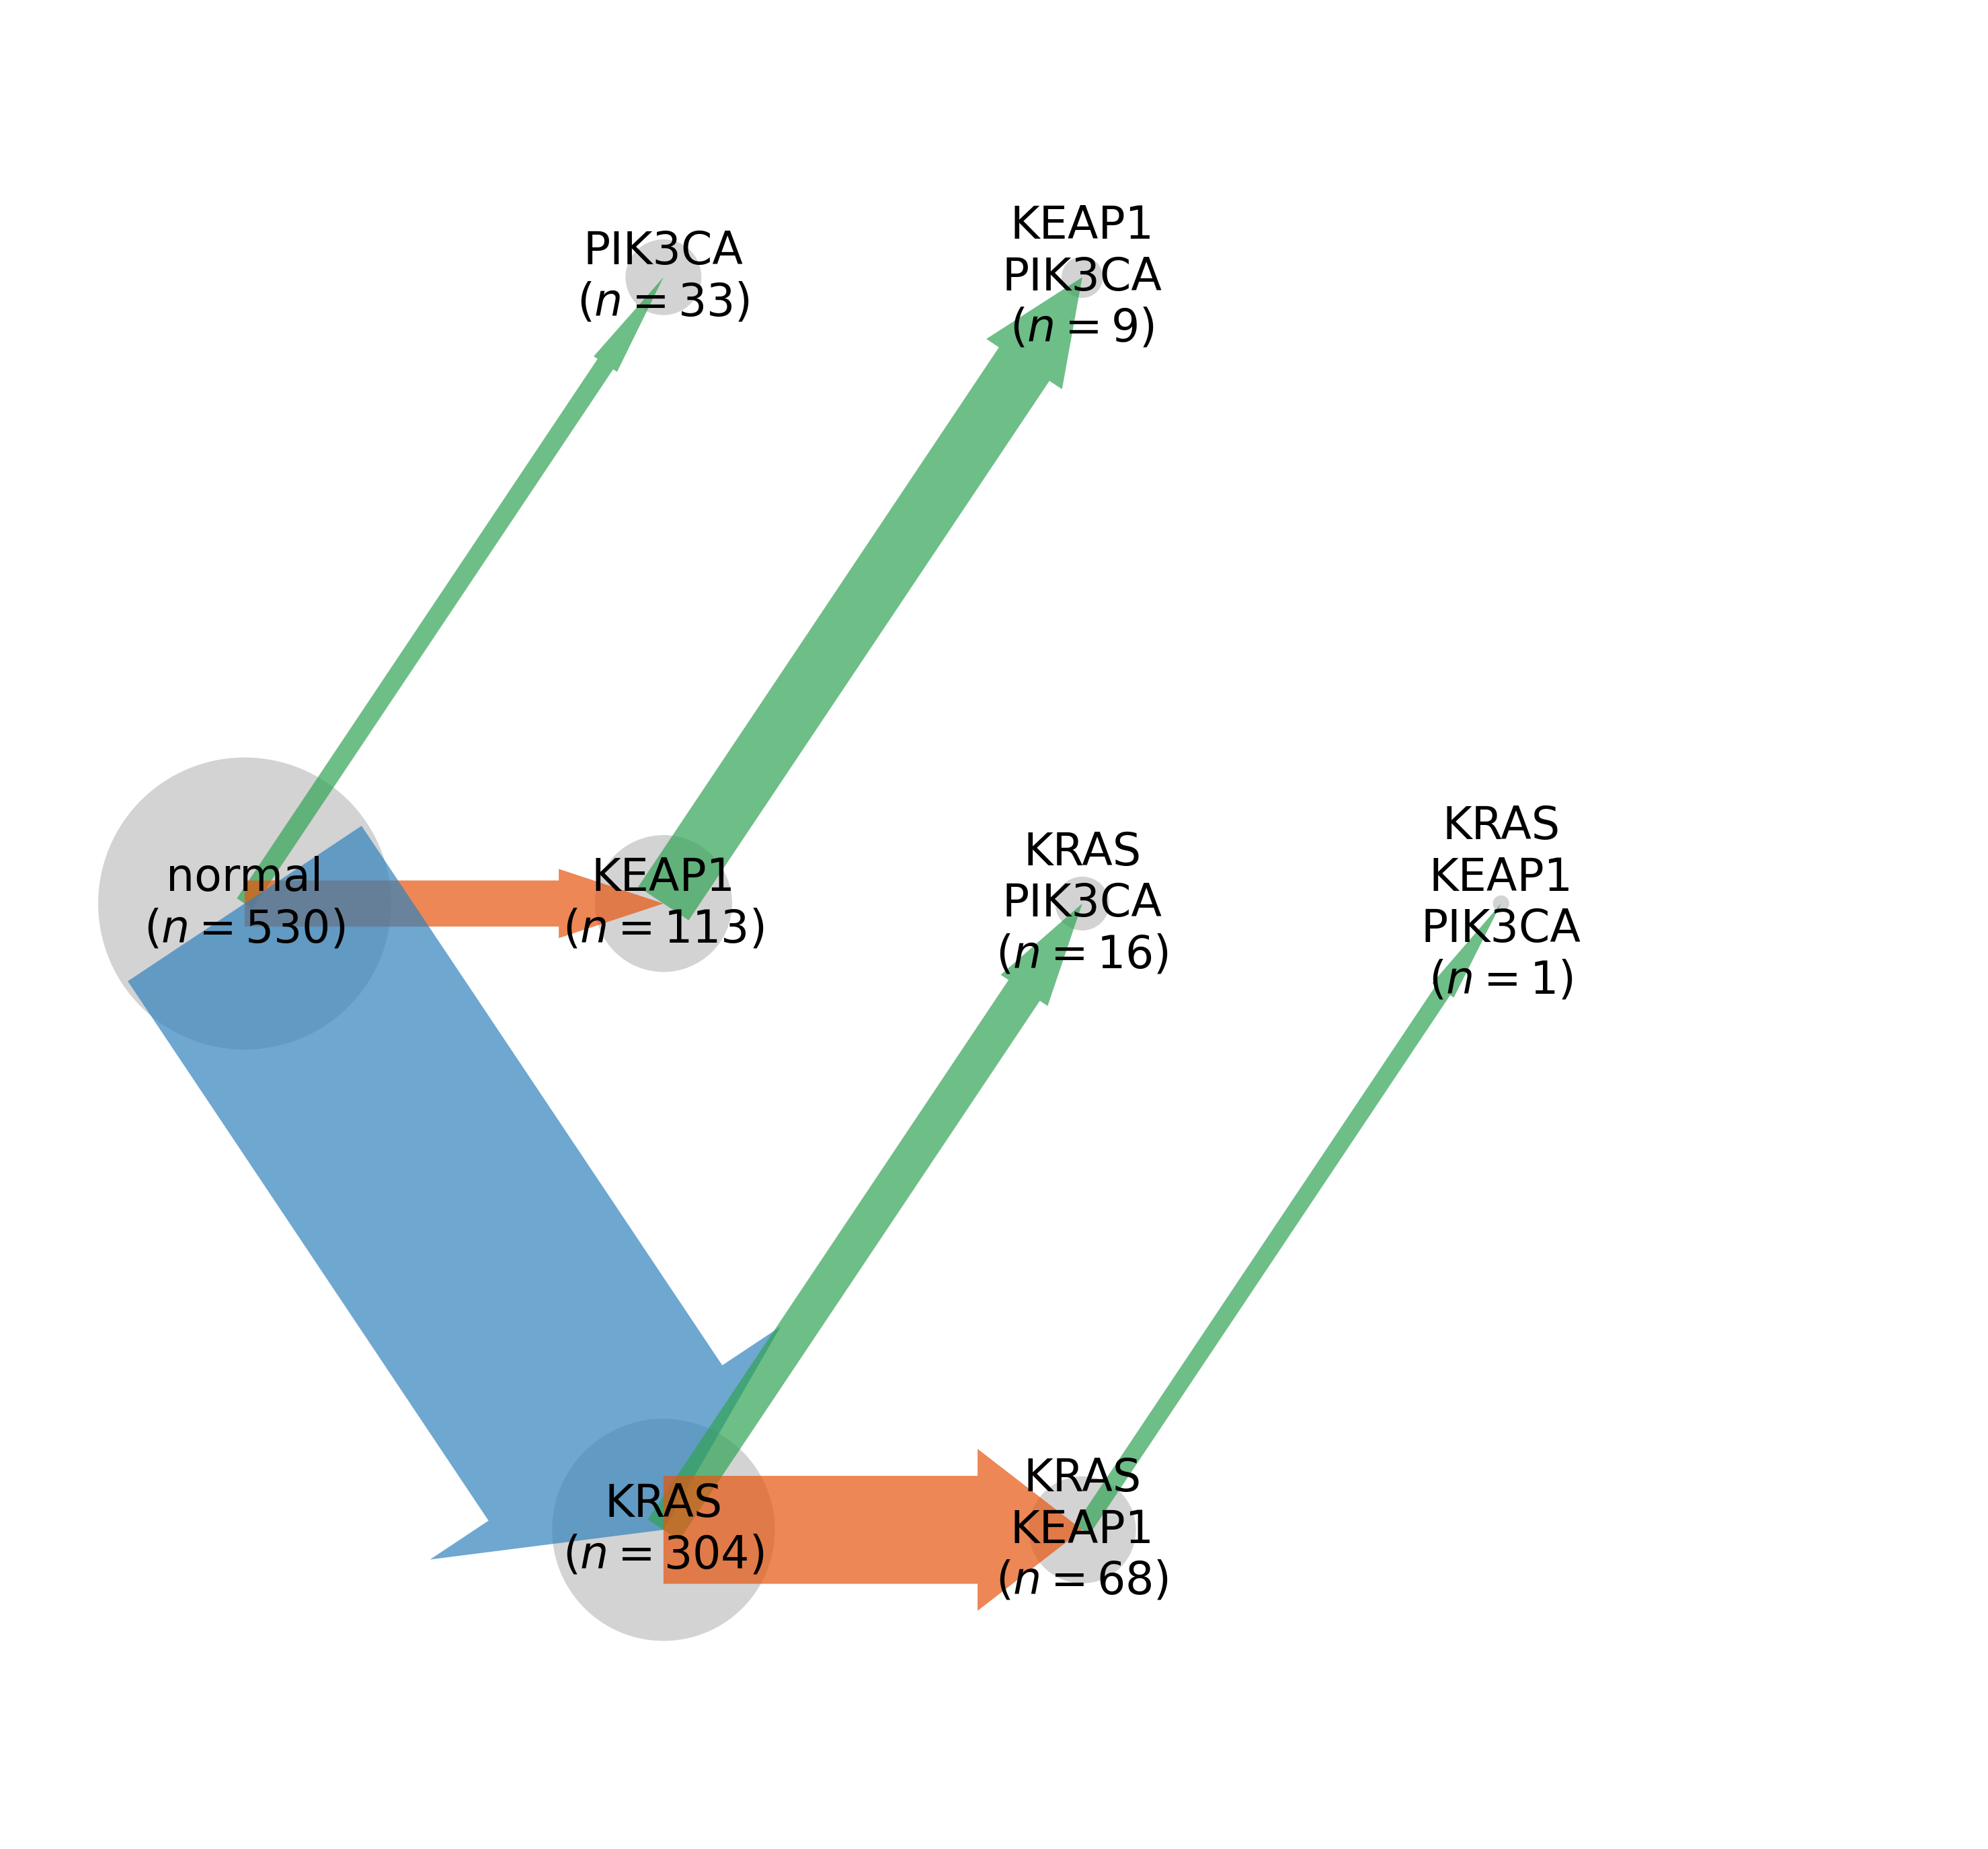

In [56]:
plot_trajectory(['KRAS','KEAP1','PIK3CA'],'smoking_plus','selection', scale_circle_areas=0.015, multiplier_font_size=2)#, mu_method="variant", scale_arrows=0.5*10**(6))#,)

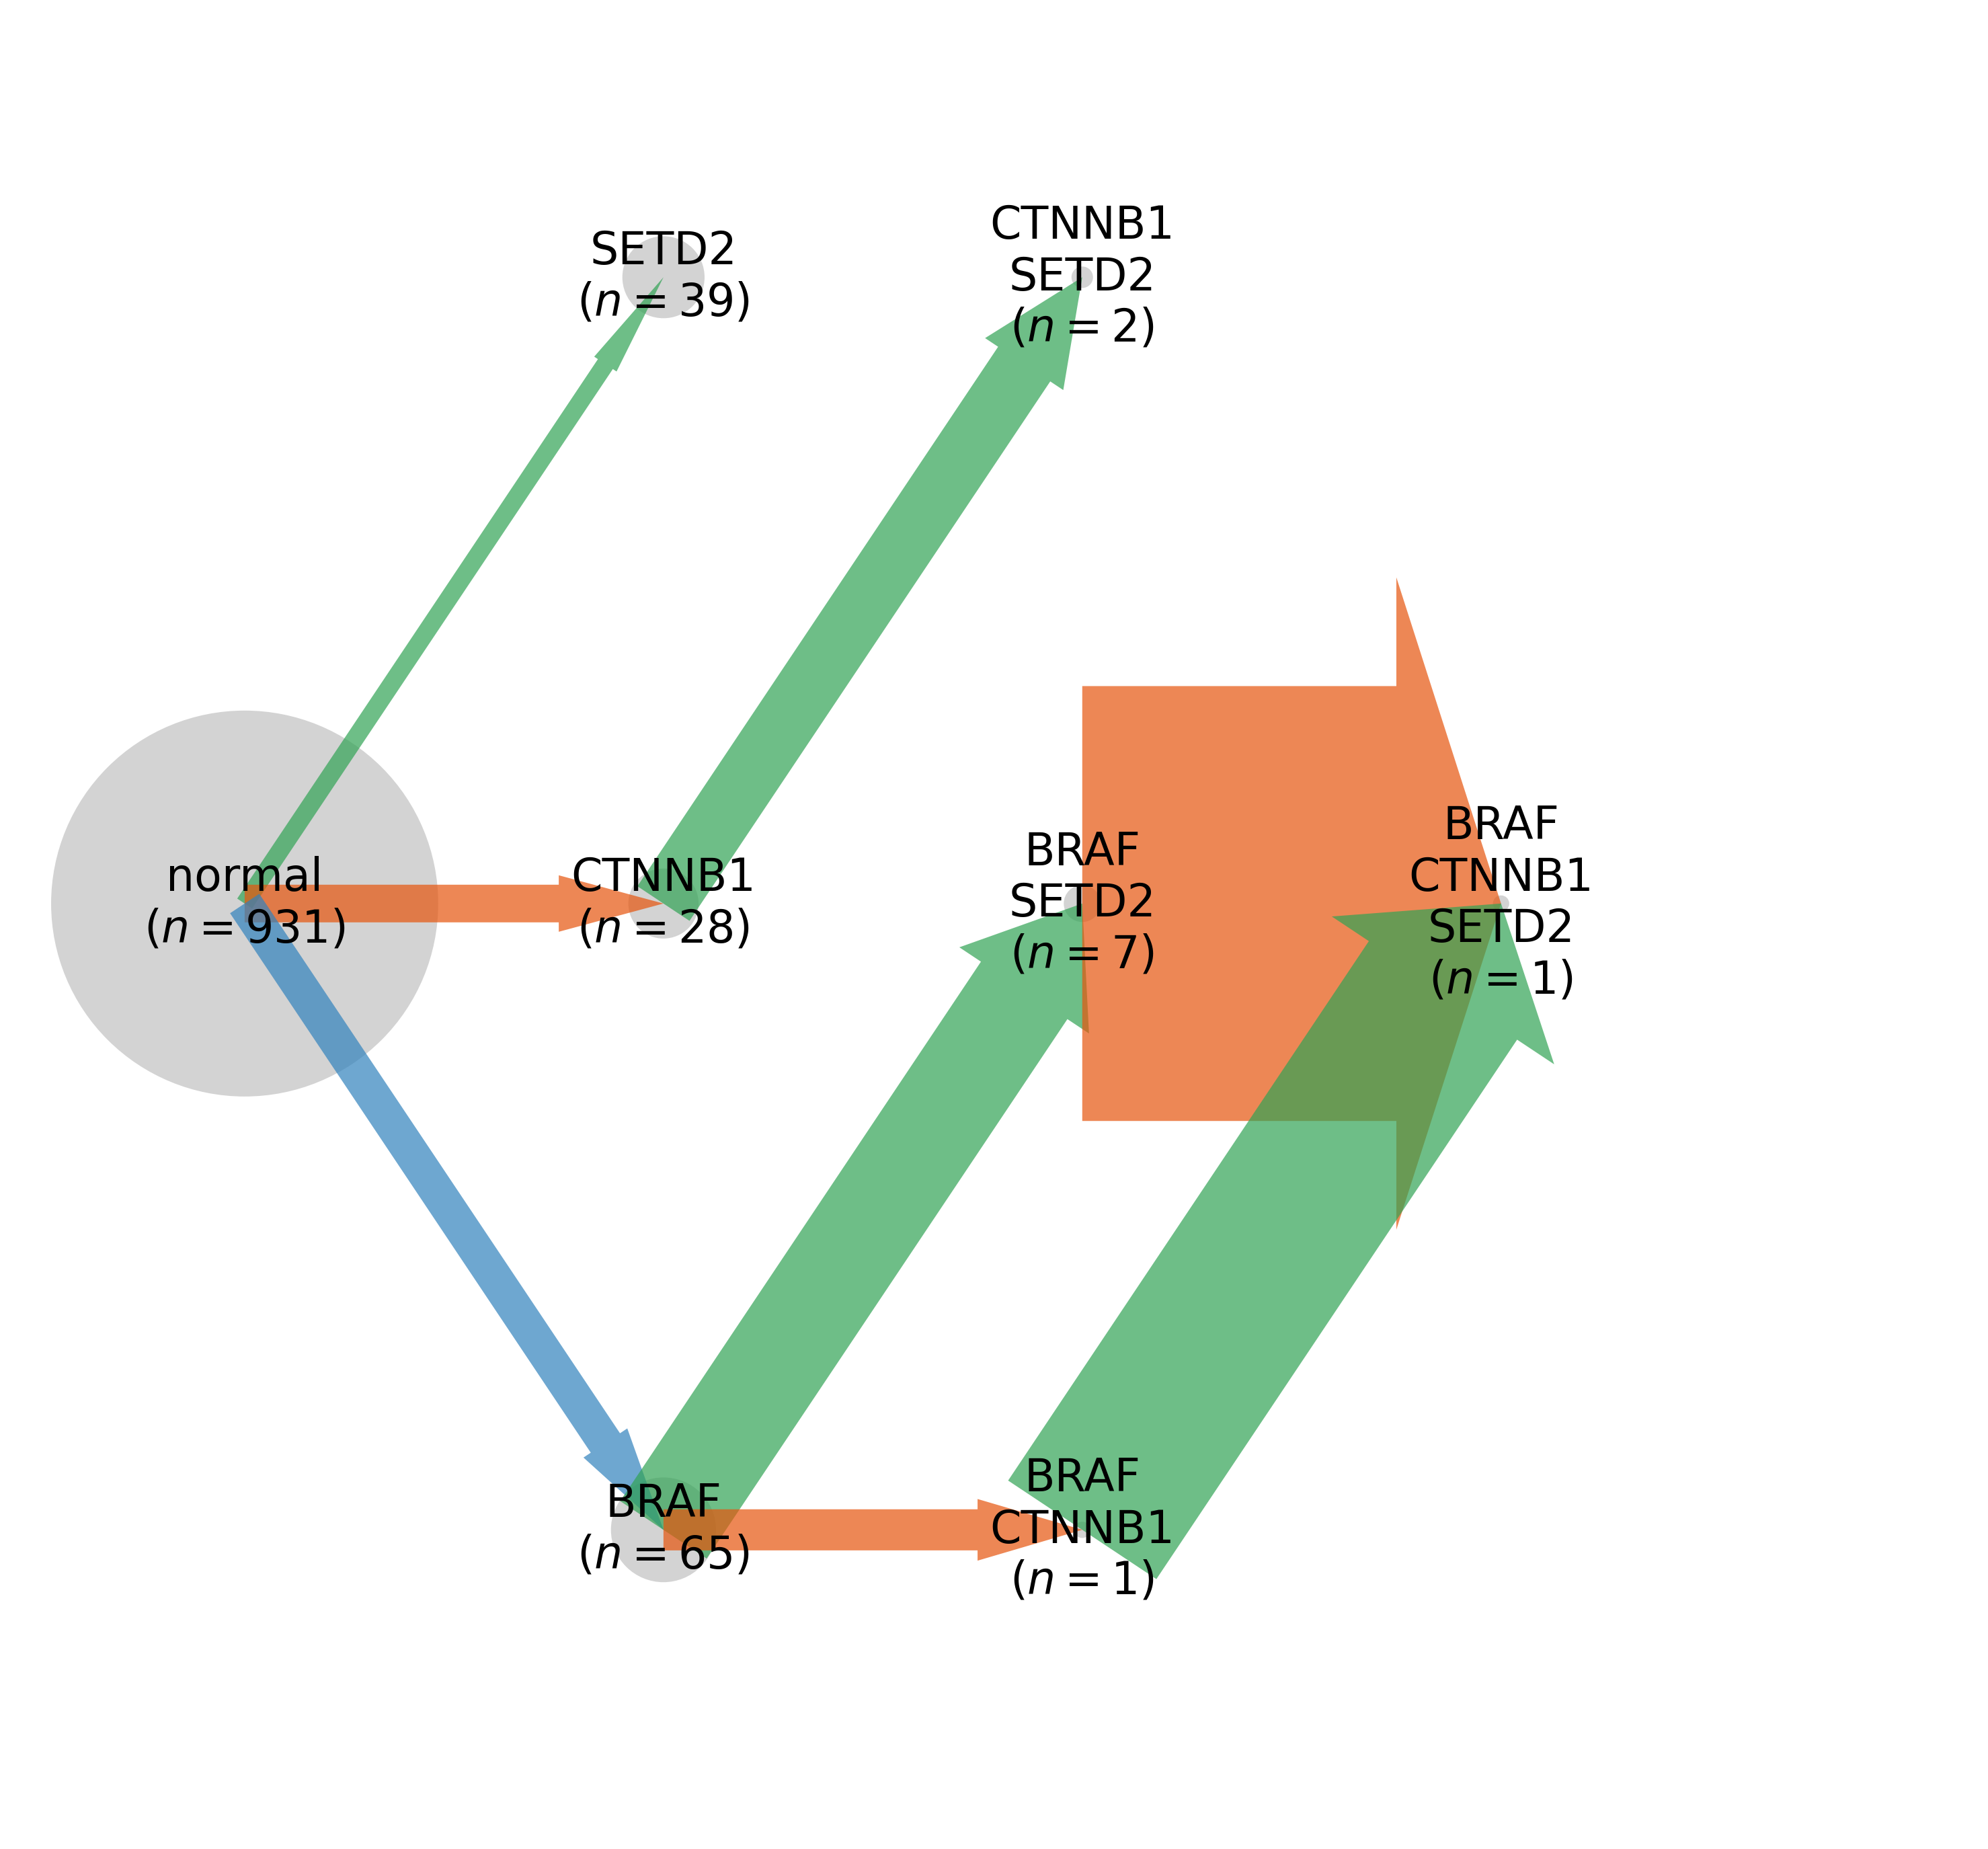

In [58]:
plot_trajectory(['BRAF','CTNNB1','SETD2'],'smoking_plus','selection', scale_circle_areas=0.015, multiplier_font_size=2)#, mu_method="variant", scale_arrows=0.5*10**(6))#,)

## For higher order interaction plot

### Fitness Rescue
#### CTNNB1 ['BRAF', 'CTNNB1', 'KEAP1']

### Super-synergism

#### RB1 ['TP53', 'PIK3CA', 'RB1']

#### APC ['TP53', 'ATM', 'APC']

### Less benefit than expected

#### CTNNB1 ['TP53', 'EGFR', 'CTNNB1']

#### KEAP1 ['KRAS', 'CTNNB1', 'KEAP1']

# Pathways

In [21]:
hm_df = pd.read_csv("../../data/gene_sets/hallmark_pathway_df.csv")

#HALLMARK_TNFA_SIGNALING_VIA_NFKB = list(hm_df[hm_df["pathway"]=="HALLMARK_TNFA_SIGNALING_VIA_NFKB"]["genes"])[0].split("|")
HALLMARK_HYPOXIA = list(hm_df[hm_df["pathway"]=="HALLMARK_HYPOXIA"]["genes"])[0].split("|")
HALLMARK_WNT_BETA_CATENIN_SIGNALING = list(hm_df[hm_df["pathway"]=="HALLMARK_WNT_BETA_CATENIN_SIGNALING"]["genes"])[0].split("|")
HALLMARK_DNA_REPAIR = list(hm_df[hm_df["pathway"]=="HALLMARK_DNA_REPAIR"]["genes"])[0].split("|")
HALLMARK_G2M_CHECKPOINT = list(hm_df[hm_df["pathway"]=="HALLMARK_G2M_CHECKPOINT"]["genes"])[0].split("|")

HALLMARK_PI3K_AKT_MTOR_SIGNALING = list(hm_df[hm_df["pathway"]=="HALLMARK_PI3K_AKT_MTOR_SIGNALING"]["genes"])[0].split("|")
HALLMARK_MYC_TARGETS_V2 = list(hm_df[hm_df["pathway"]=="HALLMARK_MYC_TARGETS_V2"]["genes"])[0].split("|")
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION = list(hm_df[hm_df["pathway"]=="HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION"]["genes"])[0].split("|")
HALLMARK_INFLAMMATORY_RESPONSE = list(hm_df[hm_df["pathway"]=="HALLMARK_INFLAMMATORY_RESPONSE"]["genes"])[0].split("|")
HALLMARK_METABOLISM = list(hm_df[hm_df["pathway"]=="HALLMARK_OXIDATIVE_PHOSPHORYLATION"]["genes"])[0].split("|") + list(hm_df[hm_df["pathway"]=="HALLMARK_GLYCOLYSIS"]["genes"])[0].split("|")

HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY = list(hm_df[hm_df["pathway"]=="HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY"]["genes"])[0].split("|")
HALLMARK_P53_PATHWAY = list(hm_df[hm_df["pathway"]=="HALLMARK_P53_PATHWAY"]["genes"])[0].split("|")
HALLMARK_ANGIOGENESIS = list(hm_df[hm_df["pathway"]=="HALLMARK_ANGIOGENESIS"]["genes"])[0].split("|")
HALLMARK_KRAS = list(hm_df[hm_df["pathway"]=="HALLMARK_KRAS_SIGNALING_UP"]["genes"])[0].split("|") + list(hm_df[hm_df["pathway"]=="HALLMARK_KRAS_SIGNALING_DN"]["genes"])[0].split("|")